In [2]:
# Importing Important Libraries

# Data Analysis ans Visualization tools
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set()
from tqdm import tqdm
import missingno as msno
from collections import Counter
import random as rn
from functools import reduce 

# Statistical Libraries
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import chi2


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Scikit Learn Framework
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score, make_scorer,precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from prettytable import PrettyTable



# Import and suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [3]:
# Using Pandas

data = pd.read_csv("aug_train.csv")

In [4]:
data_test = pd.read_csv("aug_test.csv")
data_test.head()

enrollee_id      city  city_development_index  gender  \
0        32403   city_41                   0.827    Male   
1         9858  city_103                   0.920  Female   
2        31806   city_21                   0.624    Male   
3        27385   city_13                   0.827    Male   
4        27724  city_103                   0.920    Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience    Full time course        Graduate   
1  Has relevent experience       no_enrollment        Graduate   
2   No relevent experience       no_enrollment     High School   
3  Has relevent experience       no_enrollment         Masters   
4  Has relevent experience       no_enrollment        Graduate   

  major_discipline experience company_size company_type last_new_job  \
0             STEM          9          <10          NaN            1   
1             STEM          5          NaN      Pvt Ltd            1   
2              NaN         <1          NaN      Pvt Ltd        never   
3             STEM         11        10/49      Pvt Ltd            1   
4             STEM        >20       10000+      Pvt Ltd           >4   

   training_hours  
0              21  
1              98  
2              15  
3              39  
4              72

###### Print top 5 rows in the dataframe.

In [4]:
data.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

###### Print bottom 5 rows in the dataframe.

In [5]:
data.tail()

enrollee_id      city  city_development_index gender  \
19153         7386  city_173                   0.878   Male   
19154        31398  city_103                   0.920   Male   
19155        24576  city_103                   0.920   Male   
19156         5756   city_65                   0.802   Male   
19157        23834   city_67                   0.855    NaN   

           relevent_experience enrolled_university education_level  \
19153   No relevent experience       no_enrollment        Graduate   
19154  Has relevent experience       no_enrollment        Graduate   
19155  Has relevent experience       no_enrollment        Graduate   
19156  Has relevent experience       no_enrollment     High School   
19157   No relevent experience       no_enrollment  Primary School   

      major_discipline experience company_size company_type last_new_job  \
19153       Humanities         14          NaN          NaN            1   
19154             STEM         14          NaN          NaN            4   
19155             STEM        >20        50-99      Pvt Ltd            4   
19156              NaN         <1      500-999      Pvt Ltd            2   
19157              NaN          2          NaN          NaN            1   

       training_hours  target  
19153              42     1.0  
19154              52     1.0  
19155              44     0.0  
19156              97     0.0  
19157             127     0.0

# Dataset Description

## About Dataset

#### Context and Content
A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

##### Features

* enrollee_id : Unique ID for candidate.
* city: City code.
* city_ development _index : Developement index of the city (scaled).
* gender: Gender of candidate
* relevent_experience: Relevant experience of candidate
* enrolled_university: Type of University course enrolled if any
* education_level: Education level of candidate
* major_discipline :Education major discipline of candidate
* experience: Candidate total experience in years
* company_size: No of employees in current employer's company
* company_type : Type of current employer
* last_new_job: Difference in years between previous job and current job
* training_hours: training hours completed
* target: 0 – Not looking for job change, 1 – Looking for a job change

#  Data Wrangling

a) Computing the size of DataFrame

b) Enlist the Column Labels

c) Generating Basic Information of Attributes

d) Enlisting Numerical Features

e )Enlisting Categorical Features

f) Checking for Missing Values

g) Descriptive Analysis on Numerical Attributes

h) Drop Unnecessary Columns

i) Descriptive Analysis on Categorical Attributes

j) Checking Unique Values on Categorical Attributes

k) Checking Duplicate values

### a) Computing the size of DataFrame

In [6]:
print(f"The shape of the Dataset : {data.shape}")
print(f"Attrition Dataset: Rows= {data.shape[0]}, Columns= {data.shape[1]}")

The shape of the Dataset : (19158, 14)
Attrition Dataset: Rows= 19158, Columns= 14


In [7]:
print(f"The shape of the Dataset : {data_test.shape}")
print(f"Attrition Dataset: Rows= {data_test.shape[0]}, Columns= {data_test.shape[1]}")

The shape of the Dataset : (2129, 13)
Attrition Dataset: Rows= 2129, Columns= 13


### b) Enlist the Column Labels

In [8]:
print("Column labels in the dataset in column order:")
print("*"*50)
for column in data.columns:
    print(column)

Column labels in the dataset in column order:
**************************************************
enrollee_id
city
city_development_index
gender
relevent_experience
enrolled_university
education_level
major_discipline
experience
company_size
company_type
last_new_job
training_hours
target


In [9]:
print("Column labels in the dataset in column order:")
print("*"*50)
for column in data_test.columns:
    print(column)

Column labels in the dataset in column order:
**************************************************
enrollee_id
city
city_development_index
gender
relevent_experience
enrolled_university
education_level
major_discipline
experience
company_size
company_type
last_new_job
training_hours


### c) Generating Basic Information of Attributes

In [10]:
# Print the Long summary of the dataframe by setting verbose = True
# Check for Non-Null or Nan Nalues in the dataset.
print(data.info(verbose = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [11]:
# Print the Long summary of the dataframe by setting verbose = True
# Check for Non-Null or Nan Nalues in the dataset.
print(data_test.info(verbose = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB
None


### d) Enlisting Numerical Features 

In [12]:
data.select_dtypes(np.number).sample(5)

enrollee_id  city_development_index  training_hours  target
2044         24201                   0.624              11     1.0
12007        25374                   0.920              25     0.0
14141        20485                   0.897              24     0.0
401          25421                   0.920              84     0.0
18414        20734                   0.890             112     0.0

In [13]:
data_test.select_dtypes(np.number).sample(5)

enrollee_id  city_development_index  training_hours
133         30913                   0.920              19
562         27606                   0.924               6
1620         7314                   0.897               8
86          22501                   0.939              32
331          7770                   0.920              25

### e )Enlisting Categorical Features

In [14]:
data.select_dtypes(include="O").sample(5)

city gender      relevent_experience enrolled_university  \
10616  city_138    NaN  Has relevent experience       no_enrollment   
16625  city_114    NaN  Has relevent experience       no_enrollment   
14008  city_103   Male   No relevent experience    Full time course   
18096  city_114   Male  Has relevent experience       no_enrollment   
4477   city_160   Male   No relevent experience    Full time course   

      education_level major_discipline experience company_size   company_type  \
10616     High School              NaN          9          NaN            NaN   
16625         Masters             STEM         19    5000-9999        Pvt Ltd   
14008        Graduate             STEM          2          NaN  Public Sector   
18096        Graduate             STEM         14        50-99            NaN   
4477      High School              NaN          6          NaN            NaN   

      last_new_job  
10616            2  
16625            1  
14008            1  
18096           >4  
4477         never

In [15]:
data_test.select_dtypes(include="O").sample(5)

city  gender      relevent_experience enrolled_university  \
536   city_103    Male  Has relevent experience       no_enrollment   
648   city_104     NaN   No relevent experience    Full time course   
1046   city_21    Male  Has relevent experience    Full time course   
1956   city_16    Male   No relevent experience       no_enrollment   
1748  city_114  Female  Has relevent experience       no_enrollment   

     education_level major_discipline experience company_size company_type  \
536         Graduate             STEM         17      500-999      Pvt Ltd   
648      High School              NaN          5      100-500      Pvt Ltd   
1046        Graduate             STEM          4       10000+      Pvt Ltd   
1956         Masters             STEM          4        50-99      Pvt Ltd   
1748         Masters             STEM          9          <10      Pvt Ltd   

     last_new_job  
536             1  
648           NaN  
1046            1  
1956            1  
1748            4

### f) Checking for Missing Values

In [16]:
print("Is there any missing value present or not ?", data.isnull().values.any())
print("*"*50)
#  Calculate the number of missing values in each column    
missing_df = data.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len(data))*100,2)
missing_df

Is there any missing value present or not ? True
**************************************************


Total No. of Missing Values  % of Missing Values
enrollee_id                                       0                 0.00
city                                              0                 0.00
city_development_index                            0                 0.00
gender                                         4508                23.53
relevent_experience                               0                 0.00
enrolled_university                             386                 2.01
education_level                                 460                 2.40
major_discipline                               2813                14.68
experience                                       65                 0.34
company_size                                   5938                30.99
company_type                                   6140                32.05
last_new_job                                    423                 2.21
training_hours                                    0                 0.00
target                                            0                 0.00

In [17]:
# Let's find out the percentage of null values in each category in order to deal with it.
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = data.isnull().sum()/len(data)
print(f"{null_count_by_variable.sort_values(ascending=False)*100}%")
print("-"*50)

Percentage of null values in each variable: 
--------------------------------------------------
company_type              32.049274
company_size              30.994885
gender                    23.530640
major_discipline          14.683161
education_level            2.401086
last_new_job               2.207955
enrolled_university        2.014824
experience                 0.339284
enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
relevent_experience        0.000000
training_hours             0.000000
target                     0.000000
dtype: float64%
--------------------------------------------------


<Axes: >

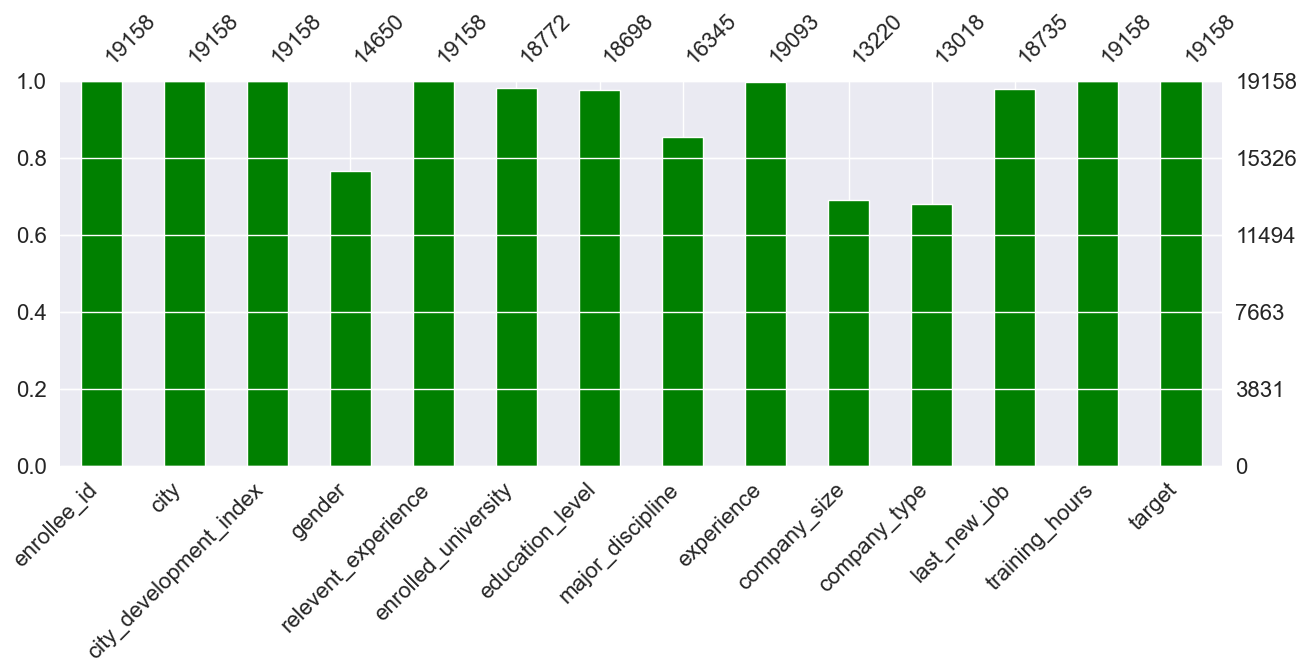

In [18]:
# Visualizing the missing values
msno.bar(data,figsize=(15,5), color="green")

<Axes: >

<Figure size 600x400 with 0 Axes>

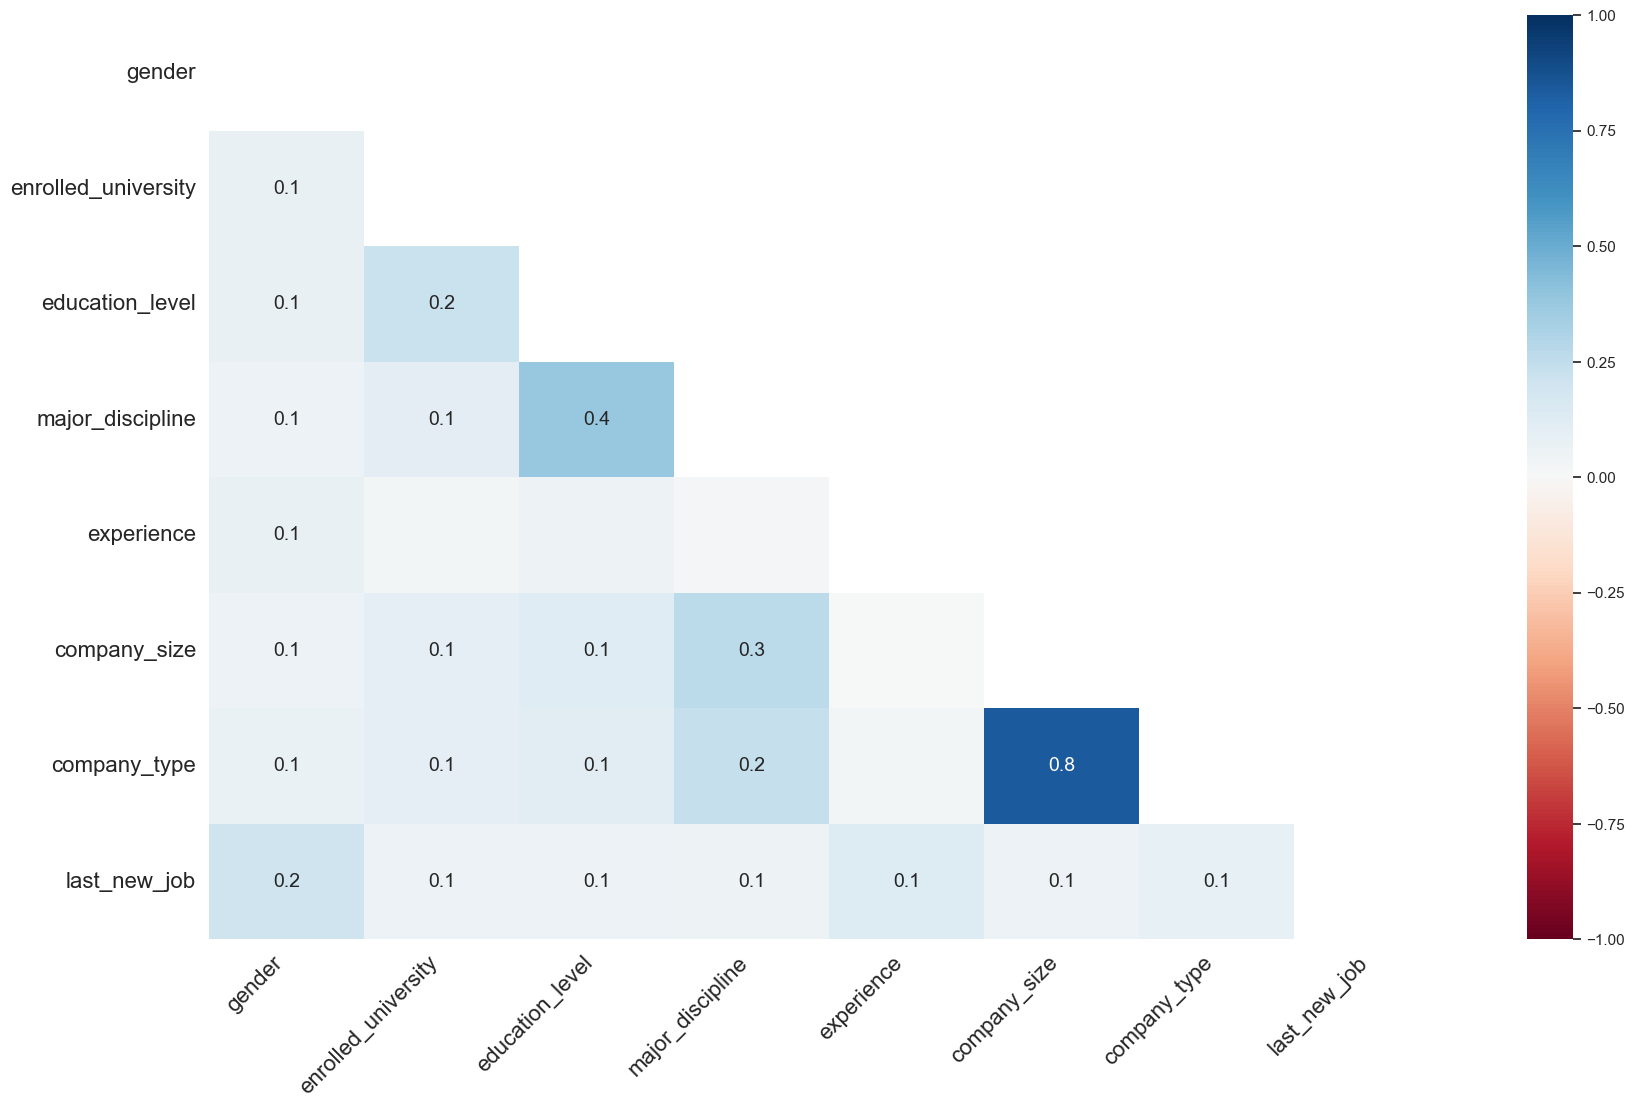

In [19]:
plt.figure(figsize=(6,4))
msno.heatmap(data)

<Axes: xlabel='company_type', ylabel='company_size'>

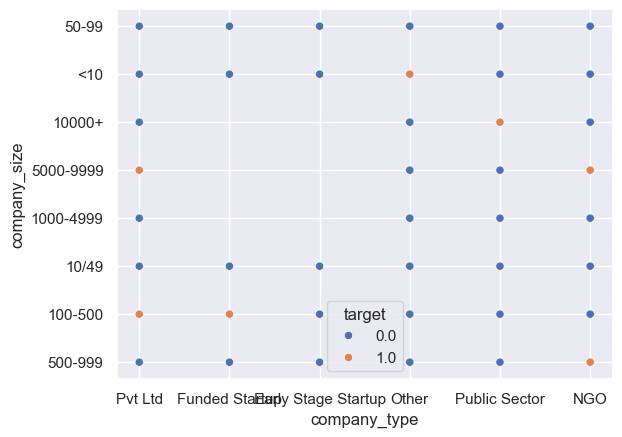

In [20]:
sns.scatterplot(x='company_type', y='company_size', hue='target', data=data)

In [21]:
print("Is there any missing value present or not ?", data.isnull().values.any())
print("*"*50)
#  Calculate the number of missing values in each column    
missing_df = data_test.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len(data_test))*100,2)
missing_df

Is there any missing value present or not ? True
**************************************************


Total No. of Missing Values  % of Missing Values
enrollee_id                                       0                 0.00
city                                              0                 0.00
city_development_index                            0                 0.00
gender                                          508                23.86
relevent_experience                               0                 0.00
enrolled_university                              31                 1.46
education_level                                  52                 2.44
major_discipline                                312                14.65
experience                                        5                 0.23
company_size                                    622                29.22
company_type                                    634                29.78
last_new_job                                     40                 1.88
training_hours                                    0                 0.00

In [22]:
# Let's find out the percentage of null values in each category in order to deal with it.
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = data_test.isnull().sum()/len(data_test)
print(f"{null_count_by_variable.sort_values(ascending=False)*100}%")
print("-"*50)

Percentage of null values in each variable: 
--------------------------------------------------
company_type              29.779239
company_size              29.215594
gender                    23.860968
major_discipline          14.654767
education_level            2.442461
last_new_job               1.878816
enrolled_university        1.456083
experience                 0.234852
enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
relevent_experience        0.000000
training_hours             0.000000
dtype: float64%
--------------------------------------------------


<Axes: >

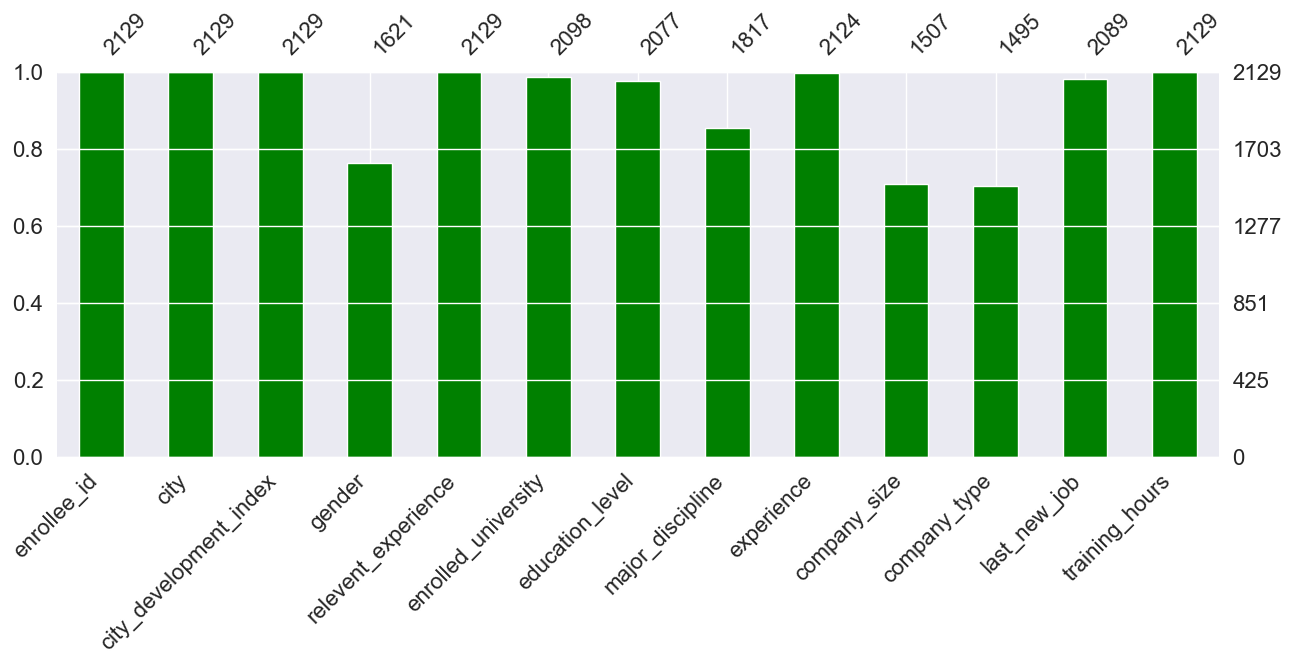

In [23]:
# Visualizing the missing values
msno.bar(data_test,figsize=(15,5), color="green")

### g) Descriptive Analysis on Numerical Attributes

In [24]:
data.describe().T

count          mean          std    min      25%  \
enrollee_id             19158.0  16875.358179  9616.292592  1.000  8554.25   
city_development_index  19158.0      0.828848     0.123362  0.448     0.74   
training_hours          19158.0     65.366896    60.058462  1.000    23.00   
target                  19158.0      0.249348     0.432647  0.000     0.00   

                              50%       75%        max  
enrollee_id             16982.500  25169.75  33380.000  
city_development_index      0.903      0.92      0.949  
training_hours             47.000     88.00    336.000  
target                      0.000      0.00      1.000

In [25]:
data_test.describe().T

count          mean          std    min       25%  \
enrollee_id             2129.0  16861.614843  9576.846029  3.000  8562.000   
city_development_index  2129.0      0.824984     0.125074  0.448     0.698   
training_hours          2129.0     64.983091    60.238660  1.000    23.000   

                              50%       75%        max  
enrollee_id             16816.000  25129.00  33353.000  
city_development_index      0.903      0.92      0.949  
training_hours             47.000     86.00    334.000

### h) Descriptive Analysis on Categorical Attributes

In [26]:
data.describe(include="O").T

count unique                      top   freq
city                 19158    123                 city_103   4355
gender               14650      3                     Male  13221
relevent_experience  19158      2  Has relevent experience  13792
enrolled_university  18772      3            no_enrollment  13817
education_level      18698      5                 Graduate  11598
major_discipline     16345      6                     STEM  14492
experience           19093     22                      >20   3286
company_size         13220      8                    50-99   3083
company_type         13018      6                  Pvt Ltd   9817
last_new_job         18735      6                        1   8040

In [27]:
data_test.describe(include="O").T

count unique                      top  freq
city                 2129    108                 city_103   473
gender               1621      3                     Male  1460
relevent_experience  2129      2  Has relevent experience  1524
enrolled_university  2098      3            no_enrollment  1519
education_level      2077      5                 Graduate  1269
major_discipline     1817      6                     STEM  1621
experience           2124     22                      >20   383
company_size         1507      8                    50-99   338
company_type         1495      6                  Pvt Ltd  1141
last_new_job         2089      6                        1   884

### i) Checking Unique Values on Categorical Attributes

In [28]:
# Calculate the number of unique values in each column
for column in data.columns:
    print(f"{column} - Number of unique values : {data[column].nunique()}")
    print("=============================================================")

enrollee_id - Number of unique values : 19158
city - Number of unique values : 123
city_development_index - Number of unique values : 93
gender - Number of unique values : 3
relevent_experience - Number of unique values : 2
enrolled_university - Number of unique values : 3
education_level - Number of unique values : 5
major_discipline - Number of unique values : 6
experience - Number of unique values : 22
company_size - Number of unique values : 8
company_type - Number of unique values : 6
last_new_job - Number of unique values : 6
training_hours - Number of unique values : 241
target - Number of unique values : 2


In [29]:
categorical_features = ["gender", "relevent_experience", "relevent_experience", "enrolled_university", "education_level", "major_discipline", "experience", "company_size", "company_type", "last_new_job", "target"]
for i in categorical_features:
    print(f"{i} : {data[i].unique()}")
    print(data[i].value_counts())
    print("===================================================================================")

gender : ['Male' nan 'Female' 'Other']
gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64
relevent_experience : ['Has relevent experience' 'No relevent experience']
relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: count, dtype: int64
relevent_experience : ['Has relevent experience' 'No relevent experience']
relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: count, dtype: int64
enrolled_university : ['no_enrollment' 'Full time course' nan 'Part time course']
enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64
education_level : ['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64
major_discipline : ['STEM' 'Business Degree' nan 'Arts' 

In [30]:
# Calculate the number of unique values in each column
for column in data_test.columns:
    print(f"{column} - Number of unique values : {data_test[column].nunique()}")
    print("=============================================================")

enrollee_id - Number of unique values : 2129
city - Number of unique values : 108
city_development_index - Number of unique values : 81
gender - Number of unique values : 3
relevent_experience - Number of unique values : 2
enrolled_university - Number of unique values : 3
education_level - Number of unique values : 5
major_discipline - Number of unique values : 6
experience - Number of unique values : 22
company_size - Number of unique values : 8
company_type - Number of unique values : 6
last_new_job - Number of unique values : 6
training_hours - Number of unique values : 223


In [31]:
categorical_features = ["gender", "relevent_experience", "relevent_experience", "enrolled_university", "education_level", "major_discipline", "experience", "company_size", "company_type", "last_new_job"]
for i in categorical_features:
    print(f"{i} : {data_test[i].unique()}")
    print(data_test[i].value_counts())
    print("===================================================================================")

gender : ['Male' 'Female' nan 'Other']
gender
Male      1460
Female     137
Other       24
Name: count, dtype: int64
relevent_experience : ['Has relevent experience' 'No relevent experience']
relevent_experience
Has relevent experience    1524
No relevent experience      605
Name: count, dtype: int64
relevent_experience : ['Has relevent experience' 'No relevent experience']
relevent_experience
Has relevent experience    1524
No relevent experience      605
Name: count, dtype: int64
enrolled_university : ['Full time course' 'no_enrollment' 'Part time course' nan]
enrolled_university
no_enrollment       1519
Full time course     435
Part time course     144
Name: count, dtype: int64
education_level : ['Graduate' 'High School' 'Masters' nan 'Phd' 'Primary School']
education_level
Graduate          1269
Masters            496
High School        222
Phd                 54
Primary School      36
Name: count, dtype: int64
major_discipline : ['STEM' nan 'Other' 'Business Degree' 'Arts' 'Humani

### j) Checking Duplicate values

In [32]:
dups = data.duplicated()
print("No of duplicate rows = %d" %(dups.sum()))
data[dups]

No of duplicate rows = 0


Empty DataFrame
Columns: [enrollee_id, city, city_development_index, gender, relevent_experience, enrolled_university, education_level, major_discipline, experience, company_size, company_type, last_new_job, training_hours, target]
Index: []

In [33]:
dups = data_test.duplicated()
print("No of duplicate rows = %d" %(dups.sum()))
data_test[dups]

No of duplicate rows = 0


Empty DataFrame
Columns: [enrollee_id, city, city_development_index, gender, relevent_experience, enrolled_university, education_level, major_discipline, experience, company_size, company_type, last_new_job, training_hours]
Index: []

### k) Checking Outliers

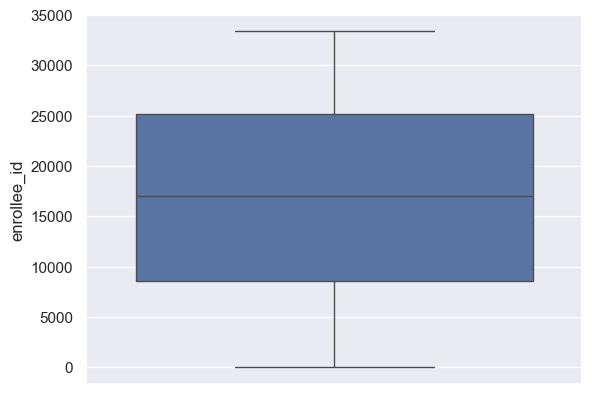

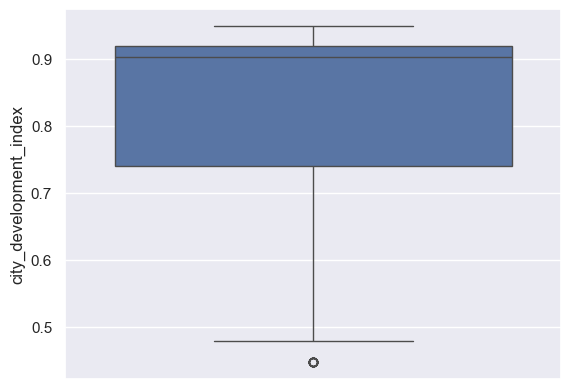

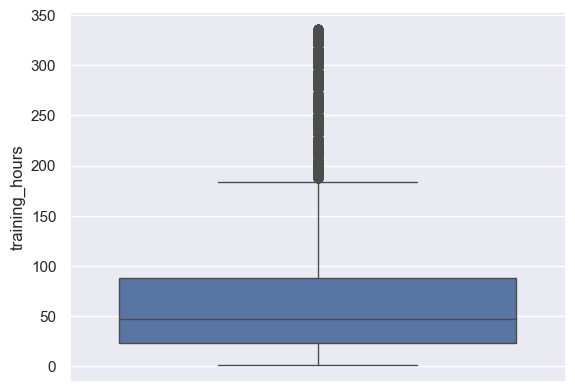

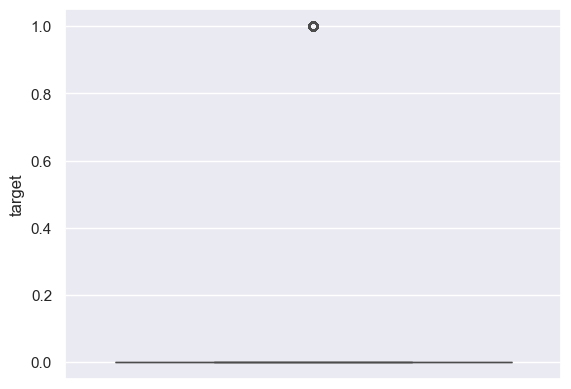

In [34]:
def boxplots(col):
    sns.boxplot(data[col])
    plt.show()
    
for i in list(data.select_dtypes(exclude=['object']).columns):
    boxplots(i)

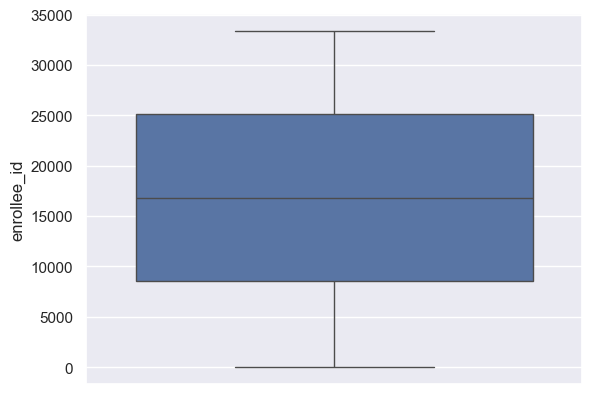

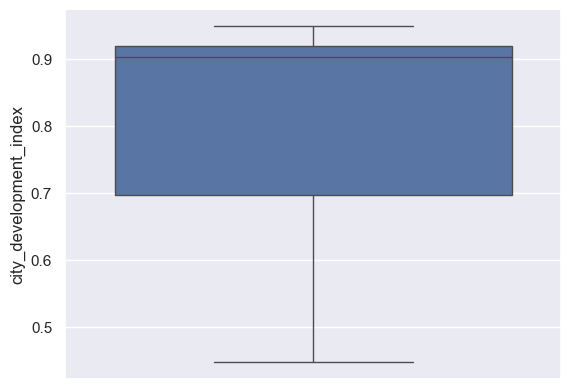

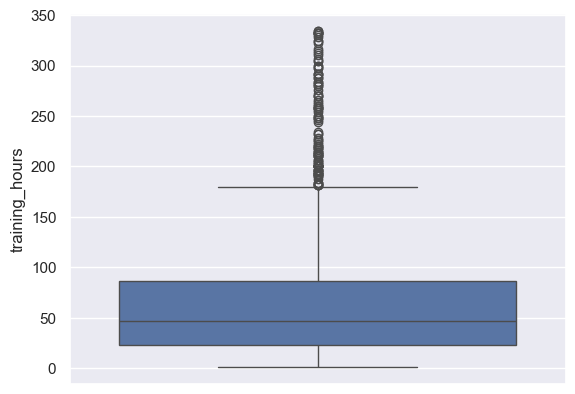

In [35]:
def boxplots(col):
    sns.boxplot(data_test[col])
    plt.show()
    
for i in list(data_test.select_dtypes(exclude=['object']).columns):
    boxplots(i)

### l) Checking the correlation between each feature.

<Axes: >

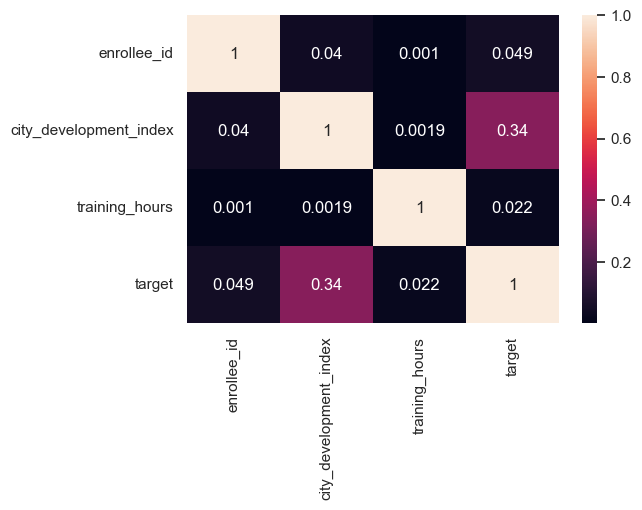

In [36]:
# Plotting the correlation matrix using heatmap
plt.figure(figsize=(6,4))
correlation = data.corr(numeric_only=True)
sns.heatmap(abs(correlation), annot=True)

<Axes: >

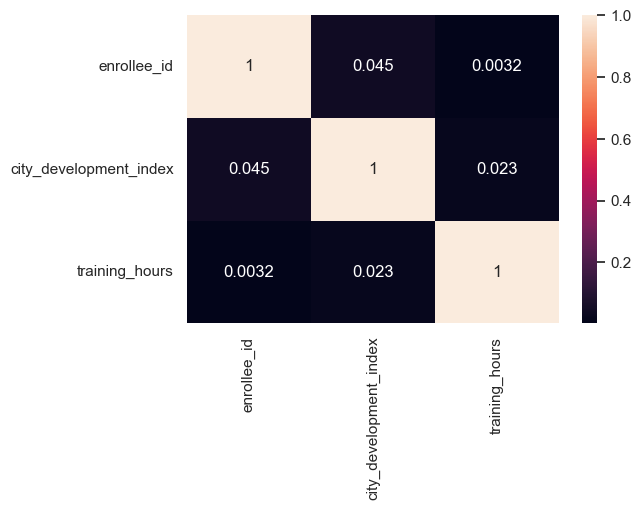

In [37]:
# Plotting the correlation matrix using heatmap
plt.figure(figsize=(6,4))
correlation = data_test.corr(numeric_only=True)
sns.heatmap(abs(correlation), annot=True)

# Explaratory Data Analysis

In [5]:
data1 = data.copy()
data2 = data.copy()
data1.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

In [6]:
data1["experience"].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [7]:
# # Labelling Categories in Numerical Features
data1.loc[data1['experience'] == '>20', 'experience'] = '21'
data1.loc[data1['experience'] == '<1', 'experience'] = '0'
data1['experience'] = data1['experience'].astype(float)
data1['experience'].unique()

array([21., 15.,  5.,  0., 11., 13.,  7., 17.,  2., 16.,  1.,  4., 10.,
       14., 18., 19., 12.,  3.,  6.,  9.,  8., 20., nan])

In [8]:
print("Is there any missing value present or not ?", data1.isnull().values.any())
print("*"*50)
#  Calculate the number of missing values in each column    
missing_df = data1.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len(data))*100,2)
missing_df

Is there any missing value present or not ? True
**************************************************


Total No. of Missing Values  % of Missing Values
enrollee_id                                       0                 0.00
city                                              0                 0.00
city_development_index                            0                 0.00
gender                                         4508                23.53
relevent_experience                               0                 0.00
enrolled_university                             386                 2.01
education_level                                 460                 2.40
major_discipline                               2813                14.68
experience                                       65                 0.34
company_size                                   5938                30.99
company_type                                   6140                32.05
last_new_job                                    423                 2.21
training_hours                                    0                 0.00
target                                            0                 0.00

In [14]:
print("Is there any missing value present or not ?", data1.isnull().values.any())
print("*"*50)
#  Calculate the number of missing values in each column    
missing_df = data1.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len(data))*100,2)
missing_df

Is there any missing value present or not ? True
**************************************************


Total No. of Missing Values  % of Missing Values
enrollee_id                                       0                 0.00
city                                              0                 0.00
city_development_index                            0                 0.00
gender                                         4508                23.53
relevent_experience                               0                 0.00
enrolled_university                             386                 2.01
education_level                                 460                 2.40
major_discipline                               2813                14.68
experience                                       65                 0.34
company_size                                   5938                30.99
company_type                                   6140                32.05
last_new_job                                    423                 2.21
training_hours                                    0                 0.00
target                                            0                 0.00

In [15]:
categorical_features = ["gender", "enrolled_university", "education_level", "major_discipline", "experience", "company_size", "company_type", "last_new_job"]
for i in categorical_features:
    print(f"{i} : {data1[i].unique()}")
    print(data1[i].value_counts())
    print("===================================================================================")

gender : ['Male' nan 'Female' 'Other']
gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64
enrolled_university : ['no_enrollment' 'Full time course' nan 'Part time course']
enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64
education_level : ['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64
major_discipline : ['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']
major_discipline
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64
experience : [21. 15.  5.  0. 11. 13.  7. 17.  2. 16.  1.  4. 10. 14. 18. 19. 12.  3.
  6.  9.  8. 20. nan]
experience
21.0    3286
5.0     1430
4.0

In [16]:
numerical_features = ["experience"]
for i in numerical_features:
    print(f"{i} : {data1[i].unique()}")
    print(f"Mean : {data1[i].mean()}")
    print(f"Median : {data1[i].median()}")
    print(f"Most Frequent : {data1[i].mode()[0]}")
    print(f"Standard Deviation : {data1[i].std()}")
    Q1 = data1[i].quantile(0.25)
    Q3 = data1[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3+1.5*IQR
    lower_bound = Q1-1.5*IQR
    outliers = data1[i][((data1[i]<(Q1-1.5*IQR)) | (data1[i]>(Q3+1.5*IQR)))]
    print(f"Quintile1(Q1) : {data1[i].quantile(0.25)}")
    print(f"Quintile1(Q3) : {data1[i].quantile(0.75)}")
    print(f"IQR : {IQR}")
    print(f"upper_bound : {upper_bound}")
    print(f"lower_bound : {lower_bound}")
    print(f"No. of Outliers : {outliers.count()}")
    print("===================================================================================")

experience : [21. 15.  5.  0. 11. 13.  7. 17.  2. 16.  1.  4. 10. 14. 18. 19. 12.  3.
  6.  9.  8. 20. nan]
Mean : 10.100141413083328
Median : 9.0
Most Frequent : 21.0
Standard Deviation : 6.7770244520856195
Quintile1(Q1) : 4.0
Quintile1(Q3) : 16.0
IQR : 12.0
upper_bound : 34.0
lower_bound : -14.0
No. of Outliers : 0


In [17]:
data1["experience"].describe().to_frame()

experience
count  19093.000000
mean      10.100141
std        6.777024
min        0.000000
25%        4.000000
50%        9.000000
75%       16.000000
max       21.000000

In [18]:
# Filling nan values
data1["enrolled_university"].fillna(data1["enrolled_university"].mode()[0], inplace=True)
data1["education_level"].fillna(data1["education_level"].mode()[0], inplace=True)
data1["major_discipline"].fillna(data1["major_discipline"].mode()[0], inplace=True)
data1["experience"].fillna(data1["experience"].mean(), inplace=True)
data1["last_new_job"].fillna(data1["last_new_job"].mode()[0], inplace=True)
data1["gender"].fillna(data1["gender"].mode()[0], inplace=True)


In [19]:
print("Is there any missing value present or not ?", data1.isnull().values.any())
print("*"*50)
#  Calculate the number of missing values in each column    
missing_df = data1.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len(data))*100,2)
missing_df

Is there any missing value present or not ? True
**************************************************


Total No. of Missing Values  % of Missing Values
enrollee_id                                       0                 0.00
city                                              0                 0.00
city_development_index                            0                 0.00
gender                                            0                 0.00
relevent_experience                               0                 0.00
enrolled_university                               0                 0.00
education_level                                   0                 0.00
major_discipline                                  0                 0.00
experience                                        0                 0.00
company_size                                   5938                30.99
company_type                                   6140                32.05
last_new_job                                      0                 0.00
training_hours                                    0                 0.00
target                                            0                 0.00

In [20]:
data1["id"] = np.arange(0, len(data1))
data2["id"] = np.arange(0, len(data2))

##### Function for Univariate Analysis

In [21]:
# Function for Univariate Analysis
def Univariate_Analysis(column_name):
    df_EDA = pd.DataFrame(sorted(list(data[column_name].unique())),columns=[column_name])
    df_EDA['Total_Count'] = list(data.groupby(column_name)["target"].count())
    df_EDA["% of Total"] = list(data[column_name].value_counts()/data.shape[0]*100)
    df_EDA['Leave'] = list(data[data["target"]==1].groupby(column_name)
                              ["target"].count())
    df_EDA['Stay'] = list(data[data["target"]==0].groupby(column_name)
                              ["target"].count())
    df_EDA['%Leave'] = round(df_EDA['Leave']/df_EDA['Total_Count']*100,3)
    df_EDA['%Stay'] = round(df_EDA['Stay']/df_EDA['Total_Count']*100,3)
    df_EDA = df_EDA.sort_values(by='Total_Count', ascending=False)
    
    fig = plt.subplots(figsize =(8, 4))
    plt.barh(df_EDA[column_name],df_EDA['Total_Count'])
    plt.barh(df_EDA[column_name],df_EDA['Leave'])
    plt.legend(labels=['Total','Leave'])
    plt.xlabel('Counts')
    plt.title(column_name+' wise Leave')
    plt.show()
    
    

    return df_EDA

In [22]:
# Function for Univariate Analysis
def Univariate_Analysis1(column_name):
    df_EDA = pd.DataFrame(sorted(list(data1[column_name].unique())),columns=[column_name])
    df_EDA['Total_Count'] = list(data1.groupby(column_name)["target"].count())
    df_EDA["% of Total"] = list(data1[column_name].value_counts()/data1.shape[0]*100)
    df_EDA['Leave'] = list(data1[data1["target"]==1].groupby(column_name)
                              ["target"].count())
    df_EDA['Stay'] = list(data1[data1["target"]==0].groupby(column_name)
                              ["target"].count())
    df_EDA['%Leave'] = round(df_EDA['Leave']/df_EDA['Total_Count']*100,3)
    df_EDA['%Stay'] = round(df_EDA['Stay']/df_EDA['Total_Count']*100,3)
    df_EDA = df_EDA.sort_values(by='Total_Count', ascending=False)
    
    fig = plt.subplots(figsize =(8, 4))
    plt.barh(df_EDA[column_name],df_EDA['Total_Count'])
    plt.barh(df_EDA[column_name],df_EDA['Leave'])
    plt.legend(labels=['Total','Leave'])
    plt.xlabel('Counts')
    plt.title(column_name+' wise Leave')
    plt.show()
    
    

    return df_EDA

##### Function for Numerical target plot

In [23]:
def NumericalVariables_targetPlots(df,segment_by,target_var = "target"):
    """A function for plotting the distribution of numerical variables and its effect on target"""
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

    #boxplot for comparison
    sns.boxplot(x = target_var, y = segment_by, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + segment_by + " vs " + target_var)
    
    #distribution plot
    ax[1].set_title("Distribution of "+segment_by)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment_by], ax=ax[1], kde=False)
    
    plt.show()

##### Function for Categorical target plot

In [24]:
def CategoricalVariables_targetPlots(df, segment_by,invert_axis = False, target_var = "target"):
    
    """A function for Plotting the effect of variables(categorical data) on target """
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))
    
    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    if invert_axis == False:
        sns.countplot(x = segment_by, data=df,hue="target",ax=ax[0], palette=sns.color_palette())
    else:
        sns.countplot(y = segment_by, data=df,hue="target",ax=ax[0], palette=sns.color_palette())
        
    ax[0].set_title("Comparision of " + segment_by + " vs " + "target")
    
    #plot the effect of variable on attrition
    if invert_axis == False:
        sns.barplot(x = segment_by, y = target_var ,data=df,ci=None, palette=sns.color_palette())
    else:
        sns.barplot(y = segment_by, x = target_var ,data=df,ci=None, palette=sns.color_palette())
        
    ax[1].set_title("target(Leave) rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(target)")
    plt.tight_layout()

    plt.show()

##### Function for chu-square test on categorical variables

In [25]:
# function for chi suqared test for 2 categorical  variables

def chi_sqred_ind_test(df, col1, col2, alpha=0.05, debug=True, print_result=True):
    contigency_table =  pd.crosstab(df[col1],df[col2],margins = False)
    
    if debug:
        print("Contigency table: \n" , contigency_table)
    stat, p_val, dof, expected_val = chi2_contingency(contigency_table)
    if debug:
        print("Statistic:", stat)
        print("P-value:", p_val)
        print("DOF:", dof)
    critical = chi2.ppf(1-alpha, dof)
    
    if print_result:
        if debug:
            print('probability=%.3f, critical=%.3f, stat=%.3f' % (1-alpha, critical, stat))
        if abs(stat) >= critical:
            print("Dependent (reject Null Hypothesis(H0))")
        else:
            print('Independent (fail to reject Null Hypothesis(H0))')
        if p_val <= alpha:
            print("Dependent (reject Null Hypothesis(H0))")
        else:
            print('Independent (fail to reject Null Hypothesis(H0))')
    return stat, p_val, dof

##### Function for  Hypothesis test on numerical variables

In [26]:
# Hypothesis z-test
from statsmodels.stats.weightstats import ztest as ztest

#perform two sample z-test
def Hypothesisztest(x1, x2):
    stats, p_val = ztest(x1, x2, value=0)
    print(f"Yes_mean : {x1.mean()}")
    print("*"*50)
    print(f"No_mean : {x2.mean()}")
    print("*"*50)
    print(f"Yes_std : {x1.std()}")
    print("*"*50)
    print(f"No_std : {x2.std()}")
    print("*"*50)
    print(f"stats : {stats}")
    print("*"*50)
    print(f"p_val : {p_val}")

    if p_val < 0.05:
        print("We Reject Null Hypothesis i.e means of two groups not equal")
    else:
        print("We fails to Reject Null Hypothesis i.e means of two groups are equal")

In [27]:
# Hypothesis t-test
import scipy.stats as stats
import scipy.stats as stats


#perform two sample t-test
def Hypothesisttest(x1, x2):
    statics, p_val = stats.ttest_ind(x1, x2, equal_var=True)
    print(f"Yes_mean : {x1.mean()}")
    print("*"*50)
    print(f"No_mean : {x2.mean()}")
    print("*"*50)
    print(f"Yes_std : {x1.std()}")
    print("*"*50)
    print(f"No_std : {x2.std()}")
    print("*"*50)
    print(f"statics : {statics}")
    print("*"*50)
    print(f"p_val : {p_val}")

    if p_val < 0.05:
        print("We Reject Null Hypothesis i.e means of two groups not equal")
    else:
        print("We fails to Reject Null Hypothesis i.e means of two groups are equal")

## Visualizing  target

In [64]:
class_count = data1["target"].value_counts()
print(class_count)
print(f"0 : {class_count[0]}, {round(class_count[0]/data1.shape[0]*100,3)}%")
print(f"1 : {class_count[1]}, {round(class_count[1]/data1.shape[0]*100,3)}%")

target
0.0    14381
1.0     4777
Name: count, dtype: int64
0 : 14381, 75.065%
1 : 4777, 24.935%


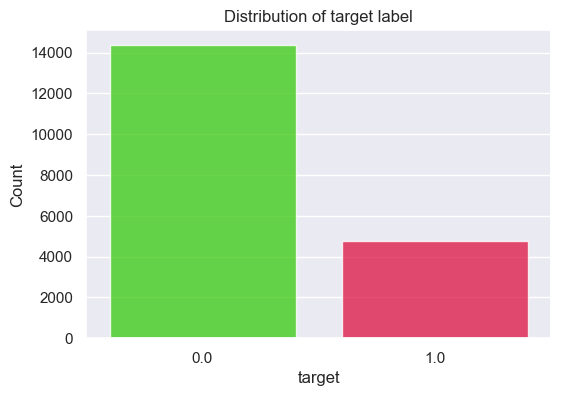

In [65]:
count = data1["target"].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=count.index, y=count.values, alpha=0.8, palette="prism")
plt.ylabel("Count", fontsize=12)
plt.xlabel("target", fontsize=12)
plt.title("Distribution of target label")
plt.show()

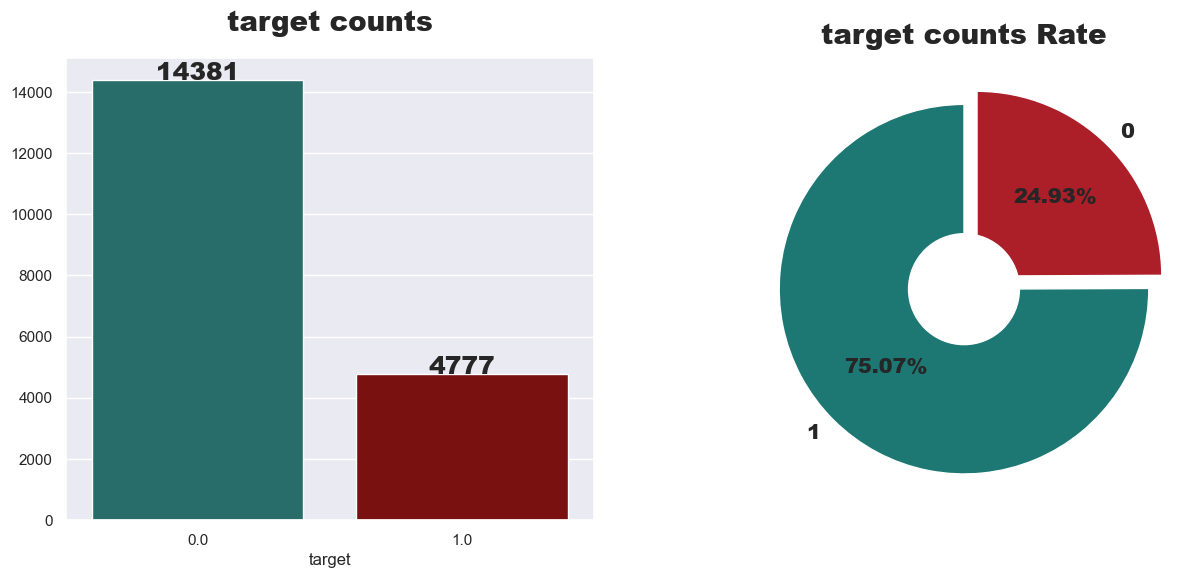

In [66]:
#Visualization to show CHD in Counts.
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
accptance_rate = data1["target"].value_counts()
sns.barplot(x=accptance_rate.index, y=accptance_rate.values, palette=["#1d7874","#8B0000"])
plt.title("target counts",fontweight="black",size=20,pad=20)
# for i, v in enumerate(accptance_rate.values):
#     plt.text(i, v, v,ha="center", fontweight='black', fontsize=18)
plt.text(0, accptance_rate.values[0], 14381, ha="center", fontweight='black', fontsize=18)
plt.text(1, accptance_rate.values[1], 4777, ha="center", fontweight='black', fontsize=18)

#Visualization to show CHD in Percentage.
plt.subplot(1,2,2)
plt.pie(accptance_rate, labels=["1","0"], autopct="%.2f%%", textprops={"fontweight":"black","size":15},
        colors = ["#1d7874","#AC1F29"],explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("target counts Rate",fontweight="black",size=20,pad=10)
plt.show()


**Inference:**
* Dataset is highly imbalanced.

## Visualizing  city


In [67]:
data1["city"].value_counts()

city
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
city_136     586
city_67      431
city_75      305
city_102     304
city_104     301
city_73      280
city_100     275
city_71      266
city_11      247
city_90      197
city_61      197
city_28      192
city_23      182
city_65      175
city_36      160
city_173     151
city_83      143
city_50      140
city_116     128
city_46      128
city_162     128
city_138     120
city_19      119
city_64      114
city_45      113
city_97      104
city_74      104
city_57      103
city_149     102
city_159      94
city_99       94
city_128      92
city_41       89
city_10       86
city_165      82
city_98       79
city_105      79
city_123      79
city_101      75
city_40       68
city_89       67
city_150      65
city_145      63
city_24       62
city_115      54
city_142      53
city_152      51
city_76       50
city_158      49
city_13       48
city_27       47
city_91       45
city_70       44
city_134 

In [68]:
data["city"].unique()

array(['city_103', 'city_40', 'city_21', 'city_115', 'city_162',
       'city_176', 'city_160', 'city_46', 'city_61', 'city_114',
       'city_13', 'city_159', 'city_102', 'city_67', 'city_100',
       'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83',
       'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93',
       'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19',
       'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97',
       'city_50', 'city_138', 'city_82', 'city_157', 'city_89',
       'city_150', 'city_70', 'city_175', 'city_94', 'city_28', 'city_59',
       'city_165', 'city_145', 'city_142', 'city_26', 'city_12',
       'city_37', 'city_43', 'city_116', 'city_23', 'city_99', 'city_149',
       'city_10', 'city_45', 'city_80', 'city_128', 'city_158',
       'city_123', 'city_7', 'city_72', 'city_106', 'city_143', 'city_78',
       'city_109', 'city_24', 'city_134', 'city_48', 'city_144',
       'city_91', 'city_

In [69]:
data["city"].nunique()

123

##### Which city group is more vulnerable to Leaving company ?

Text(0.5, 1.0, 'city Distrubution')

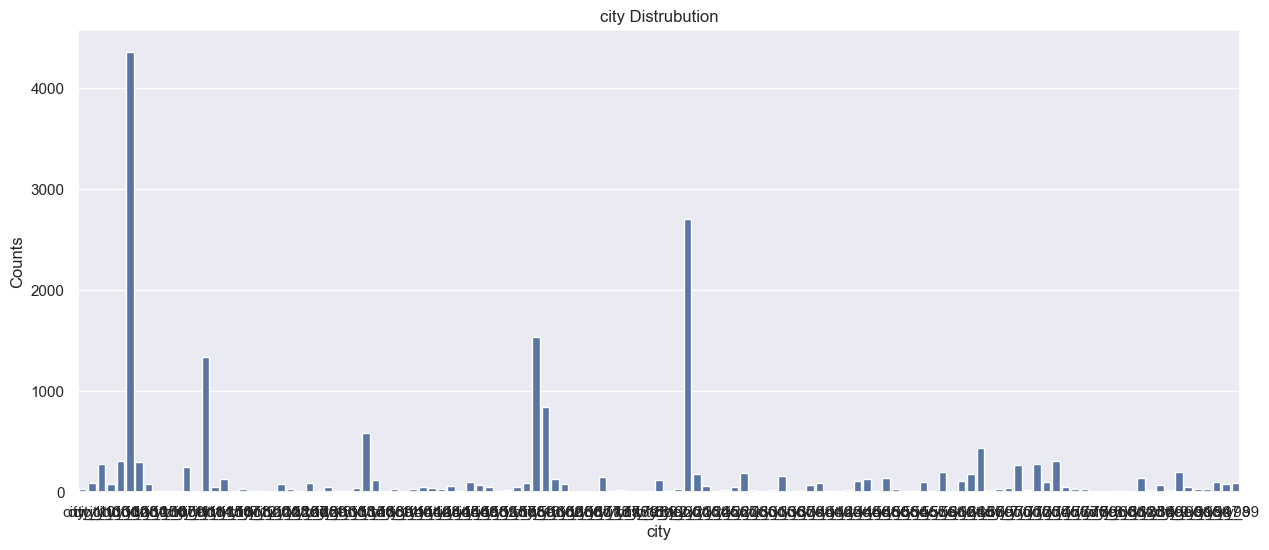

In [70]:
fig, ax = plt.subplots(figsize=(15,6))
age_dis=pd.DataFrame(data1.groupby(['city'])['id'].count())
sns.barplot(x=age_dis.index,y=age_dis['id'])
plt.ylabel('Counts')
plt.title('city Distrubution')

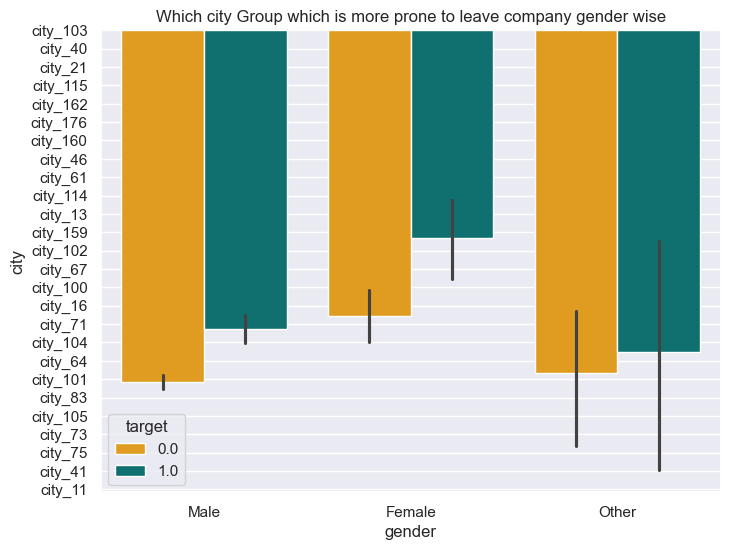

In [71]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (8,6))
ax = sns.barplot(x = data1['gender'], y = data1['city'], hue = data1['target'], palette = my_palette)
plt.title("Which city Group which is more prone to leave company gender wise")
handles, _ = ax.get_legend_handles_labels()          
# ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

<Axes: xlabel='city', ylabel='count'>

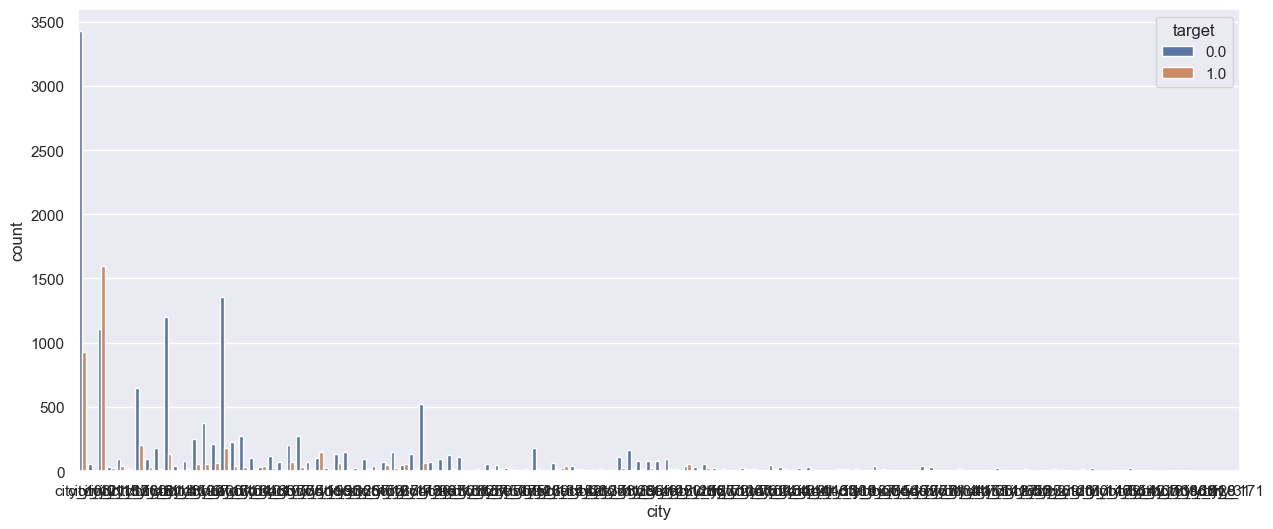

In [72]:
plt.figure(figsize=(15,6))
sns.countplot(x="city", hue="target", data=data, palette=sns.color_palette())

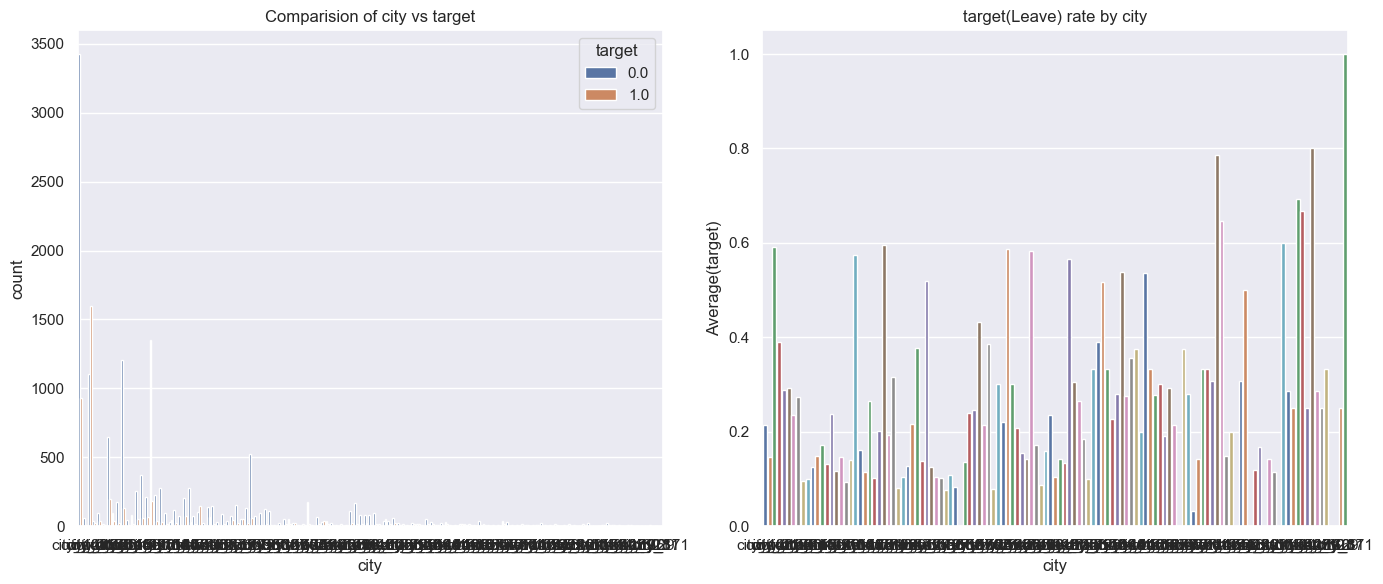

In [73]:
CategoricalVariables_targetPlots(data1,"city")

target      city  count  count_norm
0       0.0    city_1     23    0.884615
1       0.0   city_10     77    0.895349
2       0.0  city_100    210    0.763636
3       0.0  city_101     32    0.426667
4       0.0  city_102    252    0.828947
5       0.0  city_103   3427    0.786912
6       0.0  city_104    273    0.906977
7       0.0  city_105     70    0.886076
8       0.0  city_106      6    0.666667
9       0.0  city_107      2    0.333333
10      0.0  city_109      6    0.666667
11      0.0   city_11    100    0.404858
12      0.0  city_111      3    1.000000
13      0.0  city_114   1203    0.900449
14      0.0  city_115     33    0.611111
15      0.0  city_116    106    0.828125
16      0.0  city_117      9    0.692308
17      0.0  city_118     18    0.666667
18      0.0   city_12     11    0.846154
19      0.0  city_120      5    0.833333
20      0.0  city_121      2    0.666667
21      0.0  city_123     58    0.734177
22      0.0  city_126     13    0.464286
23      0.0  city_127      8    0.800000
24      0.0  city_128     40    0.434783
25      0.0  city_129      3    1.000000
26      0.0   city_13     42    0.875000
27      0.0  city_131      6    0.666667
28      0.0  city_133      8    0.800000
29      0.0  city_134     31    0.720930
30      0.0  city_136    525    0.895904
31      0.0  city_138    110    0.916667
32      0.0  city_139      1    0.200000
33      0.0   city_14     21    0.750000
34      0.0  city_140      1    1.000000
35      0.0  city_141     23    0.851852
36      0.0  city_142     37    0.698113
37      0.0  city_143     25    0.609756
38      0.0  city_144     21    0.724138
39      0.0  city_145     26    0.412698
40      0.0  city_146      5    0.625000
41      0.0  city_149     78    0.764706
42      0.0  city_150     49    0.753846
43      0.0  city_152     40    0.784314
44      0.0  city_155      3    0.214286
45      0.0  city_157     19    0.863636
46      0.0  city_158     34    0.693878
47      0.0  city_159     80    0.851064
48      0.0   city_16   1354    0.883235
49      0.0  city_160    646    0.764497
50      0.0  city_162     91    0.710938
51      0.0  city_165     64    0.780488
52      0.0  city_166      3    0.750000
53      0.0  city_167      7    0.700000
54      0.0  city_173    132    0.874172
55      0.0  city_175     11    0.785714
56      0.0  city_176     17    0.708333
57      0.0  city_179      2    0.400000
58      0.0   city_18      3    0.750000
59      0.0  city_180      5    0.714286
60      0.0   city_19     74    0.621849
61      0.0    city_2      7    1.000000
62      0.0   city_20     26    0.896552
63      0.0   city_21   1105    0.408956
64      0.0   city_23    166    0.912088
65      0.0   city_24     48    0.774194
66      0.0   city_25      2    0.500000
67      0.0   city_26     19    0.791667
68      0.0   city_27     38    0.808511
69      0.0   city_28    177    0.921875
70      0.0   city_30     18    0.857143
71      0.0   city_31      3    0.750000
72      0.0   city_33      6    0.352941
73      0.0   city_36    147    0.918750
74      0.0   city_37     12    0.857143
75      0.0   city_39     11    1.000000
76      0.0   city_40     58    0.852941
77      0.0   city_41     71    0.797753
78      0.0   city_42      4    0.307692
79      0.0   city_43      5    0.416667
80      0.0   city_44     12    0.666667
81      0.0   city_45     97    0.858407
82      0.0   city_46     93    0.726562
83      0.0   city_48      6    0.461538
84      0.0   city_50    125    0.892857
85      0.0   city_53     18    0.692308
86      0.0   city_54     11    0.785714
87      0.0   city_55     10    0.714286
88      0.0   city_57     90    0.873786
89      0.0   city_59      7    0.700000
90      0.0   city_61    178    0.903553
91      0.0   city_62      5    1.000000
92      0.0   city_64     98    0.859649
93      0.0   city_65    151    0.862857
94      0.0   city_67    374    0.867749
95      0.0   city_69     15    0.882353
96      0.0    city_7     22

<Axes: xlabel='city'>

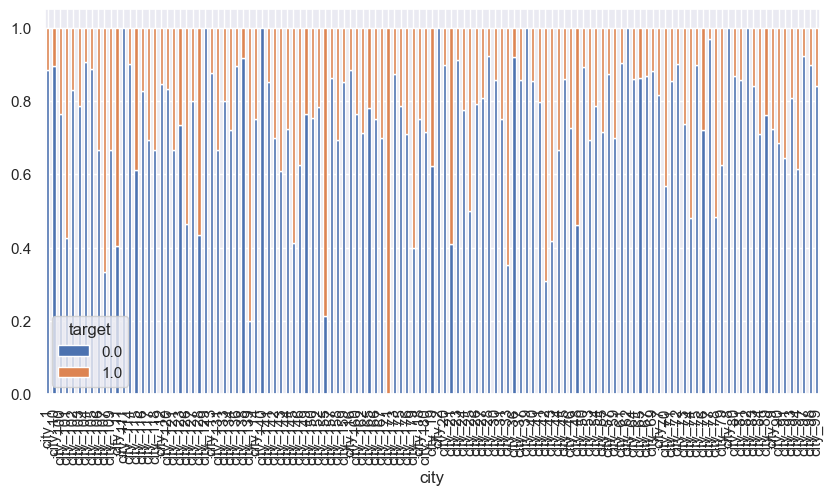

In [74]:
tmp = data1[["target", "city"]]
tmp["count"] = 1
tmp = tmp.groupby(["target", "city"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "city==\""+row["city"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="target", index="city", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))

In [75]:
# Hypothesis testing on "education" column
stat, p_val, dof = chi_sqred_ind_test(data1, "city", "target", 0.05)

Contigency table: 
 target     0.0   1.0
city                
city_1      23     3
city_10     77     9
city_100   210    65
city_101    32    43
city_102   252    52
city_103  3427   928
city_104   273    28
city_105    70     9
city_106     6     3
city_107     2     4
city_109     6     3
city_11    100   147
city_111     3     0
city_114  1203   133
city_115    33    21
city_116   106    22
city_117     9     4
city_118    18     9
city_12     11     2
city_120     5     1
city_121     2     1
city_123    58    21
city_126    13    15
city_127     8     2
city_128    40    52
city_129     3     0
city_13     42     6
city_131     6     3
city_133     8     2
city_134    31    12
city_136   525    61
city_138   110    10
city_139     1     4
city_14     21     7
city_140     1     0
city_141    23     4
city_142    37    16
city_143    25    16
city_144    21     8
city_145    26    37
city_146     5     3
city_149    78    24
city_150    49    16
city_152    40    11
city_155     3

## Visualizing  city_development_index


In [76]:
data1["city_development_index"].unique()

array([0.92 , 0.776, 0.624, 0.789, 0.767, 0.764, 0.762, 0.913, 0.926,
       0.827, 0.843, 0.804, 0.855, 0.887, 0.91 , 0.884, 0.924, 0.666,
       0.558, 0.923, 0.794, 0.754, 0.939, 0.55 , 0.865, 0.698, 0.893,
       0.796, 0.866, 0.682, 0.802, 0.579, 0.878, 0.897, 0.949, 0.925,
       0.896, 0.836, 0.693, 0.769, 0.775, 0.903, 0.555, 0.727, 0.64 ,
       0.516, 0.743, 0.899, 0.915, 0.689, 0.895, 0.89 , 0.847, 0.527,
       0.766, 0.738, 0.647, 0.795, 0.74 , 0.701, 0.493, 0.84 , 0.691,
       0.735, 0.742, 0.479, 0.722, 0.921, 0.848, 0.856, 0.898, 0.83 ,
       0.73 , 0.68 , 0.725, 0.556, 0.448, 0.763, 0.745, 0.645, 0.788,
       0.78 , 0.512, 0.739, 0.563, 0.518, 0.824, 0.487, 0.649, 0.781,
       0.625, 0.807, 0.664])

In [77]:
data1["city_development_index"].nunique()

93

In [78]:
data1["city_development_index"].describe().to_frame()

city_development_index
count            19158.000000
mean                 0.828848
std                  0.123362
min                  0.448000
25%                  0.740000
50%                  0.903000
75%                  0.920000
max                  0.949000

##### Which city_development_index group is more vulnerable to leave the company ?

Text(0.5, 1.0, 'city_development_index Distrubution')

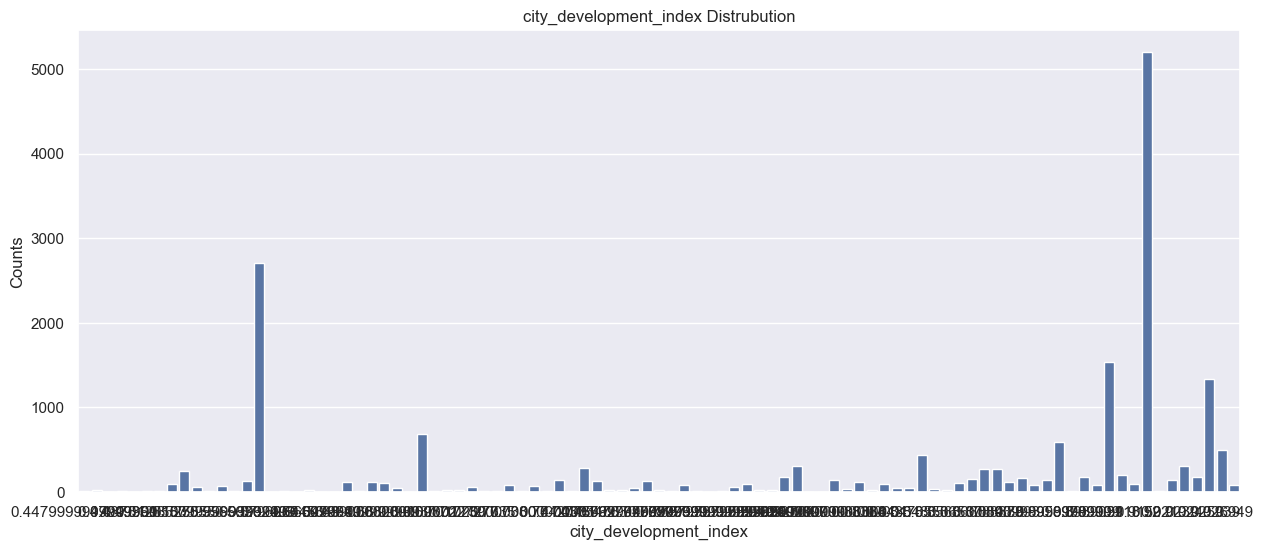

In [79]:
fig, ax = plt.subplots(figsize=(15,6))
age_dis=pd.DataFrame(data1.groupby(['city_development_index'])['id'].count())
sns.barplot(x=age_dis.index,y=age_dis['id'])
plt.ylabel('Counts')
plt.title('city_development_index Distrubution')

In [80]:
data1["city_development_index"].describe().to_frame()

city_development_index
count            19158.000000
mean                 0.828848
std                  0.123362
min                  0.448000
25%                  0.740000
50%                  0.903000
75%                  0.920000
max                  0.949000

In [81]:
data1[data1['gender']=='Male']['city_development_index'].describe().to_frame()


city_development_index
count            17729.000000
mean                 0.827335
std                  0.123960
min                  0.448000
25%                  0.738000
50%                  0.899000
75%                  0.920000
max                  0.949000

In [82]:
data1[data1['gender']=='Female']['city_development_index'].describe().to_frame()


city_development_index
count             1238.000000
mean                 0.844740
std                  0.116264
min                  0.479000
25%                  0.789000
50%                  0.920000
75%                  0.920000
max                  0.949000

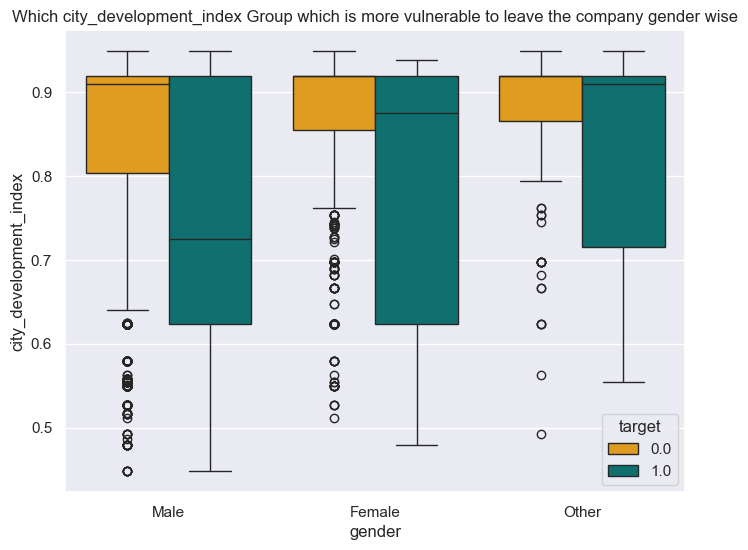

In [83]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (8,6))
ax = sns.boxplot(x = data1['gender'], y = data1['city_development_index'], hue = data1['target'], palette = my_palette)
plt.title("Which city_development_index Group which is more vulnerable to leave the company gender wise")
handles, _ = ax.get_legend_handles_labels()          
# ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

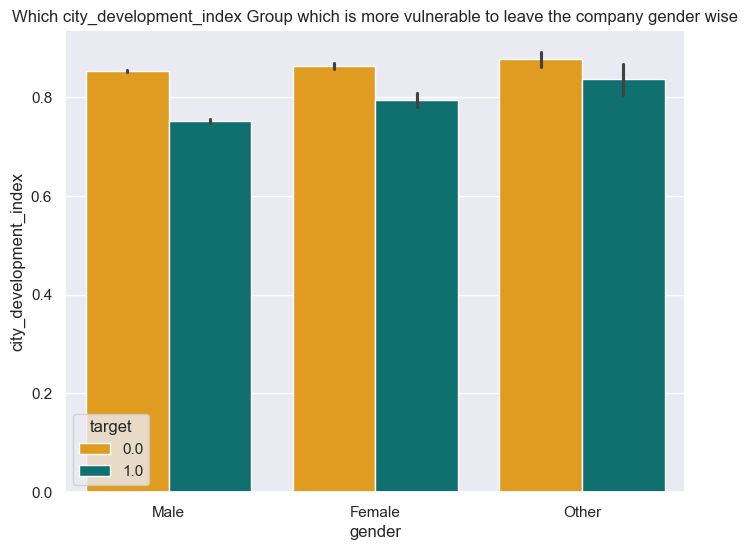

In [84]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (8,6))
ax = sns.barplot(x = data1['gender'], y = data1['city_development_index'], hue = data1['target'], palette = my_palette)
plt.title("Which city_development_index Group which is more vulnerable to leave the company gender wise")
handles, _ = ax.get_legend_handles_labels()          
# ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

In [85]:
Hypothesisttest(x1=data1.query("target == 1")["city_development_index"], x2=data1.query("target == 0")["city_development_index"])

Yes_mean : 0.7557194892191752
**************************************************
No_mean : 0.8531394200681456
**************************************************
Yes_std : 0.1431656966275837
**************************************************
No_std : 0.1053540673993056
**************************************************
statics : -50.31616259328961
**************************************************
p_val : 0.0
We Reject Null Hypothesis i.e means of two groups not equal


In [86]:
Hypothesisttest(data1["city_development_index"][data1["target"]==1], data1["city_development_index"][data1["target"]==0])

Yes_mean : 0.7557194892191752
**************************************************
No_mean : 0.8531394200681456
**************************************************
Yes_std : 0.1431656966275837
**************************************************
No_std : 0.1053540673993056
**************************************************
statics : -50.31616259328961
**************************************************
p_val : 0.0
We Reject Null Hypothesis i.e means of two groups not equal


## Visualizing  gender


In [87]:
data2["gender"].value_counts()

gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64

In [88]:
class_count = data2[data2["gender"]=='Female']["target"].value_counts()
print(class_count)
print(f"0 : {class_count[0]}, {round(class_count[0]/data2.shape[0]*100,3)}%")
print(f"1 : {class_count[1]}, {round(class_count[1]/data2.shape[0]*100,3)}%")

target
0.0    912
1.0    326
Name: count, dtype: int64
0 : 912, 4.76%
1 : 326, 1.702%


In [89]:
class_count = data2[data2["gender"]=='Male']["target"].value_counts()
print(class_count)
print(f"0 : {class_count[0]}, {round(class_count[0]/data2.shape[0]*100,3)}%")
print(f"1 : {class_count[1]}, {round(class_count[1]/data2.shape[0]*100,3)}%")

target
0.0    10209
1.0     3012
Name: count, dtype: int64
0 : 10209, 53.288%
1 : 3012, 15.722%


In [90]:
class_count = data2[data2["gender"]=='Other']["target"].value_counts()
print(class_count)
print(f"0 : {class_count[0]}, {round(class_count[0]/data2.shape[0]*100,3)}%")
print(f"1 : {class_count[1]}, {round(class_count[1]/data2.shape[0]*100,3)}%")

target
0.0    141
1.0     50
Name: count, dtype: int64
0 : 141, 0.736%
1 : 50, 0.261%


In [91]:
data1["gender"].value_counts()


gender
Male      17729
Female     1238
Other       191
Name: count, dtype: int64

In [92]:
class_count = data1[data1["gender"]=='Female']["target"].value_counts()
print(class_count)
print(f"0 : {class_count[0]}, {round(class_count[0]/data1.shape[0]*100,3)}%")
print(f"1 : {class_count[1]}, {round(class_count[1]/data1.shape[0]*100,3)}%")

target
0.0    912
1.0    326
Name: count, dtype: int64
0 : 912, 4.76%
1 : 326, 1.702%


In [93]:
class_count = data1[data1["gender"]=='Male']["target"].value_counts()
print(class_count)
print(f"0 : {class_count[0]}, {round(class_count[0]/data1.shape[0]*100,3)}%")
print(f"1 : {class_count[1]}, {round(class_count[1]/data1.shape[0]*100,3)}%")

target
0.0    13328
1.0     4401
Name: count, dtype: int64
0 : 13328, 69.569%
1 : 4401, 22.972%


In [94]:
class_count = data2[data2["gender"]=='Other']["target"].value_counts()
print(class_count)
print(f"0 : {class_count[0]}, {round(class_count[0]/data1.shape[0]*100,3)}%")
print(f"1 : {class_count[1]}, {round(class_count[1]/data1.shape[0]*100,3)}%")

target
0.0    141
1.0     50
Name: count, dtype: int64
0 : 141, 0.736%
1 : 50, 0.261%


In [95]:
data2["gender"].unique()


array(['Male', nan, 'Female', 'Other'], dtype=object)

In [96]:
data1["gender"].unique()


array(['Male', 'Female', 'Other'], dtype=object)

gender
Male      17729
Female     1238
Other       191
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'gender ratio Proposanate')

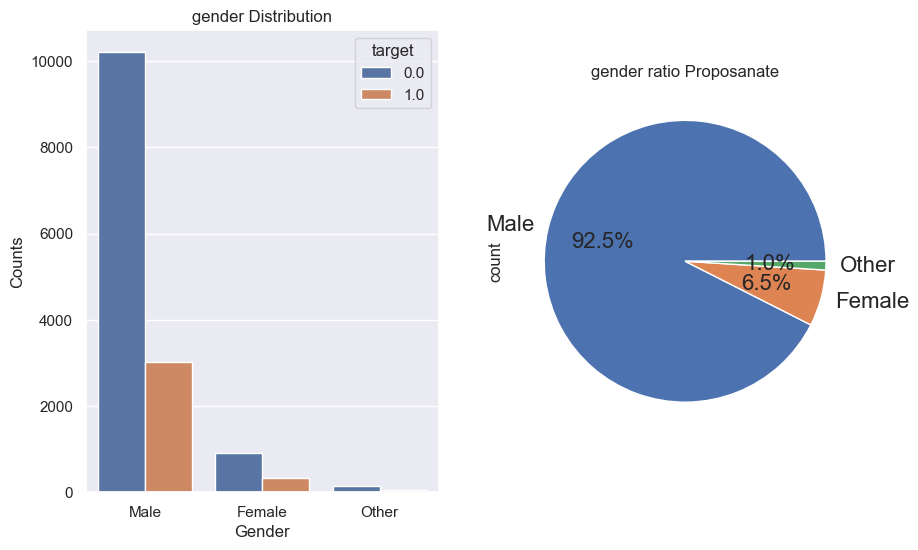

In [97]:
#  Distribution of "gender"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(x="gender", hue="target", data=data2)
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('gender Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['gender'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('gender ratio Proposanate')

In [98]:
data2["gender"]=""

gender
Male      17729
Female     1238
Other       191
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'gender ratio Proposanate')

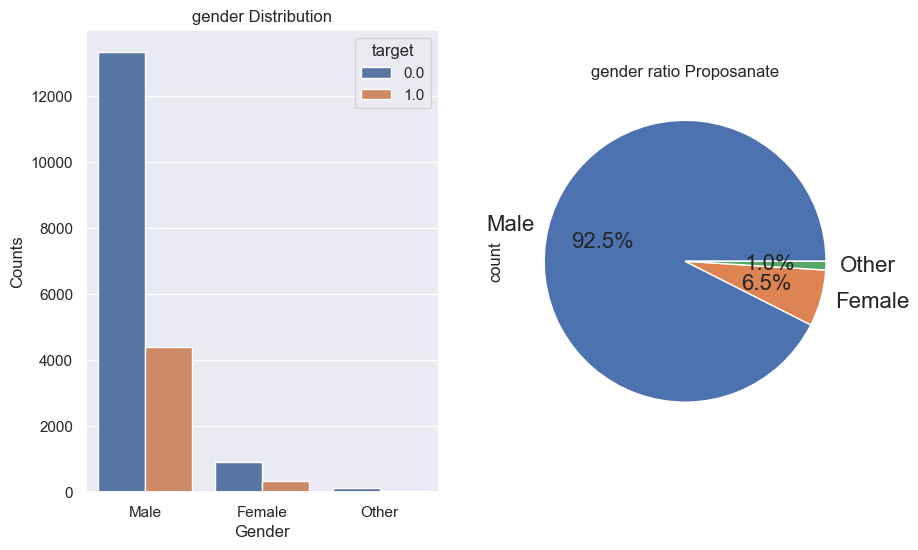

In [99]:
#  Distribution of "gender"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(x="gender", hue="target", data=data1)
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('gender Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['gender'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('gender ratio Proposanate')

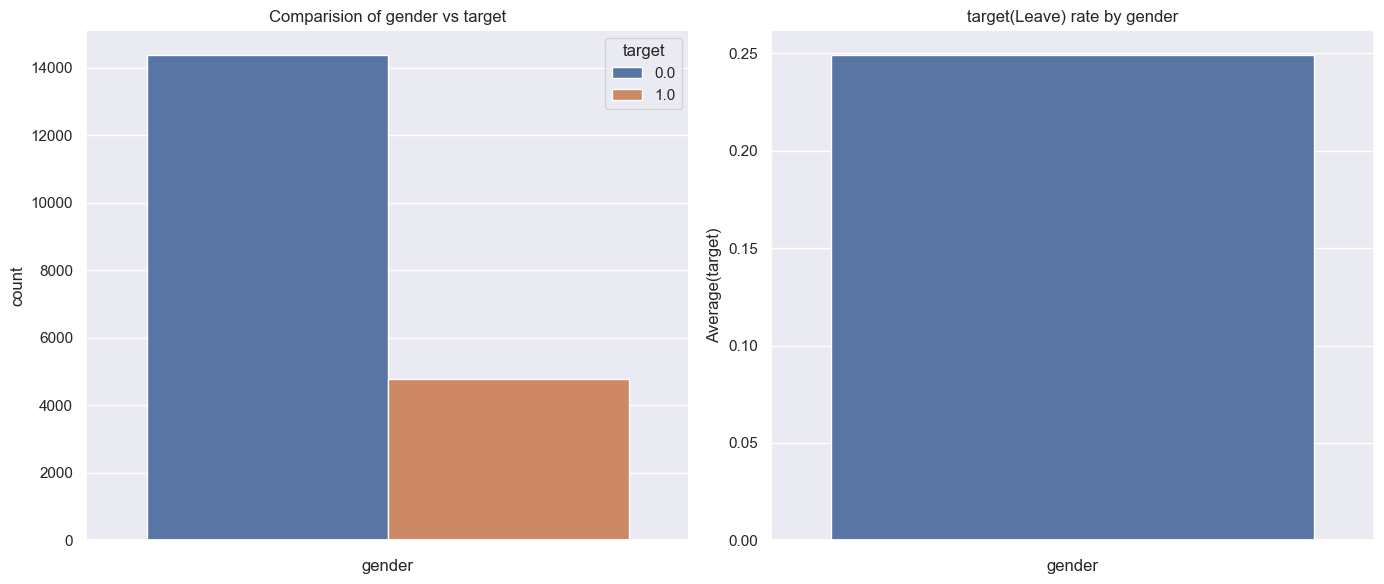

In [100]:
CategoricalVariables_targetPlots(data2,"gender")

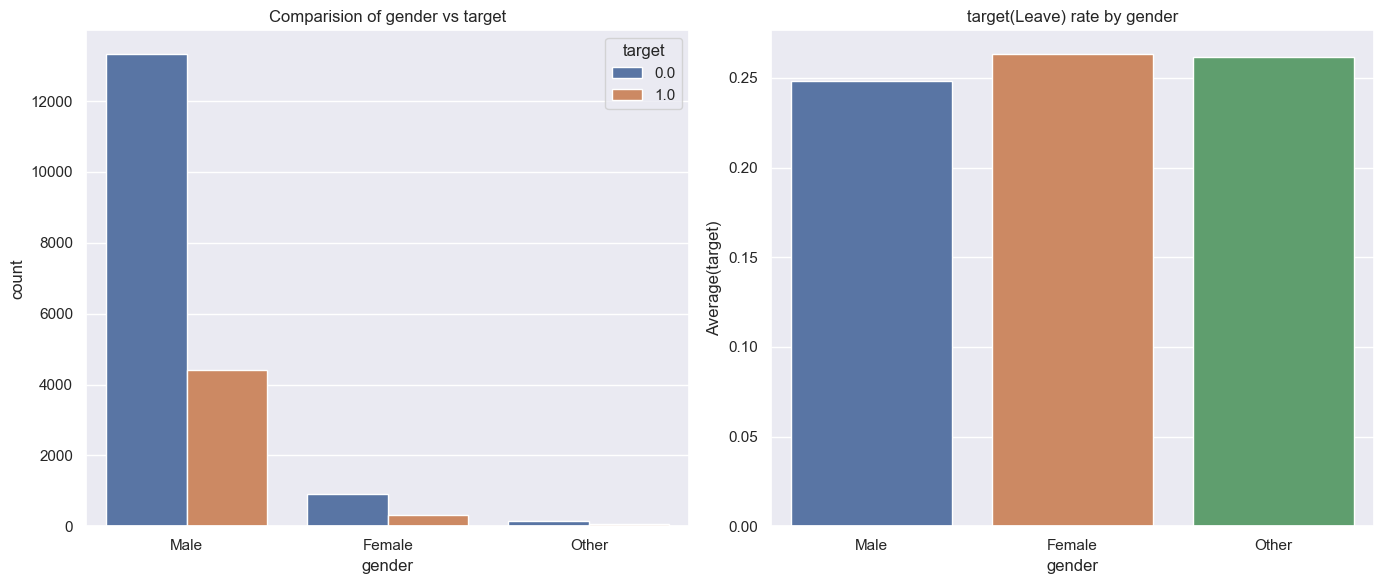

In [101]:
CategoricalVariables_targetPlots(data1,"gender")


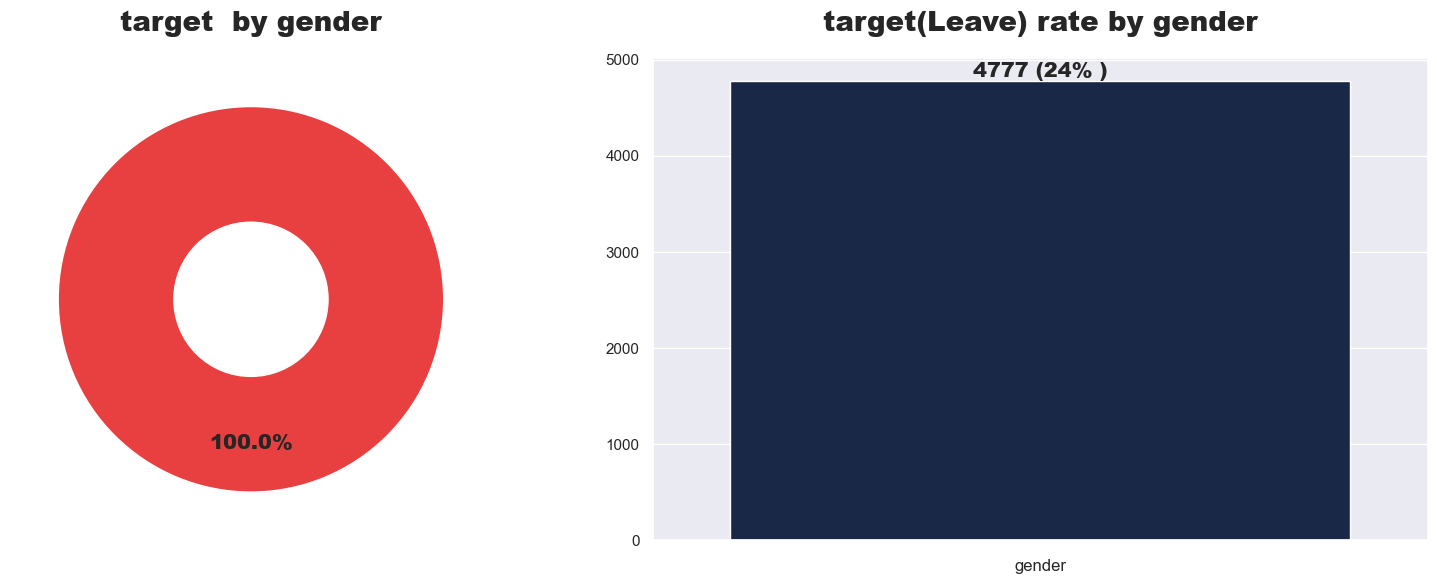

In [102]:
#Visualization to show TenYearCHD by gender.
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
value_1 = data2["gender"].value_counts()
plt.title("target  by gender", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show TenYearCHD Rate by sex education.
plt.subplot(1,2,2)
new_df = data2[data2["target"]==1]
value_2 = new_df["gender"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("target(Leave) rate by gender",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


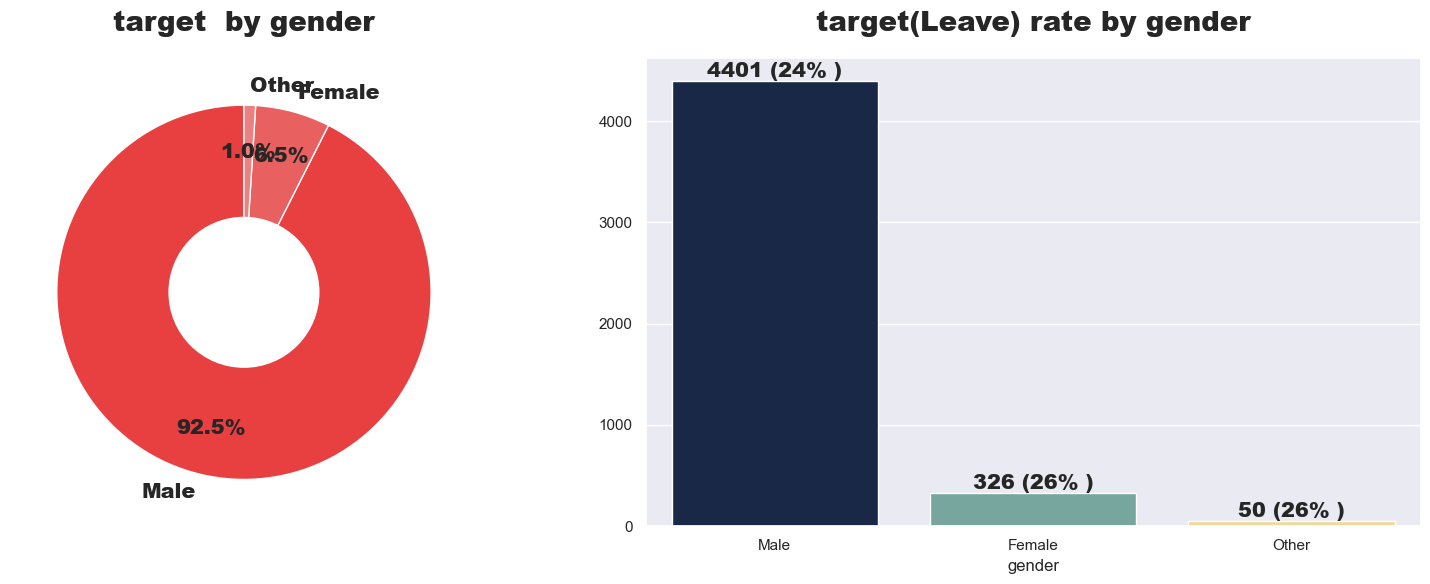

In [103]:
#Visualization to show TenYearCHD by gender.
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
value_1 = data1["gender"].value_counts()
plt.title("target  by gender", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show TenYearCHD Rate by sex education.
plt.subplot(1,2,2)
new_df = data1[data1["target"]==1]
value_2 = new_df["gender"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("target(Leave) rate by gender",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


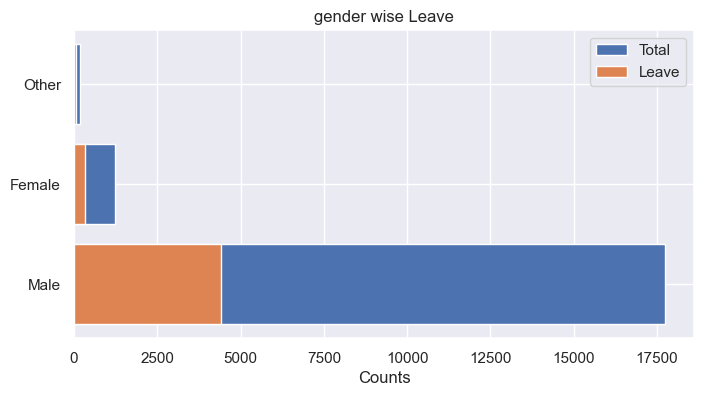

gender  Total_Count  % of Total  Leave   Stay  %Leave   %Stay
1    Male        17729    6.462052   4401  13328  24.824  75.176
0  Female         1238   92.540975    326    912  26.333  73.667
2   Other          191    0.996973     50    141  26.178  73.822

In [104]:
Univariate_Analysis1("gender")

target  gender  count  count_norm
0     0.0  Female    912    0.736672
1     0.0    Male  13328    0.751763
2     0.0   Other    141    0.738220
3     1.0  Female    326    0.263328
4     1.0    Male   4401    0.248237
5     1.0   Other     50    0.261780

<Axes: xlabel='gender'>

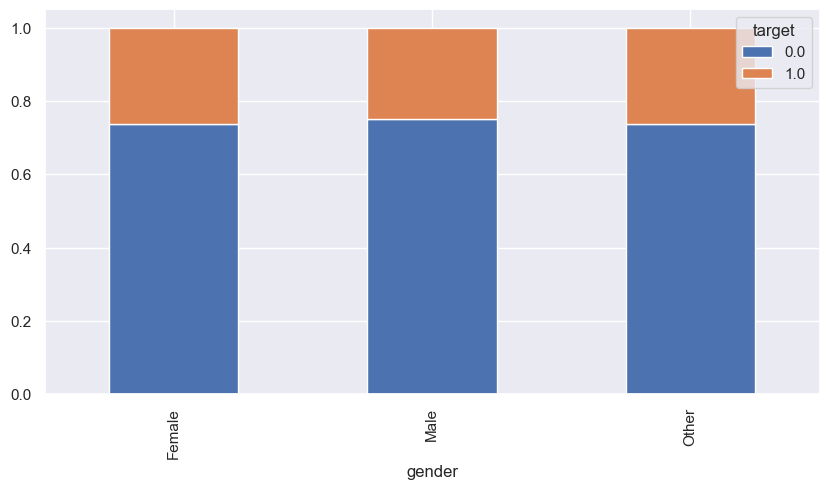

In [105]:
tmp = data1[["target", "gender"]]
tmp["count"] = 1
tmp = tmp.groupby(["target", "gender"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "gender==\""+row["gender"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="target", index="gender", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))

In [106]:
# Hypothesis testing on "gender" column
stat, p_val, dof = chi_sqred_ind_test(data2, "gender", "target", 0.05)

Contigency table: 
 target    0.0   1.0
gender             
        14381  4777
Statistic: 0.0
P-value: 1.0
DOF: 0
probability=0.950, critical=nan, stat=0.000
Independent (fail to reject Null Hypothesis(H0))
Independent (fail to reject Null Hypothesis(H0))


In [107]:
# Hypothesis testing on "gender" column
stat, p_val, dof = chi_sqred_ind_test(data1, "gender", "target", 0.05)

Contigency table: 
 target    0.0   1.0
gender             
Female    912   326
Male    13328  4401
Other     141    50
Statistic: 1.5672279776145268
P-value: 0.45675232710915714
DOF: 2
probability=0.950, critical=5.991, stat=1.567
Independent (fail to reject Null Hypothesis(H0))
Independent (fail to reject Null Hypothesis(H0))


## Visualizing  relevent_experience


In [108]:
data1["relevent_experience"].value_counts()

relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: count, dtype: int64

In [109]:
data1["relevent_experience"].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [110]:
data1["relevent_experience"].nunique()

2

relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: count, dtype: int64
Axes(0.59553,0.11;0.256667x0.77)


Text(0.5, 1.0, 'relevent_experience ratio Proposanate')

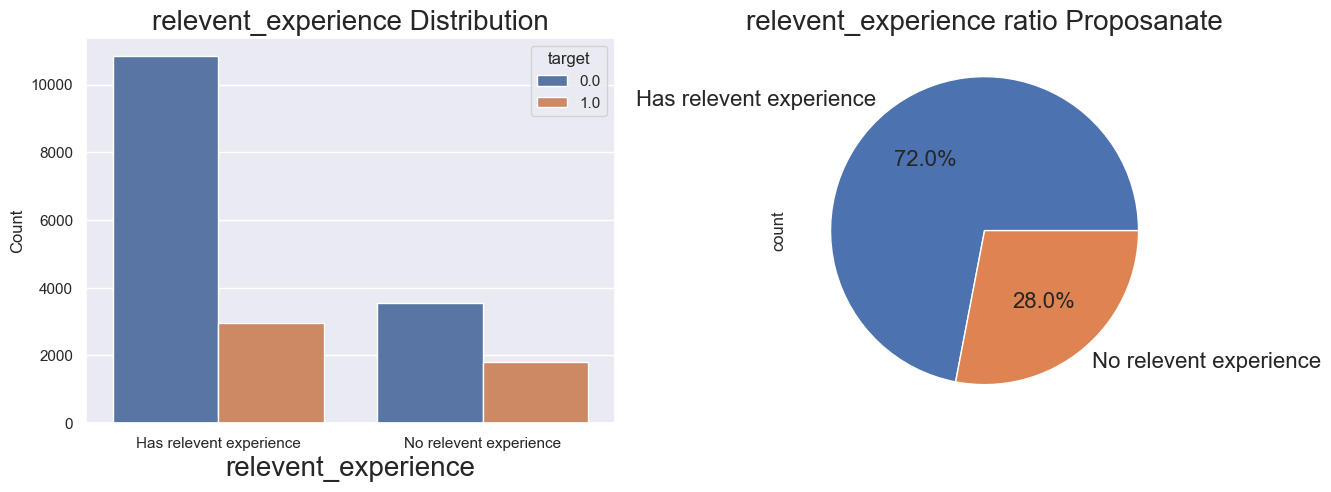

In [111]:
#  Distribution of "relevent_experience"
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
sns.countplot(x="relevent_experience", hue="target", data=data1)
plt.xlabel('relevent_experience', fontsize=20)
plt.ylabel('Count')
plt.title('relevent_experience Distribution', fontsize=20)
ax2=plt.subplot(1,2,2)
val_counts = data1['relevent_experience'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('relevent_experience ratio Proposanate', fontsize=20)

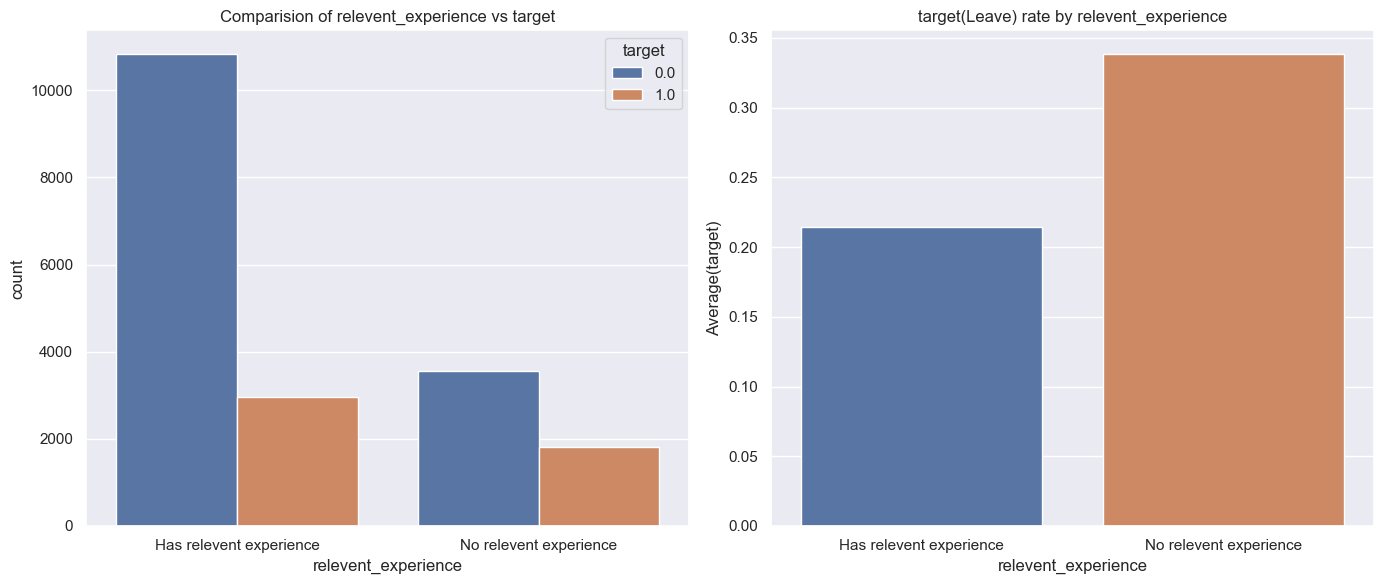

In [112]:
CategoricalVariables_targetPlots(data1,"relevent_experience")

Text(0.5, 1.0, 'relevent_experience Distrubution')

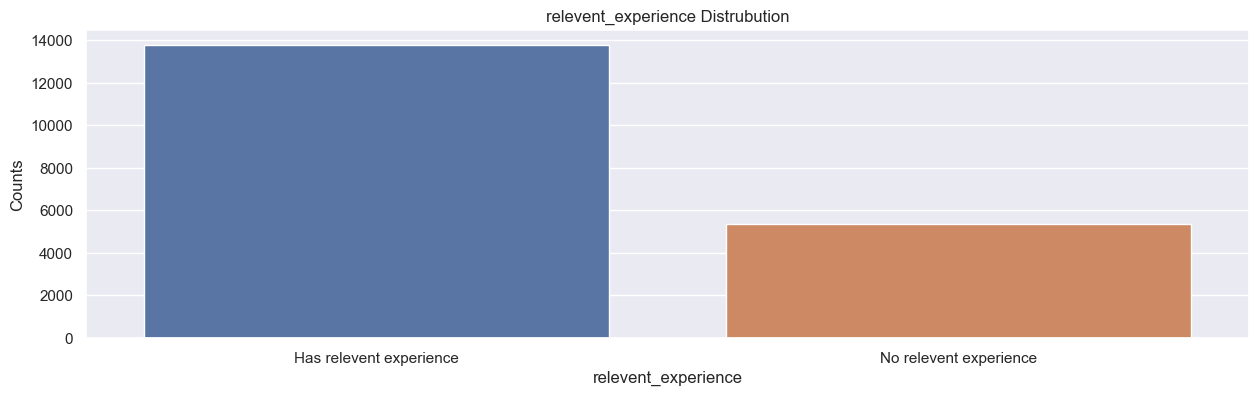

In [113]:
fig, ax = plt.subplots(figsize=(15,4))
age_dis=pd.DataFrame(data1.groupby(['relevent_experience'])['id'].count())
sns.barplot(x=age_dis.index,y=age_dis['id'], palette=sns.color_palette())
plt.ylabel('Counts')
plt.title('relevent_experience Distrubution')

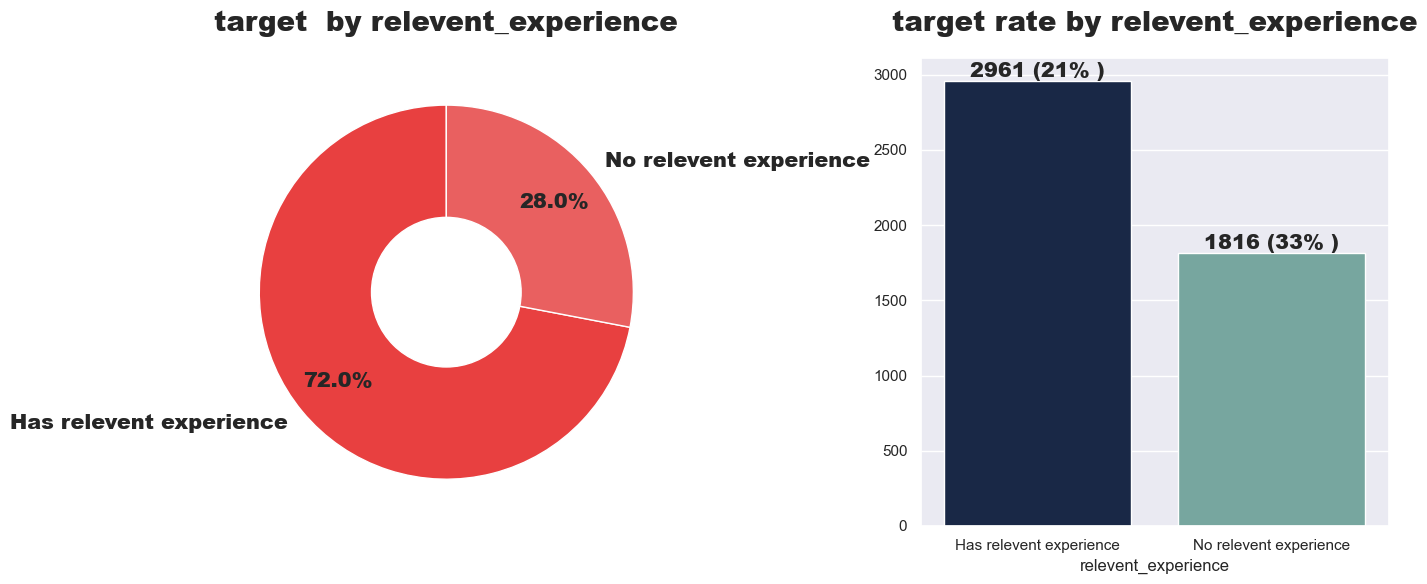

In [114]:
#Visualization to show TenYearCHD by relevent_experience.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["relevent_experience"].value_counts()
plt.title("target  by relevent_experience", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show TenYearCHD Rate by sex education.
plt.subplot(1,2,2)
new_df = data1[data1["target"]==1]
value_2 = new_df["relevent_experience"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("target rate by relevent_experience",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


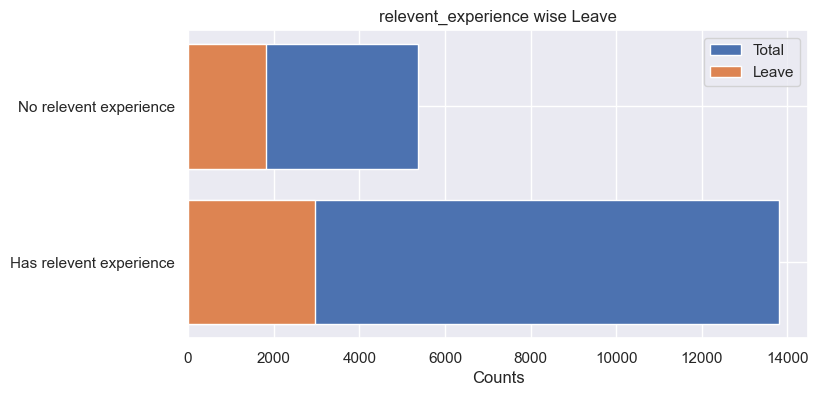

relevent_experience  Total_Count  % of Total  Leave   Stay  %Leave  \
0  Has relevent experience        13792   71.990813   2961  10831  21.469   
1   No relevent experience         5366   28.009187   1816   3550  33.843   

    %Stay  
0  78.531  
1  66.157

In [115]:
Univariate_Analysis1("relevent_experience")

target      relevent_experience  count  count_norm
0     0.0  Has relevent experience  10831    0.785310
1     0.0   No relevent experience   3550    0.661573
2     1.0  Has relevent experience   2961    0.214690
3     1.0   No relevent experience   1816    0.338427

<Axes: xlabel='relevent_experience'>

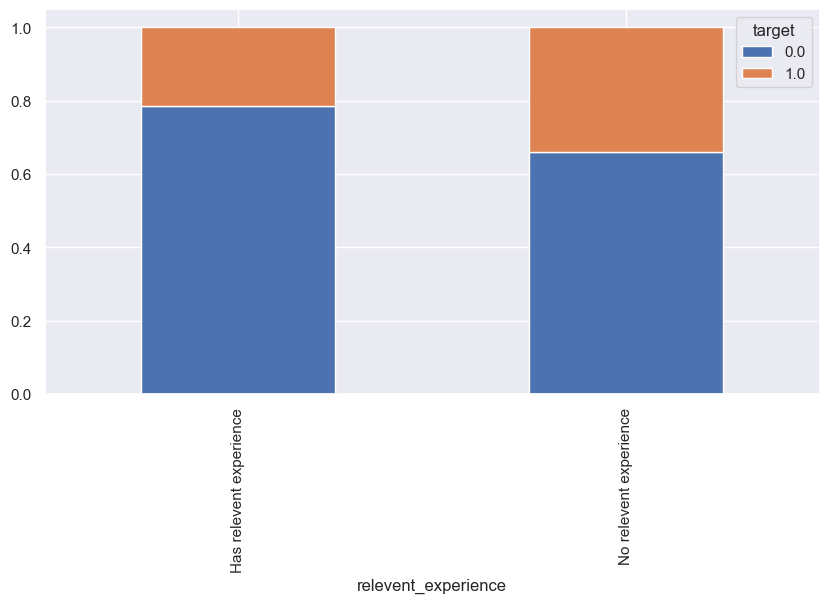

In [116]:
tmp = data1[["target", "relevent_experience"]]
tmp["count"] = 1
tmp = tmp.groupby(["target", "relevent_experience"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "relevent_experience==\""+row["relevent_experience"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="target", index="relevent_experience", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))

In [117]:
# Hypothesis testing on "relevent_experience" column
stat, p_val, dof = chi_sqred_ind_test(data1, "relevent_experience", "target", 0.05)

Contigency table: 
 target                     0.0   1.0
relevent_experience                 
Has relevent experience  10831  2961
No relevent experience    3550  1816
Statistic: 315.33857672021657
P-value: 1.5006628411178982e-70
DOF: 1
probability=0.950, critical=3.841, stat=315.339
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


## Visualizing  relevent_experience

In [118]:
data1["enrolled_university"].value_counts()

enrolled_university
no_enrollment       14203
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [119]:
data1["enrolled_university"].unique()

array(['no_enrollment', 'Full time course', 'Part time course'],
      dtype=object)

In [120]:
data1["enrolled_university"].nunique()

3

enrolled_university
no_enrollment       14203
Full time course     3757
Part time course     1198
Name: count, dtype: int64
Axes(0.59553,0.11;0.256667x0.77)


Text(0.5, 1.0, 'enrolled_university ratio Proposanate')

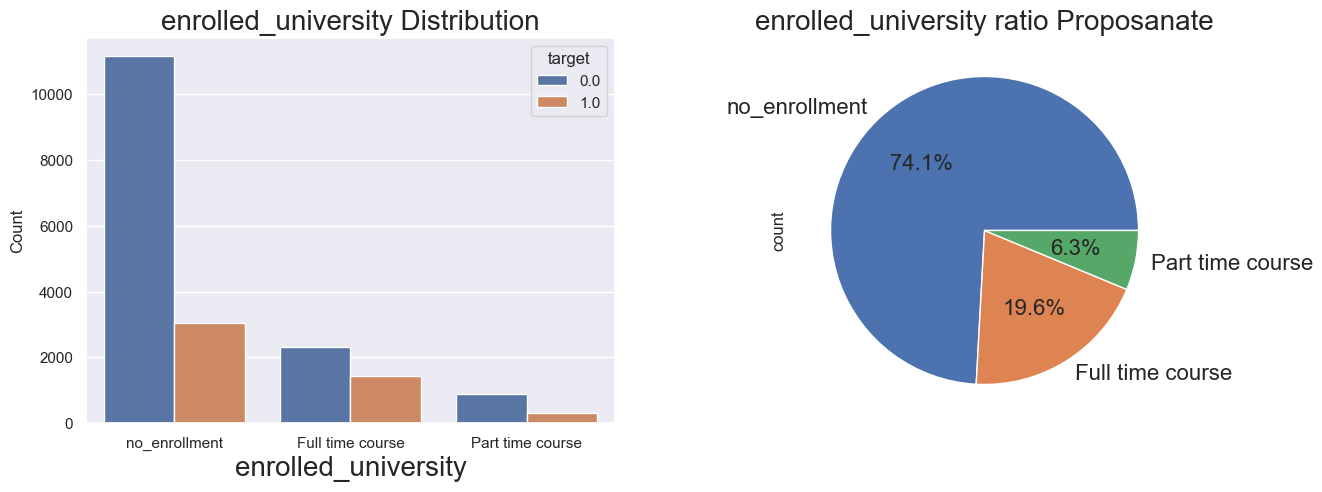

In [121]:
#  Distribution of "enrolled_university"
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
sns.countplot(x="enrolled_university", hue="target", data=data1)
plt.xlabel('enrolled_university', fontsize=20)
plt.ylabel('Count')
plt.title('enrolled_university Distribution', fontsize=20)
ax2=plt.subplot(1,2,2)
val_counts = data1['enrolled_university'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('enrolled_university ratio Proposanate', fontsize=20)

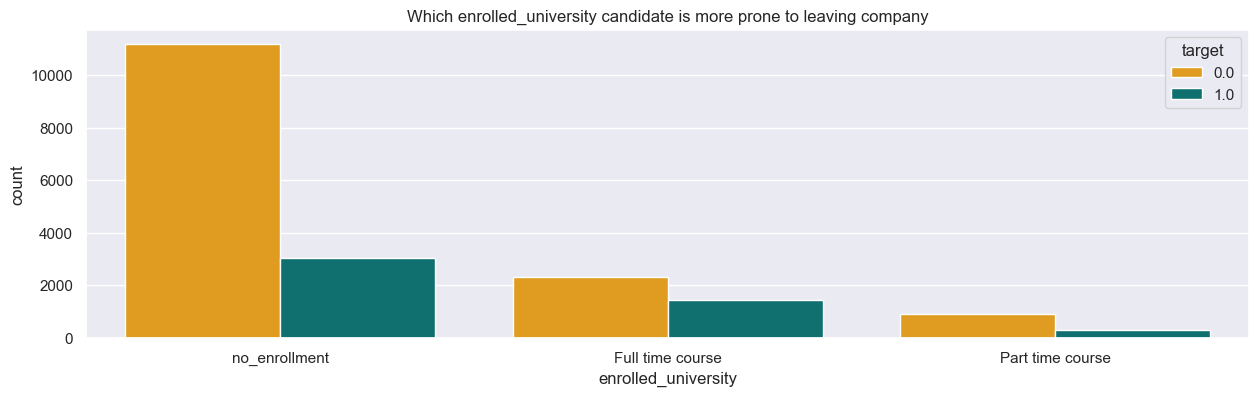

In [122]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (15,4))
sns.countplot(x = data1['enrolled_university'], hue = data1['target'], palette = my_palette)
plt.title("Which enrolled_university candidate is more prone to leaving company")
# plt.legend(['No Risk','At Risk'])
plt.show()

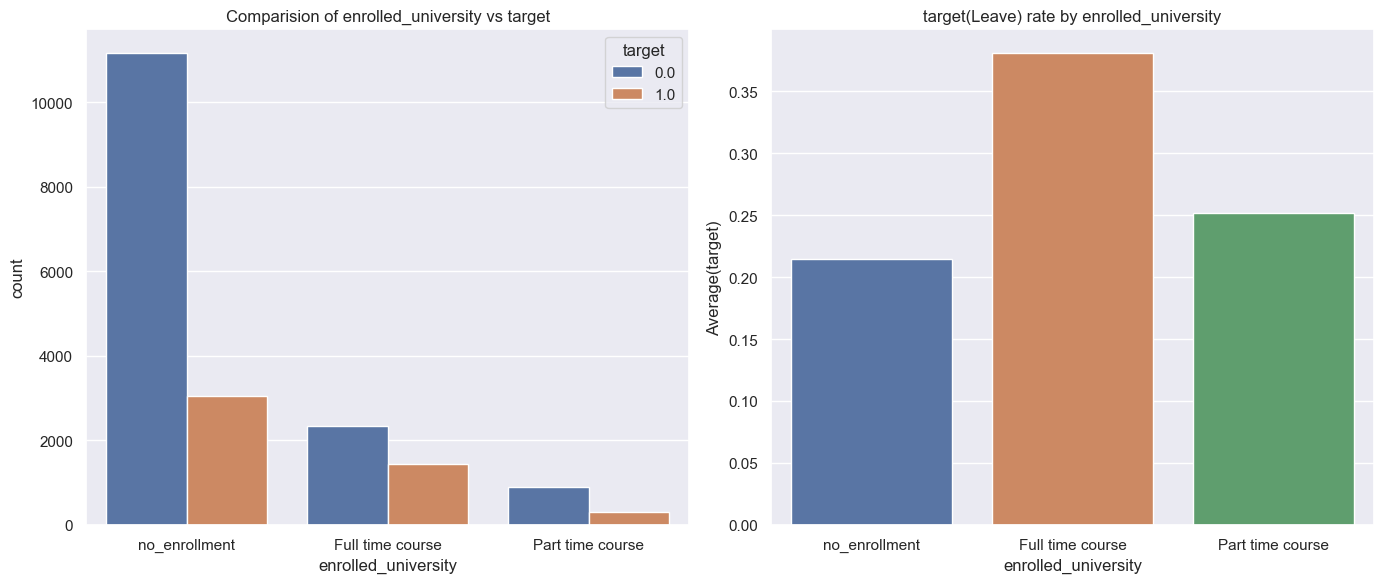

In [123]:
CategoricalVariables_targetPlots(data1,"enrolled_university")

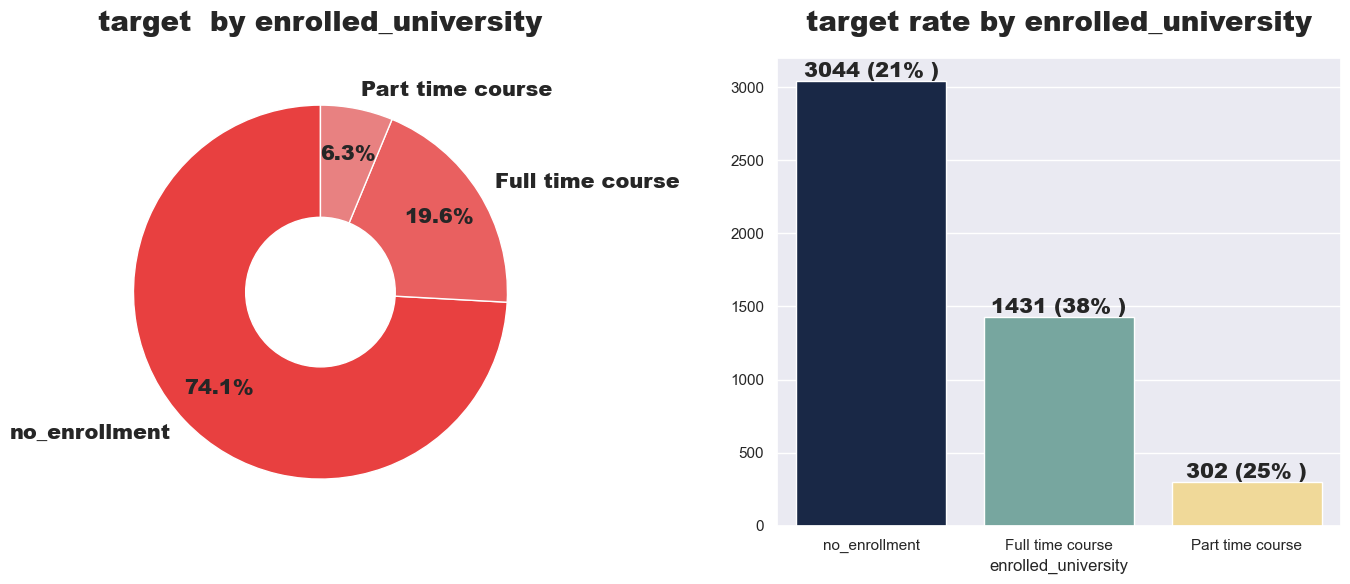

In [124]:
#Visualization to show target by enrolled_university.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["enrolled_university"].value_counts()
plt.title("target  by enrolled_university", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show target Rate by enrolled_university.
plt.subplot(1,2,2)
new_df = data1[data1["target"]==1]
value_2 = new_df["enrolled_university"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("target rate by enrolled_university",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


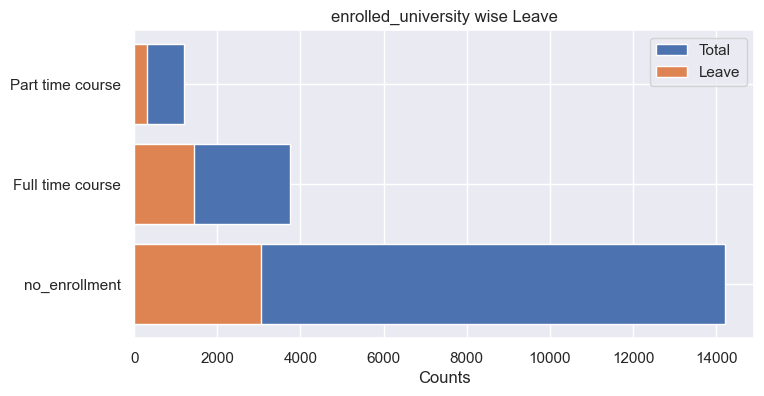

enrolled_university  Total_Count  % of Total  Leave   Stay  %Leave   %Stay
2       no_enrollment        14203    6.253262   3044  11159  21.432  78.568
0    Full time course         3757   74.136131   1431   2326  38.089  61.911
1    Part time course         1198   19.610607    302    896  25.209  74.791

In [125]:
Univariate_Analysis1("enrolled_university")

target enrolled_university  count  count_norm
0     0.0    Full time course   2326    0.619111
1     0.0    Part time course    896    0.747913
2     0.0       no_enrollment  11159    0.785679
3     1.0    Full time course   1431    0.380889
4     1.0    Part time course    302    0.252087
5     1.0       no_enrollment   3044    0.214321

<Axes: xlabel='enrolled_university'>

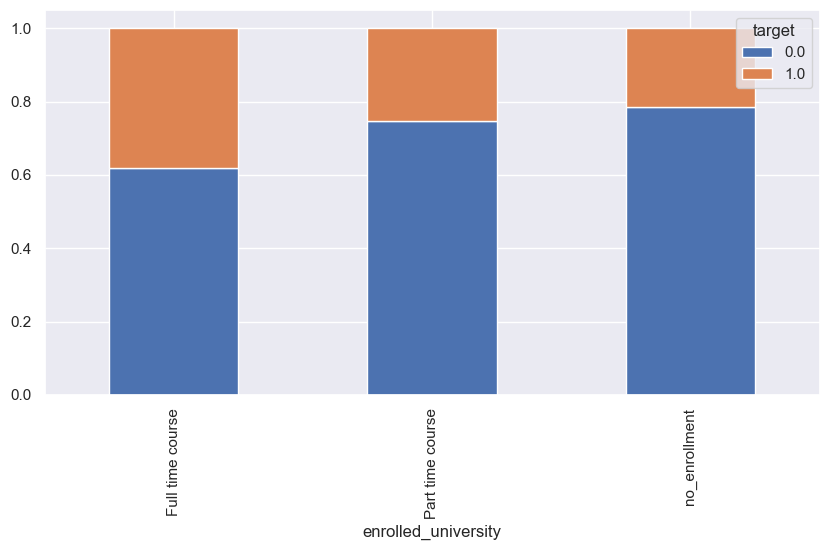

In [126]:
tmp = data1[["target", "enrolled_university"]]
tmp["count"] = 1
tmp = tmp.groupby(["target", "enrolled_university"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "enrolled_university==\""+row["enrolled_university"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="target", index="enrolled_university", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))

In [127]:
# Hypothesis testing on "enrolled_university" column
stat, p_val, dof = chi_sqred_ind_test(data1, "enrolled_university", "target", 0.05)

Contigency table: 
 target                 0.0   1.0
enrolled_university             
Full time course      2326  1431
Part time course       896   302
no_enrollment        11159  3044
Statistic: 440.4585892292313
P-value: 2.267945402973493e-96
DOF: 2
probability=0.950, critical=5.991, stat=440.459
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


## Visualizing  education_level


In [128]:
data1["education_level"].value_counts()

education_level
Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [129]:
data1["education_level"].unique()


array(['Graduate', 'Masters', 'High School', 'Phd', 'Primary School'],
      dtype=object)

In [130]:
data1["education_level"].nunique()


5

education_level
Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64
Axes(0.59553,0.11;0.256667x0.77)


Text(0.5, 1.0, 'education_level ratio Proposanate')

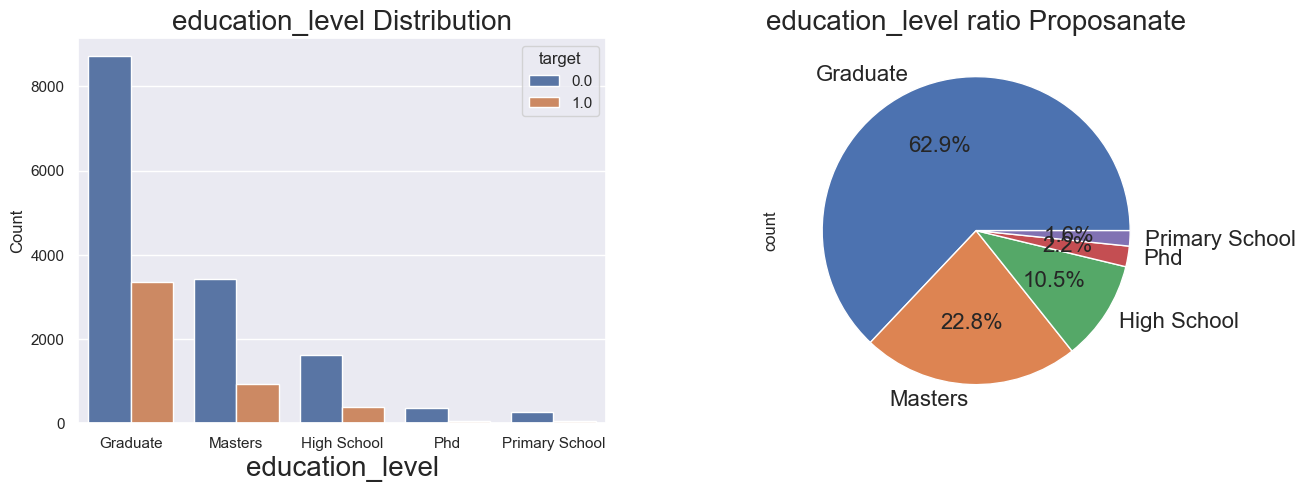

In [131]:
#  Distribution of "education_level"
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
sns.countplot(x="education_level", hue="target", data=data1)
plt.xlabel('education_level', fontsize=20)
plt.ylabel('Count')
plt.title('education_level Distribution', fontsize=20)
ax2=plt.subplot(1,2,2)
val_counts = data1['education_level'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('education_level ratio Proposanate', fontsize=20)

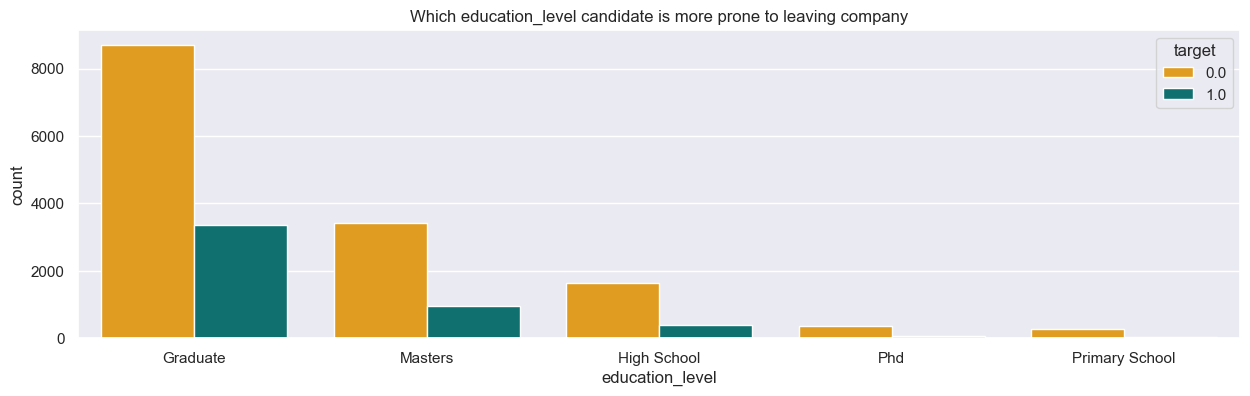

In [132]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (15,4))
sns.countplot(x = data1['education_level'], hue = data1['target'], palette = my_palette)
plt.title("Which education_level candidate is more prone to leaving company")
# plt.legend(['No Risk','At Risk'])
plt.show()

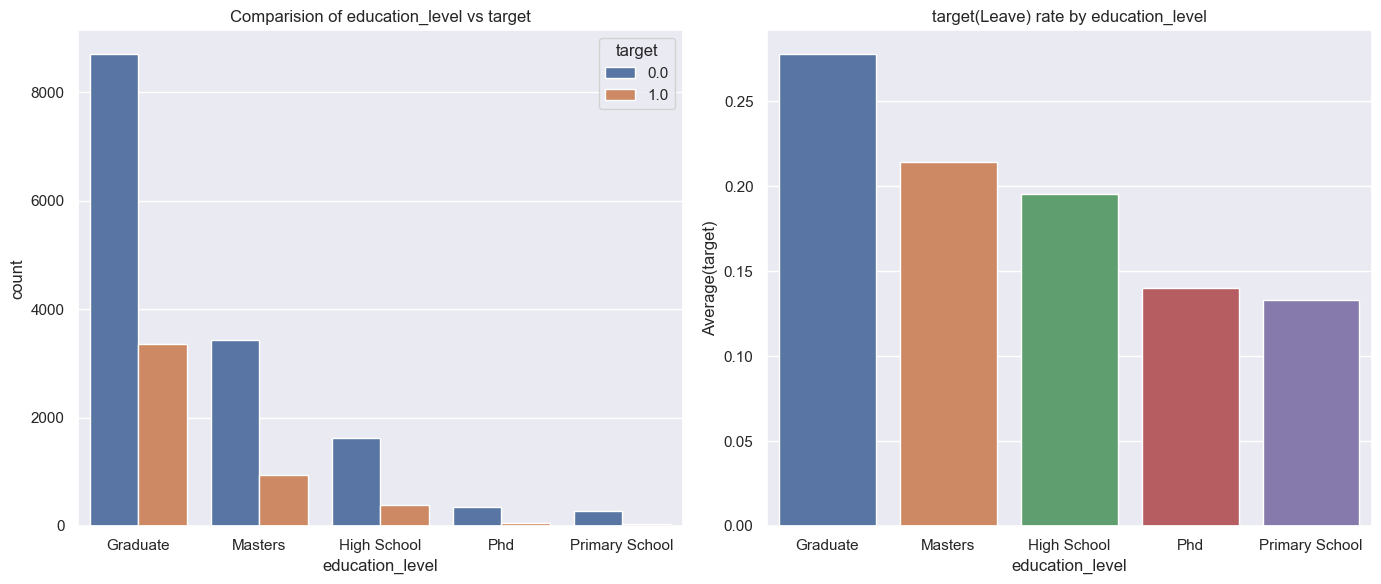

In [133]:
CategoricalVariables_targetPlots(data1,"education_level")

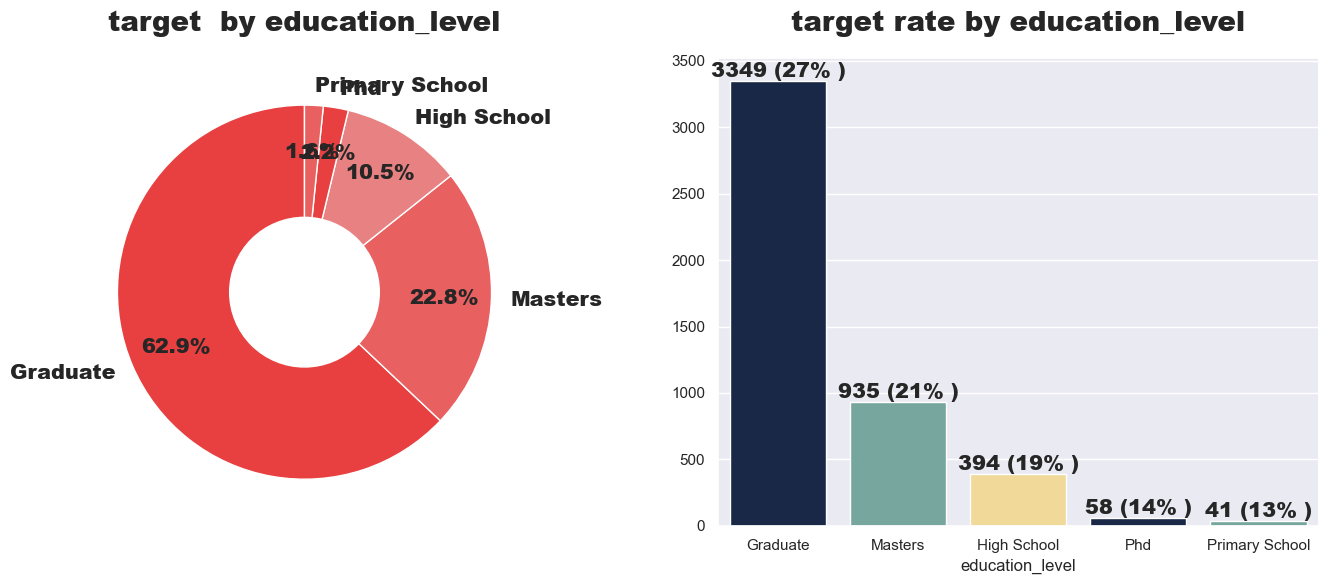

In [134]:
#Visualization to show target by education_level.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["education_level"].value_counts()
plt.title("target  by education_level", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show target Rate by education_level.
plt.subplot(1,2,2)
new_df = data1[data1["target"]==1]
value_2 = new_df["education_level"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("target rate by education_level",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


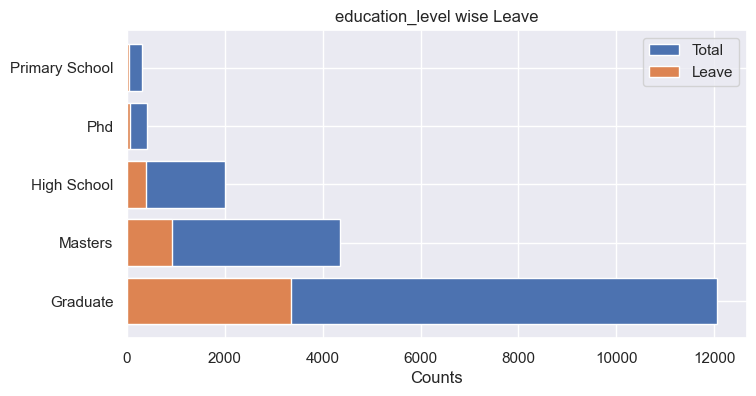

education_level  Total_Count  % of Total  Leave  Stay  %Leave   %Stay
0        Graduate        12058   62.939764   3349  8709  27.774  72.226
2         Masters         4361   10.528239    935  3426  21.440  78.560
1     High School         2017   22.763336    394  1623  19.534  80.466
3             Phd          414    2.160977     58   356  14.010  85.990
4  Primary School          308    1.607683     41   267  13.312  86.688

In [135]:
Univariate_Analysis1("education_level")

target education_level  count  count_norm
0     0.0        Graduate   8709    0.722259
1     0.0     High School   1623    0.804660
2     0.0         Masters   3426    0.785600
3     0.0             Phd    356    0.859903
4     0.0  Primary School    267    0.866883
5     1.0        Graduate   3349    0.277741
6     1.0     High School    394    0.195340
7     1.0         Masters    935    0.214400
8     1.0             Phd     58    0.140097
9     1.0  Primary School     41    0.133117

<Axes: xlabel='education_level'>

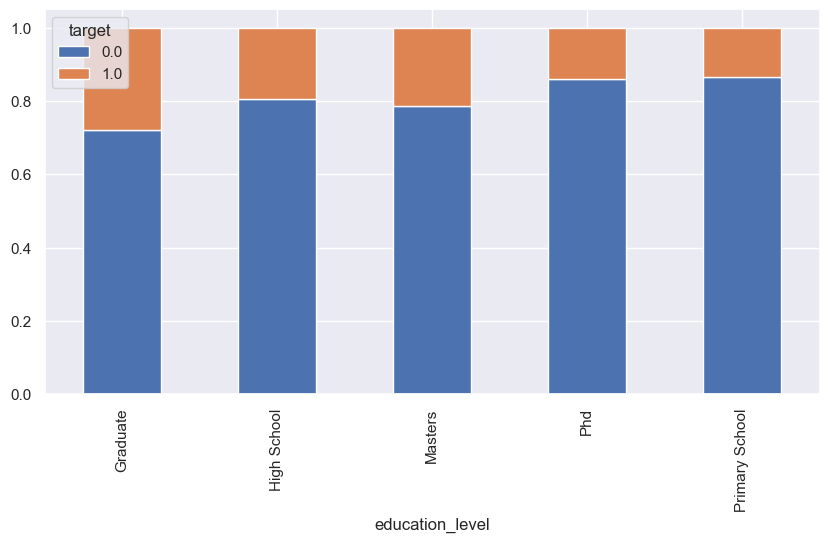

In [136]:
tmp = data1[["target", "education_level"]]
tmp["count"] = 1
tmp = tmp.groupby(["target", "education_level"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "education_level==\""+row["education_level"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="target", index="education_level", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))

In [137]:
# Hypothesis testing on "education_level" column
stat, p_val, dof = chi_sqred_ind_test(data1, "education_level", "target", 0.05)

Contigency table: 
 target            0.0   1.0
education_level            
Graduate         8709  3349
High School      1623   394
Masters          3426   935
Phd               356    58
Primary School    267    41
Statistic: 160.45409183708534
P-value: 1.1682541089603992e-33
DOF: 4
probability=0.950, critical=9.488, stat=160.454
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


## Visualizing  major_discipline


In [138]:
data1["major_discipline"].value_counts()


major_discipline
STEM               17305
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64

In [139]:
data["major_discipline"].value_counts()


major_discipline
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64

In [140]:
data1["major_discipline"].unique()


array(['STEM', 'Business Degree', 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [141]:
data1["major_discipline"].nunique()


6

major_discipline
STEM               17305
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64
Axes(0.59553,0.11;0.256667x0.77)


Text(0.5, 1.0, 'major_discipline ratio Proposanate')

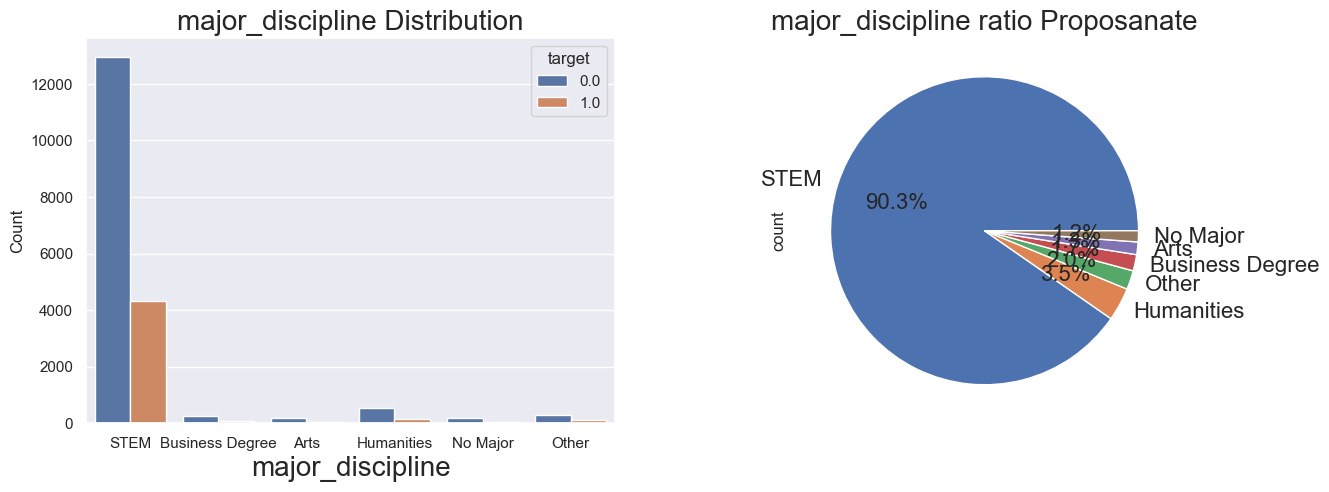

In [142]:
#  Distribution of "major_discipline"
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
sns.countplot(x="major_discipline", hue="target", data=data1)
plt.xlabel('major_discipline', fontsize=20)
plt.ylabel('Count')
plt.title('major_discipline Distribution', fontsize=20)
ax2=plt.subplot(1,2,2)
val_counts = data1['major_discipline'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('major_discipline ratio Proposanate', fontsize=20)

major_discipline
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64
Axes(0.59553,0.11;0.256667x0.77)


Text(0.5, 1.0, 'major_discipline ratio Proposanate')

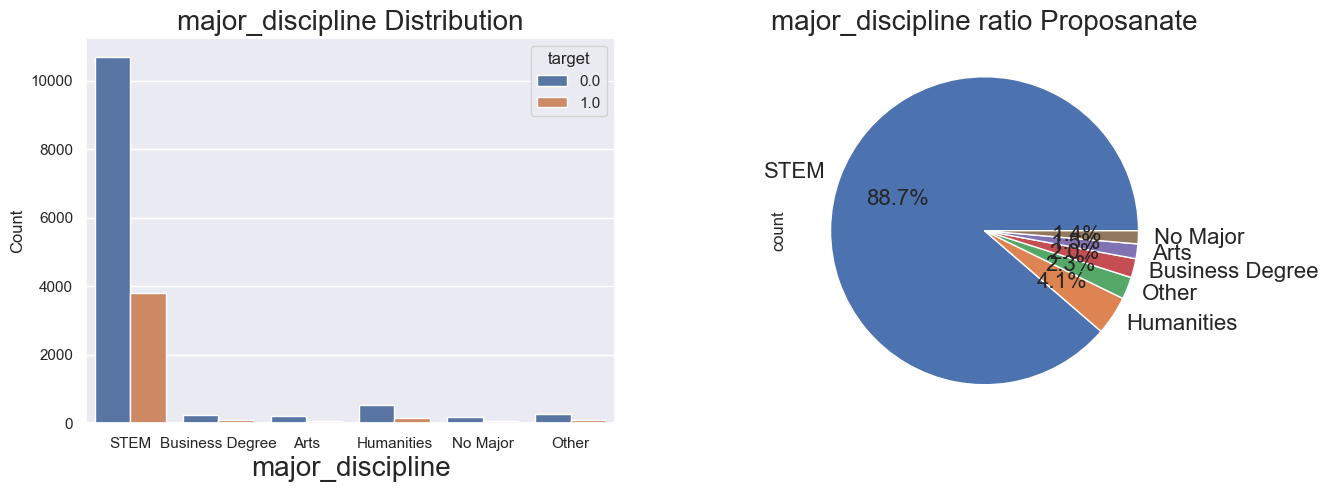

In [143]:
#  Distribution of "major_discipline"
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
sns.countplot(x="major_discipline", hue="target", data=data)
plt.xlabel('major_discipline', fontsize=20)
plt.ylabel('Count')
plt.title('major_discipline Distribution', fontsize=20)
ax2=plt.subplot(1,2,2)
val_counts = data['major_discipline'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('major_discipline ratio Proposanate', fontsize=20)

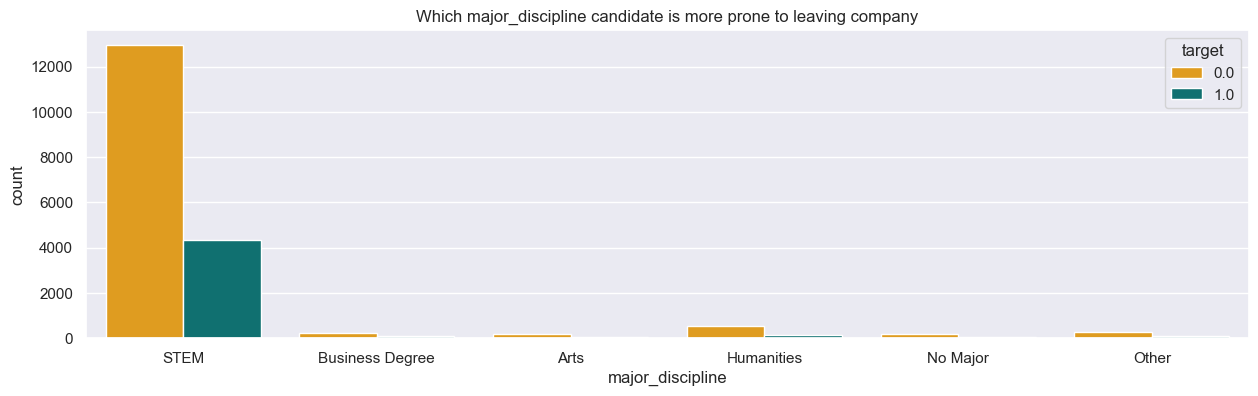

In [144]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (15,4))
sns.countplot(x = data1['major_discipline'], hue = data1['target'], palette = my_palette)
plt.title("Which major_discipline candidate is more prone to leaving company")
# plt.legend(['No Risk','At Risk'])
plt.show()

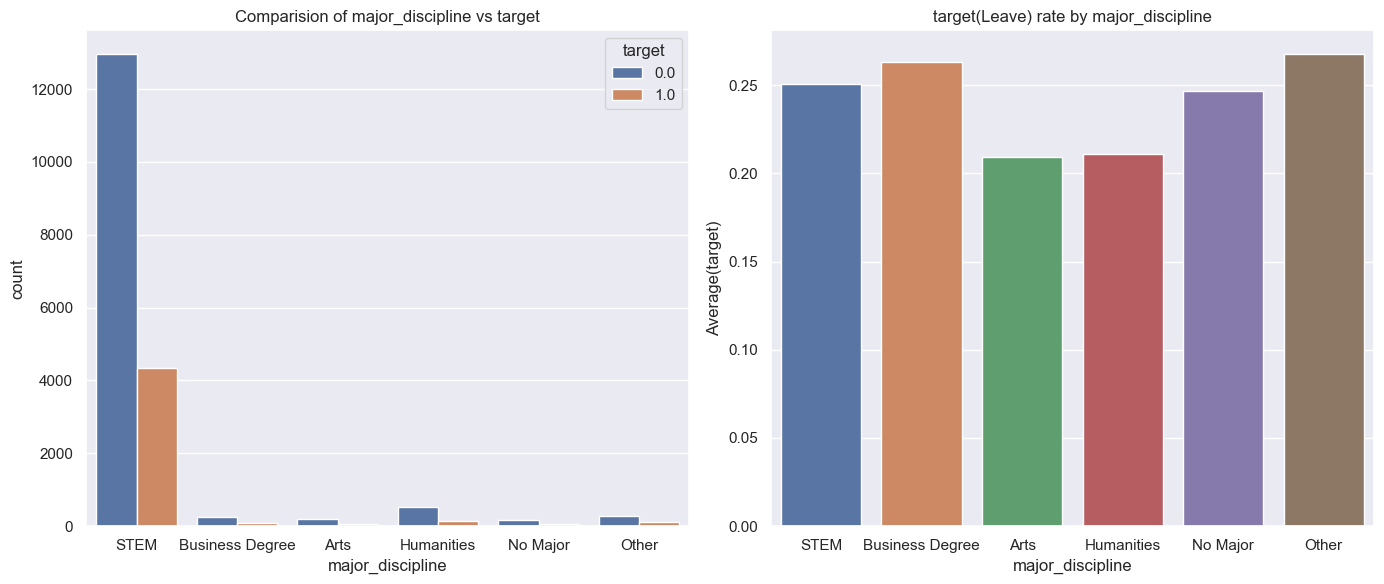

In [145]:
CategoricalVariables_targetPlots(data1,"major_discipline")

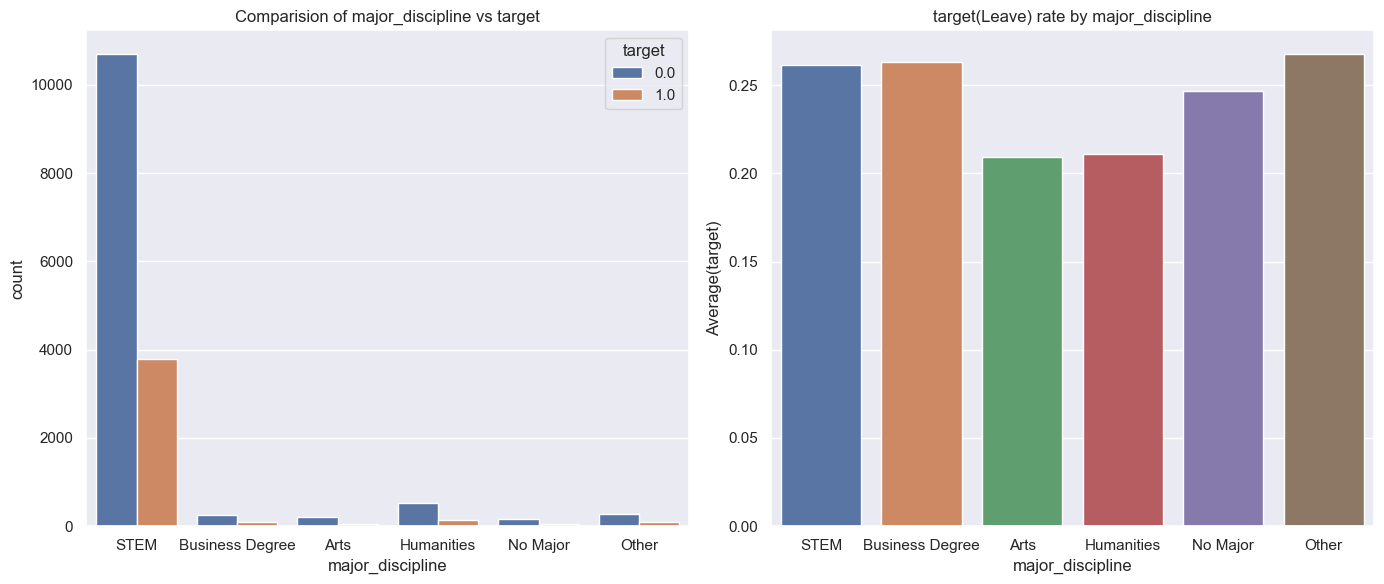

In [146]:
CategoricalVariables_targetPlots(data,"major_discipline")

In [1]:
#Visualization to show target by major_discipline.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["major_discipline"].value_counts()
plt.title("target  by major_discipline", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)


#Visualization to show target Rate by major_discipline.
plt.subplot(1,2,2)
new_df = data1[data1["target"]==1]
value_2 = new_df["major_discipline"].value_counts()
# acceptance_rate = np.floor((value_2/value_1)*100).values
acceptance_rate = [25, 21, 26, 26, 24, 20]
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("target rate by major_discipline",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

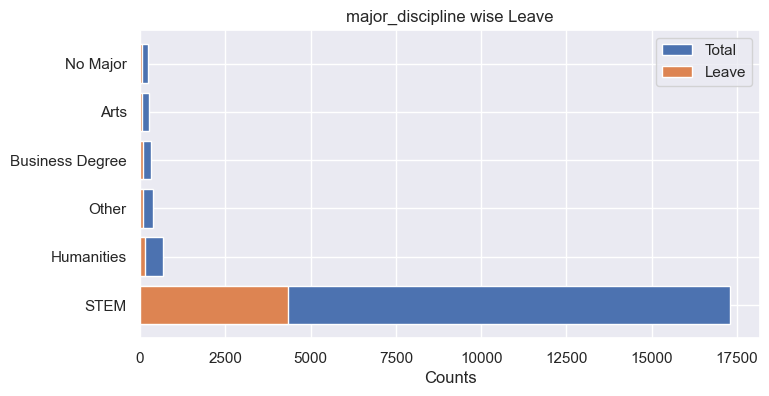

major_discipline  Total_Count  % of Total  Leave   Stay  %Leave   %Stay
5             STEM        17305    1.164005   4340  12965  25.079  74.921
2       Humanities          669    1.988725    141    528  21.076  78.924
4            Other          381    1.320597    102    279  26.772  73.228
1  Business Degree          327    3.492014     86    241  26.300  73.700
0             Arts          253   90.327800     53    200  20.949  79.051
3         No Major          223    1.706859     55    168  24.664  75.336

In [148]:
Univariate_Analysis1("major_discipline")

target major_discipline  count  count_norm
0      0.0             Arts    200    0.790514
1      0.0  Business Degree    241    0.737003
2      0.0       Humanities    528    0.789238
3      0.0         No Major    168    0.753363
4      0.0            Other    279    0.732283
5      0.0             STEM  12965    0.749205
6      1.0             Arts     53    0.209486
7      1.0  Business Degree     86    0.262997
8      1.0       Humanities    141    0.210762
9      1.0         No Major     55    0.246637
10     1.0            Other    102    0.267717
11     1.0             STEM   4340    0.250795

<Axes: xlabel='major_discipline'>

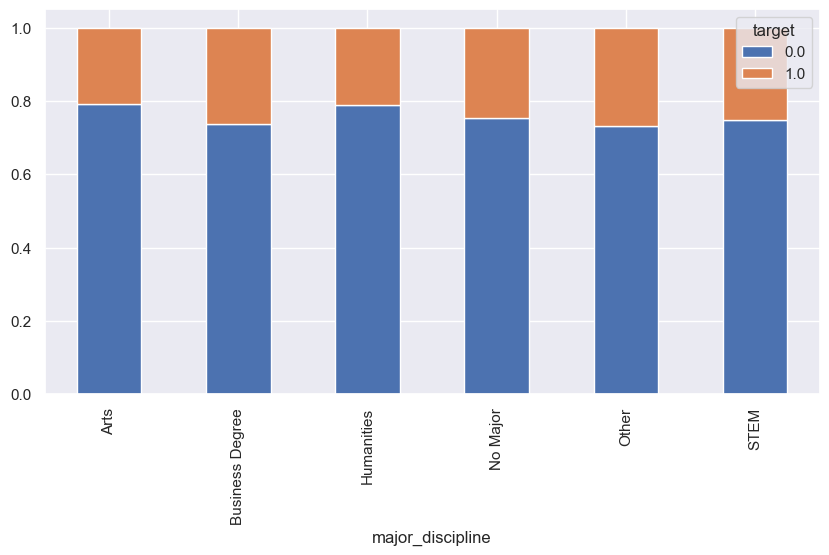

In [149]:
tmp = data1[["target", "major_discipline"]]
tmp["count"] = 1
tmp = tmp.groupby(["target", "major_discipline"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "major_discipline==\""+row["major_discipline"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="target", index="major_discipline", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))

In [150]:
# Hypothesis testing on "major_discipline" column
stat, p_val, dof = chi_sqred_ind_test(data1, "major_discipline", "target", 0.05)

Contigency table: 
 target              0.0   1.0
major_discipline             
Arts                200    53
Business Degree     241    86
Humanities          528   141
No Major            168    55
Other               279   102
STEM              12965  4340
Statistic: 8.683774499397439
P-value: 0.12236179432062115
DOF: 5
probability=0.950, critical=11.070, stat=8.684
Independent (fail to reject Null Hypothesis(H0))
Independent (fail to reject Null Hypothesis(H0))


In [151]:
# Hypothesis testing on "major_discipline" column
stat, p_val, dof = chi_sqred_ind_test(data, "major_discipline", "target", 0.05)

Contigency table: 
 target              0.0   1.0
major_discipline             
Arts                200    53
Business Degree     241    86
Humanities          528   141
No Major            168    55
Other               279   102
STEM              10701  3791
Statistic: 12.207121063439176
P-value: 0.032057358001303195
DOF: 5
probability=0.950, critical=11.070, stat=12.207
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


## Visualizing  major_discipline


In [152]:
data1["experience"].value_counts()


experience
21.000000    3286
5.000000     1430
4.000000     1403
3.000000     1354
6.000000     1216
2.000000     1127
7.000000     1028
10.000000     985
9.000000      980
8.000000      802
15.000000     686
11.000000     664
14.000000     586
1.000000      549
0.000000      522
16.000000     508
12.000000     494
13.000000     399
17.000000     342
19.000000     304
18.000000     280
20.000000     148
10.100141      65
Name: count, dtype: int64

In [153]:
data["experience"].value_counts()


experience
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: count, dtype: int64

In [154]:
data1["experience"].unique()


array([21.        , 15.        ,  5.        ,  0.        , 11.        ,
       13.        ,  7.        , 17.        ,  2.        , 16.        ,
        1.        ,  4.        , 10.        , 14.        , 18.        ,
       19.        , 12.        ,  3.        ,  6.        ,  9.        ,
        8.        , 20.        , 10.10014141])

In [155]:
data1["experience"].nunique()


23

experience
21.000000    3286
5.000000     1430
4.000000     1403
3.000000     1354
6.000000     1216
2.000000     1127
7.000000     1028
10.000000     985
9.000000      980
8.000000      802
15.000000     686
11.000000     664
14.000000     586
1.000000      549
0.000000      522
16.000000     508
12.000000     494
13.000000     399
17.000000     342
19.000000     304
18.000000     280
20.000000     148
10.100141      65
Name: count, dtype: int64
Axes(0.59553,0.11;0.256667x0.77)


Text(0.5, 1.0, 'experience ratio Proposanate')

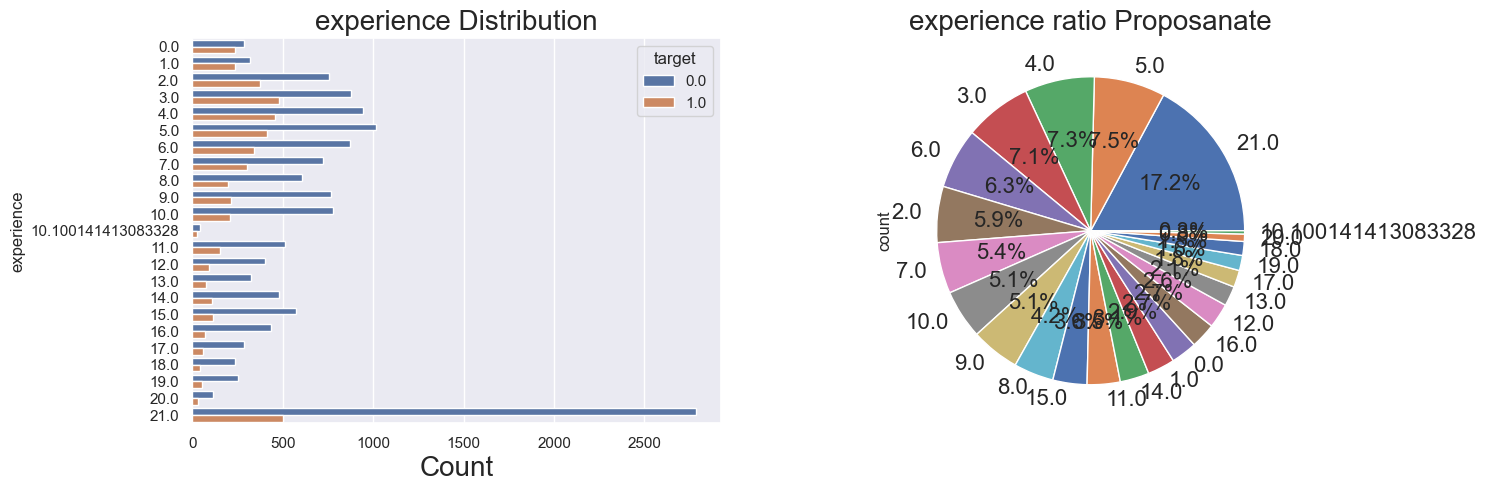

In [156]:
#  Distribution of "experience"
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
sns.countplot(y="experience", hue="target", data=data1)
plt.xlabel('Count', fontsize=20)
plt.ylabel('experience')
plt.title('experience Distribution', fontsize=20)
ax2=plt.subplot(1,2,2)
val_counts = data1['experience'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('experience ratio Proposanate', fontsize=20)



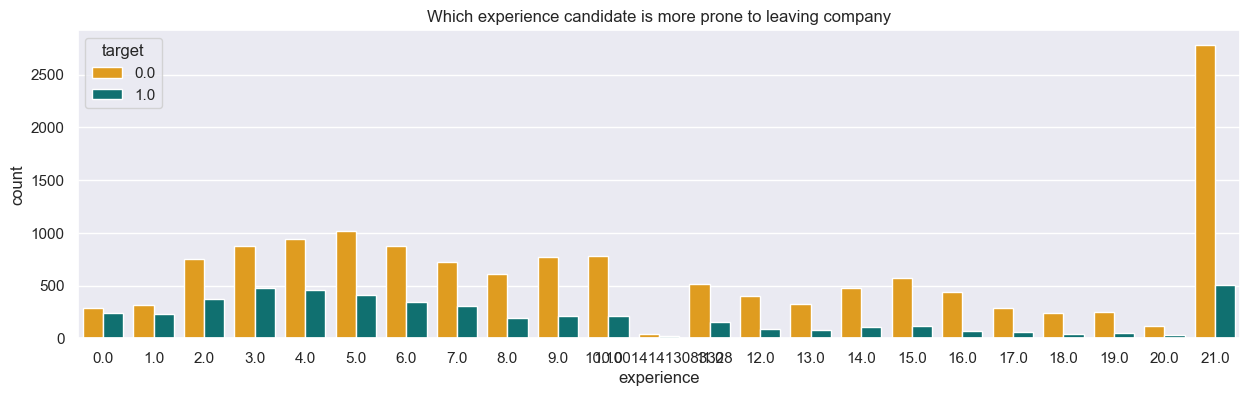

In [157]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (15,4))
sns.countplot(x = data1['experience'], hue = data1['target'], palette = my_palette)
plt.title("Which experience candidate is more prone to leaving company")
# plt.legend(['No Risk','At Risk'])
plt.show()



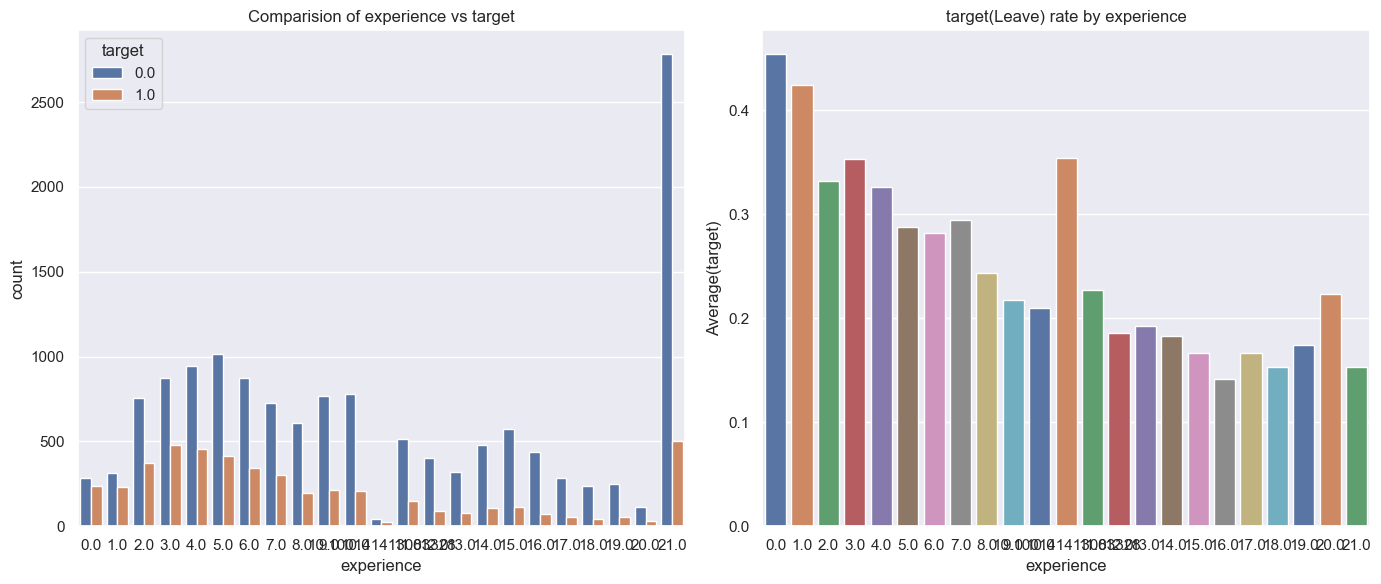

In [158]:
CategoricalVariables_targetPlots(data1,"experience")

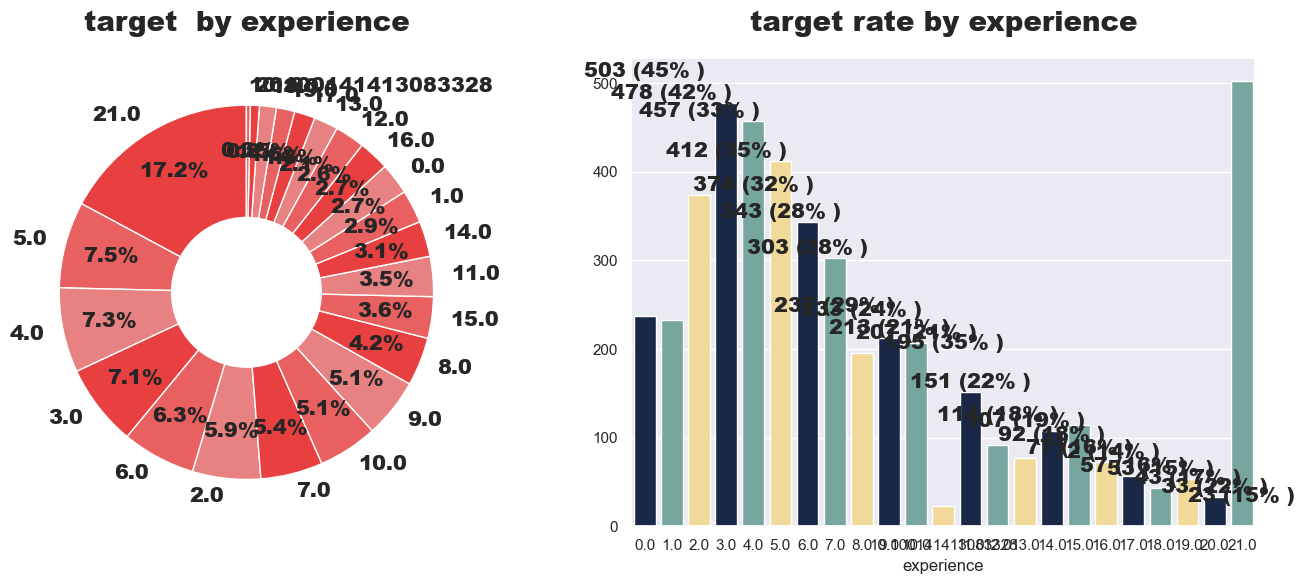

In [159]:
#Visualization to show target by experience.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["experience"].value_counts()
plt.title("target  by experience", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show target Rate by education_level.
plt.subplot(1,2,2)
new_df = data1[data1["target"]==1]
value_2 = new_df["experience"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("target rate by experience",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

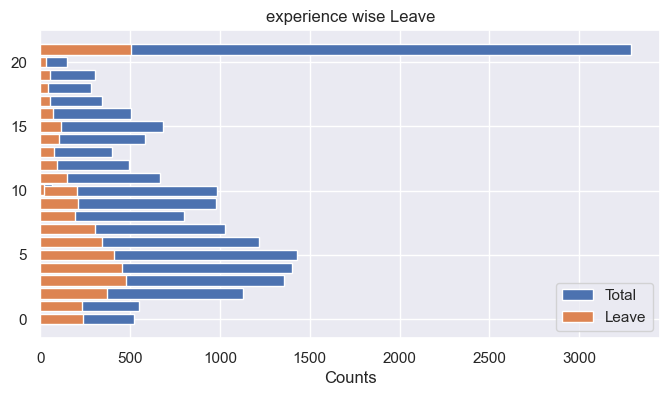

experience  Total_Count  % of Total  Leave  Stay  %Leave   %Stay
22   21.000000         3286    0.339284    503  2783  15.307  84.693
5     5.000000         1430    5.882660    412  1018  28.811  71.189
4     4.000000         1403    6.347218    457   946  32.573  67.427
3     3.000000         1354    7.067544    478   876  35.303  64.697
6     6.000000         1216    5.365905    343   873  28.207  71.793
2     2.000000         1127    7.323311    374   753  33.185  66.815
7     7.000000         1028    5.141455    303   725  29.475  70.525
10   10.000000          985    3.580750    207   778  21.015  78.985
9     9.000000          980    4.186241    213   767  21.735  78.265
8     8.000000          802    5.115357    195   607  24.314  75.686
16   15.000000          686    2.578557    114   572  16.618  83.382
12   11.000000          664    3.058774    151   513  22.741  77.259
15   14.000000          586    2.651634    107   479  18.259  81.741
1     1.000000          549    7.464245    233   316  42.441  57.559
0     0.000000          522   17.152104    237   285  45.402  54.598
17   16.000000          508    2.082681     72   436  14.173  85.827
13   12.000000          494    2.865644     92   402  18.623  81.377
14   13.000000          399    2.724710     77   322  19.298  80.702
18   17.000000          342    1.785155     57   285  16.667  83.333
20   19.000000          304    1.461530     53   251  17.434  82.566
19   18.000000          280    1.586804     43   237  15.357  84.643
21   20.000000          148    0.772523     33   115  22.297  77.703
11   10.100141           65    3.465915     23    42  35.385  64.615

In [160]:
Univariate_Analysis1("experience")

target          experience  count  count_norm
0     0.0                 0.0    285    0.545977
1     0.0                 1.0    316    0.575592
2     0.0                10.0    778    0.789848
3     0.0  10.100141413083328     42    0.646154
4     0.0                11.0    513    0.772590
5     0.0                12.0    402    0.813765
6     0.0                13.0    322    0.807018
7     0.0                14.0    479    0.817406
8     0.0                15.0    572    0.833819
9     0.0                16.0    436    0.858268
10    0.0                17.0    285    0.833333
11    0.0                18.0    237    0.846429
12    0.0                19.0    251    0.825658
13    0.0                 2.0    753    0.668146
14    0.0                20.0    115    0.777027
15    0.0                21.0   2783    0.846926
16    0.0                 3.0    876    0.646972
17    0.0                 4.0    946    0.674269
18    0.0                 5.0   1018    0.711888
19    0.0                 6.0    873    0.717928
20    0.0                 7.0    725    0.705253
21    0.0                 8.0    607    0.756858
22    0.0                 9.0    767    0.782653
23    1.0                 0.0    237    0.454023
24    1.0                 1.0    233    0.424408
25    1.0                10.0    207    0.210152
26    1.0  10.100141413083328     23    0.353846
27    1.0                11.0    151    0.227410
28    1.0                12.0     92    0.186235
29    1.0                13.0     77    0.192982
30    1.0                14.0    107    0.182594
31    1.0                15.0    114    0.166181
32    1.0                16.0     72    0.141732
33    1.0                17.0     57    0.166667
34    1.0                18.0     43    0.153571
35    1.0                19.0     53    0.174342
36    1.0                 2.0    374    0.331854
37    1.0                20.0     33    0.222973
38    1.0                21.0    503    0.153074
39    1.0                 3.0    478    0.353028
40    1.0                 4.0    457    0.325731
41    1.0                 5.0    412    0.288112
42    1.0                 6.0    343    0.282072
43    1.0                 7.0    303    0.294747
44    1.0                 8.0    195    0.243142
45    1.0                 9.0    213    0.217347

<Axes: xlabel='experience'>

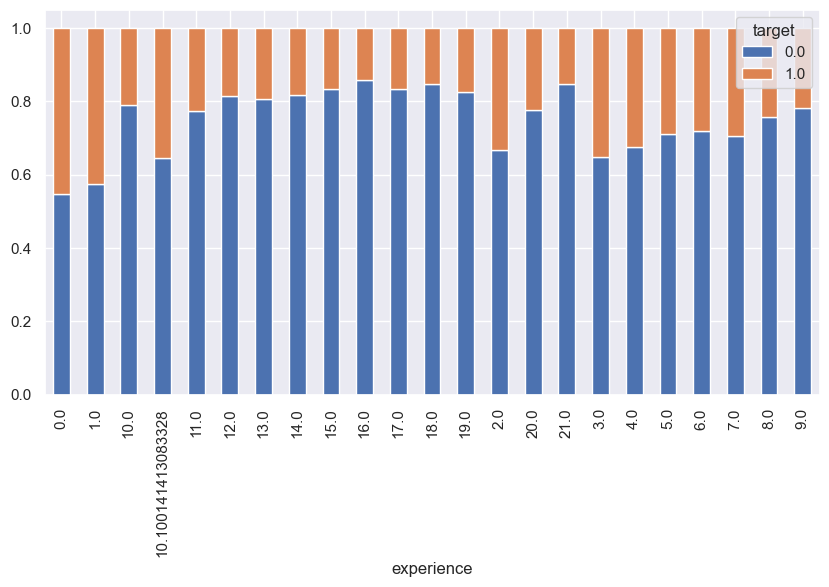

In [161]:
tmp = data1[["target", "experience"]].astype(str)
tmp["count"] = 1
tmp = tmp.groupby(["target", "experience"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "experience==\""+row["experience"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="target", index="experience", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))


##### Which experience group is more vulnerable to leaving company ?

Text(0.5, 1.0, 'experience Distrubution')

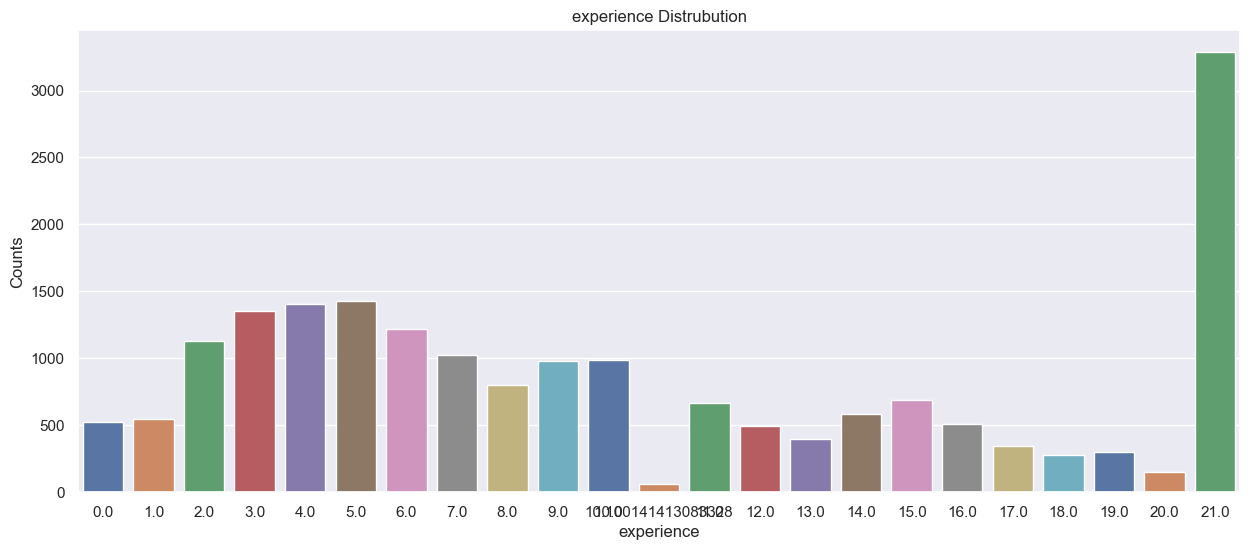

In [162]:
fig, ax = plt.subplots(figsize=(15,6))
age_dis=pd.DataFrame(data1.groupby(['experience'])['id'].count())
sns.barplot(x=age_dis.index,y=age_dis['id'], palette=sns.color_palette())
plt.ylabel('Counts')
plt.title('experience Distrubution')

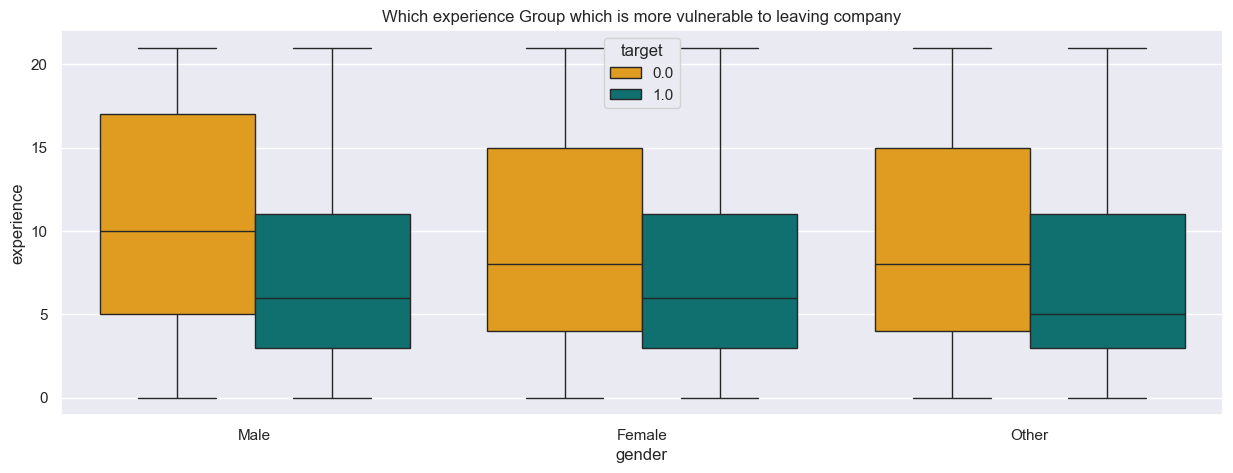

In [163]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (15,5))
ax = sns.boxplot(x = data1['gender'], y = data1['experience'], hue = data1['target'], palette = my_palette)
plt.title("Which experience Group which is more vulnerable to leaving company")
handles, _ = ax.get_legend_handles_labels()          
# ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

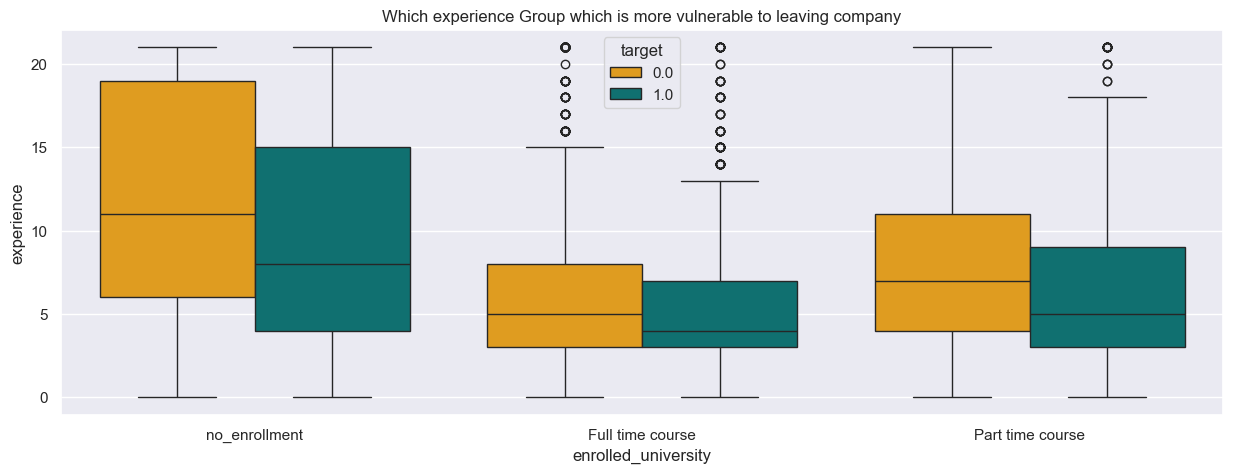

In [164]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (15,5))
ax = sns.boxplot(x = data1['enrolled_university'], y = data1['experience'], hue = data1['target'], palette = my_palette)
plt.title("Which experience Group which is more vulnerable to leaving company")
handles, _ = ax.get_legend_handles_labels()          
# ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

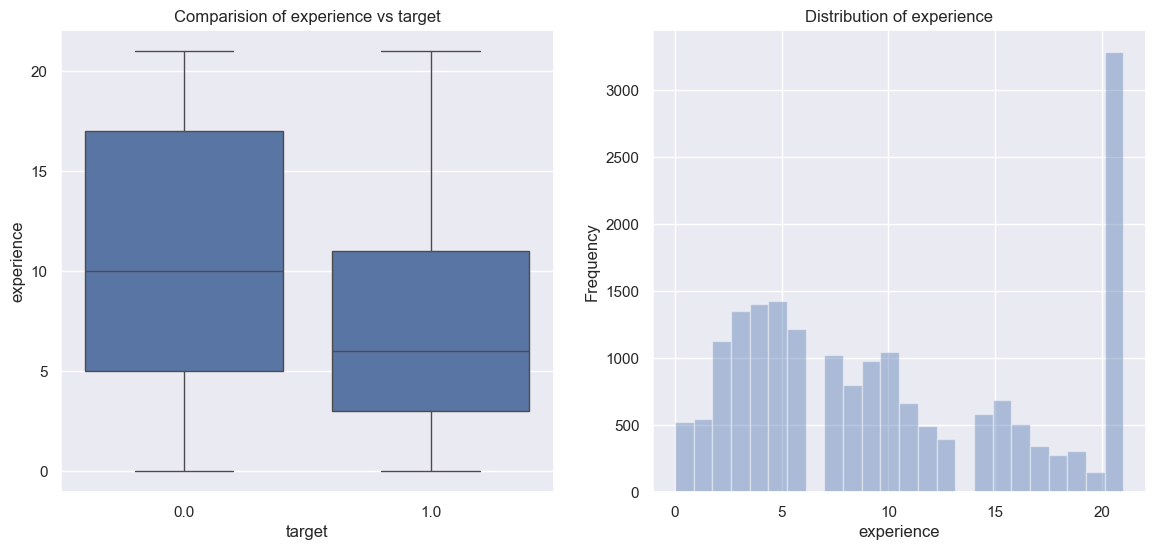

In [165]:
NumericalVariables_targetPlots(data1,segment_by="experience")

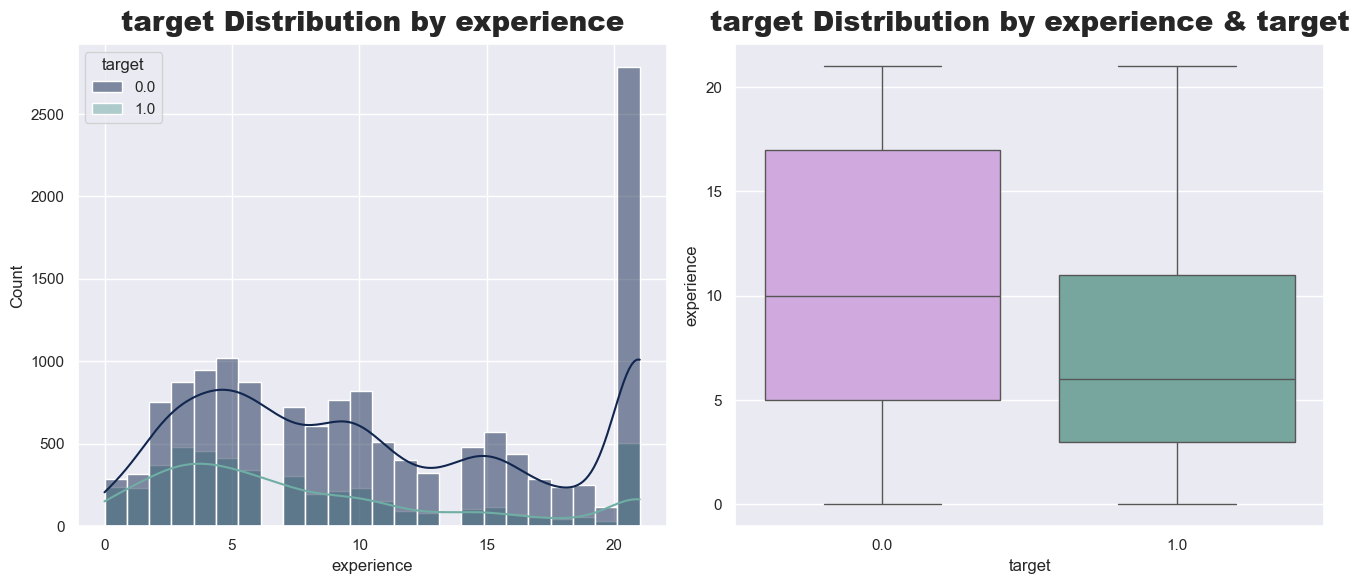

In [166]:
#Visualization to show target Distribution by experience.
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x="experience",hue="target",data=data1,kde=True,palette=["#11264e","#6faea4"])
plt.title("target Distribution by experience",fontweight="black",size=20,pad=10)

#Visualization to show target Distribution by experience & target.
plt.subplot(1,2,2)
sns.boxplot(x="target",y="experience",data=data1,palette=["#D4A1E7","#6faea4"])
plt.title("target Distribution by experience & target",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

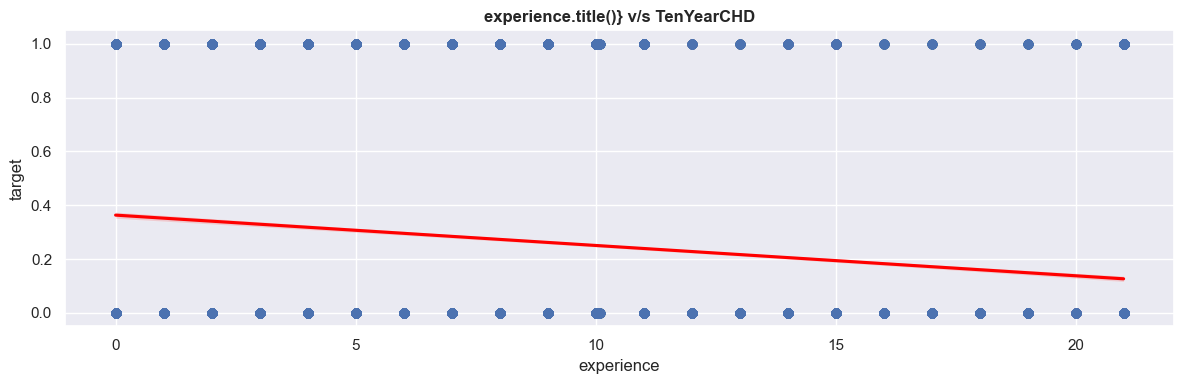

In [167]:
plt.figure(figsize=(12,4))
sns.regplot(x = data1["experience"], y =data1['target'],line_kws={"color": "red"})
plt.title('experience.title()} v/s TenYearCHD',weight='bold')
plt.tight_layout()
     

<Axes: xlabel='experience'>

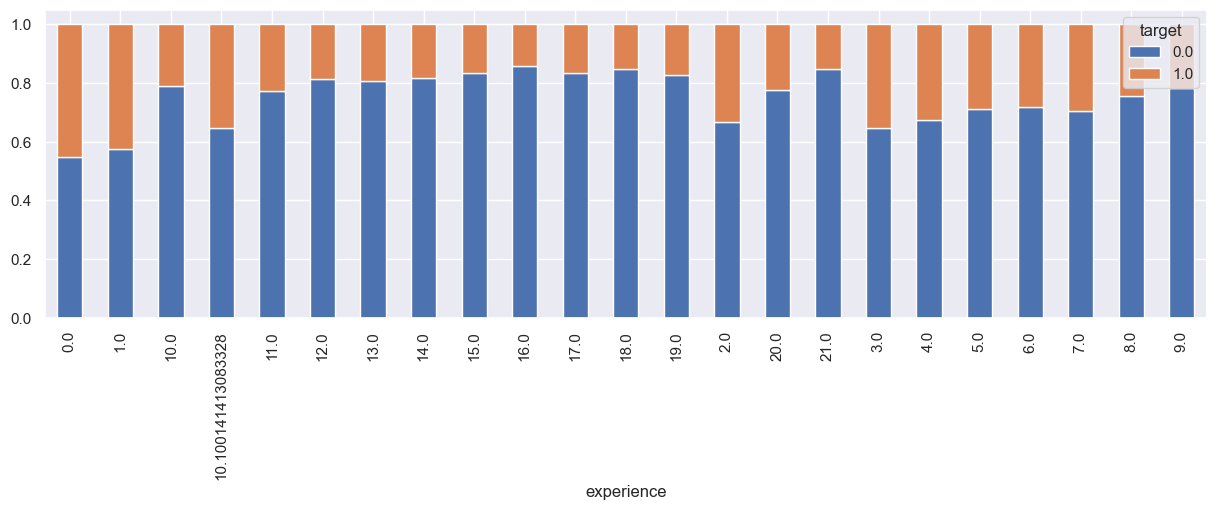

In [168]:

tmp = data1[["target", "experience"]]
tmp["experience"] = tmp["experience"].astype(str)
tmp["count"] = 1
tmp = tmp.groupby(["target", "experience"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "experience==\""+row["experience"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
# display(tmp)
tmp.pivot(columns="target", index="experience", values="count_norm").plot.bar(stacked=True,
                                                                                figsize=(15,4))

In [169]:
# Hypothesis testing on "experience" column
stat, p_val, dof = chi_sqred_ind_test(data1, "experience", "target", 0.05)

Contigency table: 
 target       0.0  1.0
experience           
0.000000     285  237
1.000000     316  233
2.000000     753  374
3.000000     876  478
4.000000     946  457
5.000000    1018  412
6.000000     873  343
7.000000     725  303
8.000000     607  195
9.000000     767  213
10.000000    778  207
10.100141     42   23
11.000000    513  151
12.000000    402   92
13.000000    322   77
14.000000    479  107
15.000000    572  114
16.000000    436   72
17.000000    285   57
18.000000    237   43
19.000000    251   53
20.000000    115   33
21.000000   2783  503
Statistic: 704.7101232223227
P-value: 7.882248351561308e-135
DOF: 22
probability=0.950, critical=33.924, stat=704.710
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


In [170]:
Hypothesisztest(data1["experience"][data1["target"]==1], data1["experience"][data1["target"]==0])

Yes_mean : 8.03020792390641
**************************************************
No_mean : 10.78772032121198
**************************************************
Yes_std : 6.30271877337077
**************************************************
No_std : 6.7740657540778955
**************************************************
stats : -24.794864985126154
**************************************************
p_val : 1.0184427953210533e-135
We Reject Null Hypothesis i.e means of two groups not equal


In [171]:
Hypothesisttest(data1["experience"][data1["target"]==1], data1["experience"][data1["target"]==0])

Yes_mean : 8.03020792390641
**************************************************
No_mean : 10.78772032121198
**************************************************
Yes_std : 6.30271877337077
**************************************************
No_std : 6.7740657540778955
**************************************************
statics : -24.794864985126154
**************************************************
p_val : 1.2949813340475807e-133
We Reject Null Hypothesis i.e means of two groups not equal


## Visualizing  company_size


In [172]:
data1["company_size"].value_counts()


company_size
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: count, dtype: int64

In [173]:
data1["company_size"].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [174]:
data1["company_size"].nunique()

8

company_size
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: count, dtype: int64
Axes(0.59553,0.11;0.256667x0.77)


Text(0.5, 1.0, 'company_size ratio Proposanate')

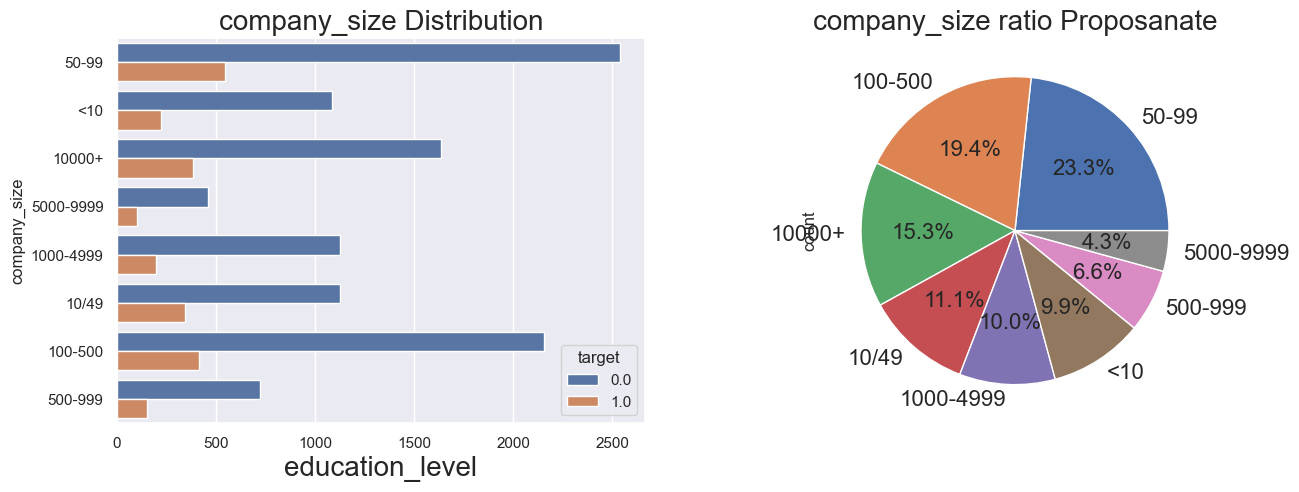

In [175]:
#  Distribution of "company_size"
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
sns.countplot(y="company_size", hue="target", data=data1)
plt.xlabel('education_level', fontsize=20)
plt.ylabel('company_size')
plt.title('company_size Distribution', fontsize=20)
ax2=plt.subplot(1,2,2)
val_counts = data1['company_size'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('company_size ratio Proposanate', fontsize=20)



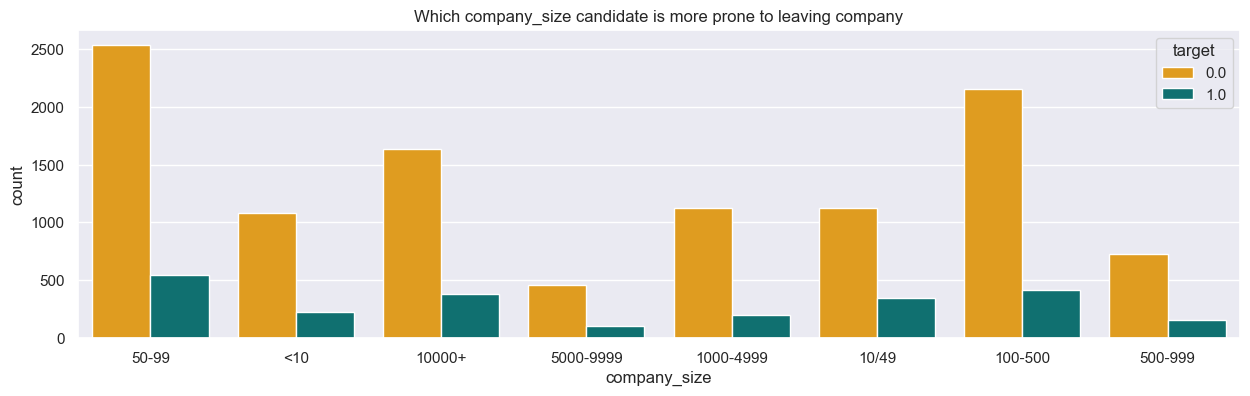

In [176]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (15,4))
sns.countplot(x = data1['company_size'], hue = data1['target'], palette = my_palette)
plt.title("Which company_size candidate is more prone to leaving company")
# plt.legend(['No Risk','At Risk'])
plt.show()



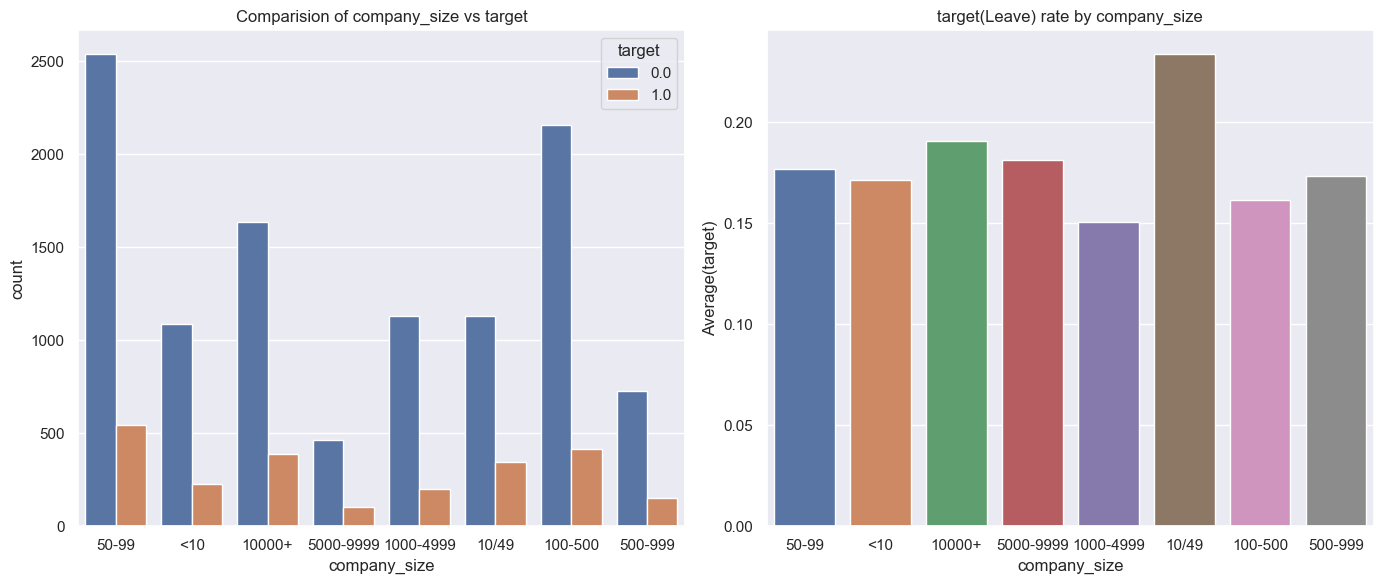

In [177]:
CategoricalVariables_targetPlots(data1,"company_size")

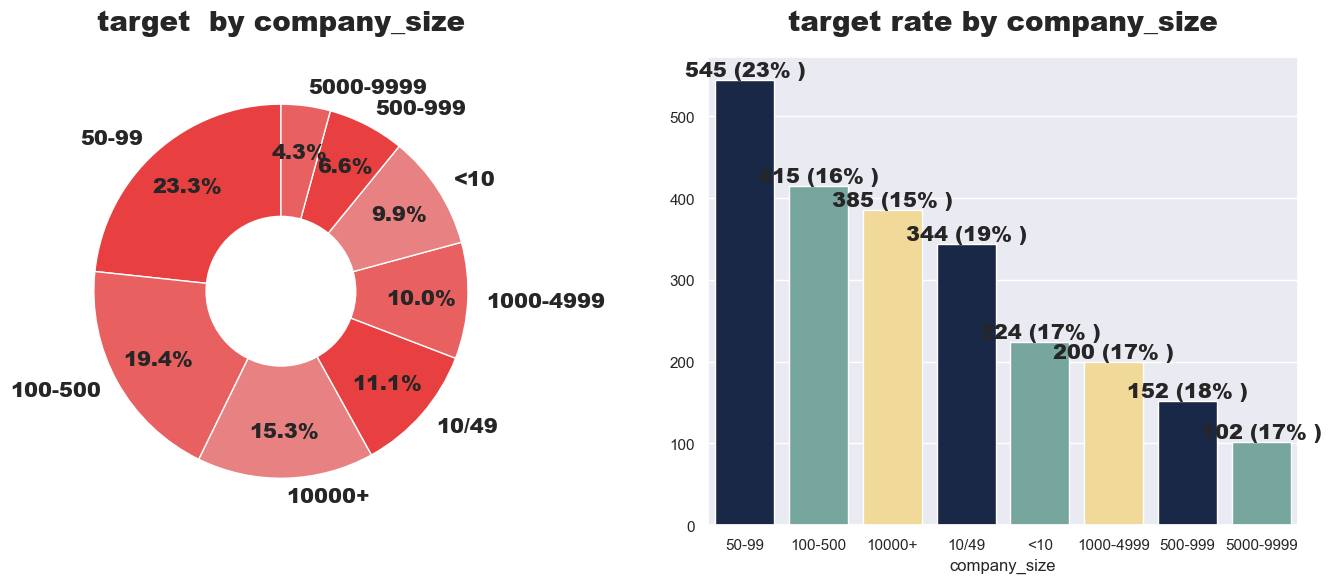

In [178]:
#Visualization to show target by company_size.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["company_size"].value_counts()
plt.title("target  by company_size", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show target Rate by company_size.
plt.subplot(1,2,2)
new_df = data1[data1["target"]==1]
value_2 = new_df["company_size"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("target rate by company_size",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()




In [179]:
# Univariate_Analysis1("company_size")

target company_size  count  count_norm
0      0.0        10/49   1127    0.766145
1      0.0      100-500   2156    0.838584
2      0.0    1000-4999   1128    0.849398
3      0.0       10000+   1634    0.809312
4      0.0        50-99   2538    0.823224
5      0.0      500-999    725    0.826682
6      0.0    5000-9999    461    0.818828
7      0.0          <10   1084    0.828746
8      1.0        10/49    344    0.233855
9      1.0      100-500    415    0.161416
10     1.0    1000-4999    200    0.150602
11     1.0       10000+    385    0.190688
12     1.0        50-99    545    0.176776
13     1.0      500-999    152    0.173318
14     1.0    5000-9999    102    0.181172
15     1.0          <10    224    0.171254

<Axes: xlabel='company_size'>

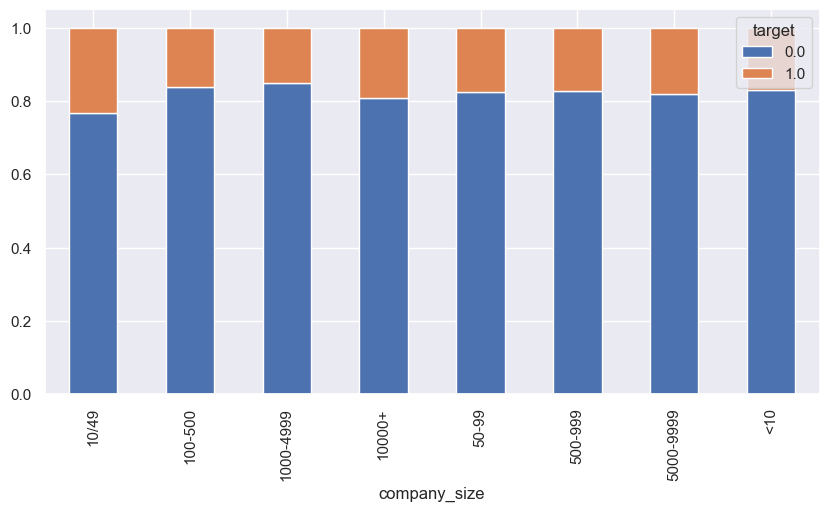

In [180]:
tmp = data1[["target", "company_size"]]
tmp["count"] = 1
tmp = tmp.groupby(["target", "company_size"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "company_size==\""+row["company_size"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="target", index="company_size", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))




In [181]:
# Hypothesis testing on "education_level" column
stat, p_val, dof = chi_sqred_ind_test(data1, "company_size", "target", 0.05)


Contigency table: 
 target         0.0  1.0
company_size           
10/49         1127  344
100-500       2156  415
1000-4999     1128  200
10000+        1634  385
50-99         2538  545
500-999        725  152
5000-9999      461  102
<10           1084  224
Statistic: 45.53175529315902
P-value: 1.0781332047560822e-07
DOF: 7
probability=0.950, critical=14.067, stat=45.532
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


## Visualizing  company_type


In [182]:
data1["company_type"].value_counts()


company_type
Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: count, dtype: int64

In [183]:
data1["company_type"].unique()


array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [184]:
data1["company_type"].nunique()


6

company_type
Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: count, dtype: int64
Axes(0.59553,0.11;0.256667x0.77)


Text(0.5, 1.0, 'company_type ratio Proposanate')

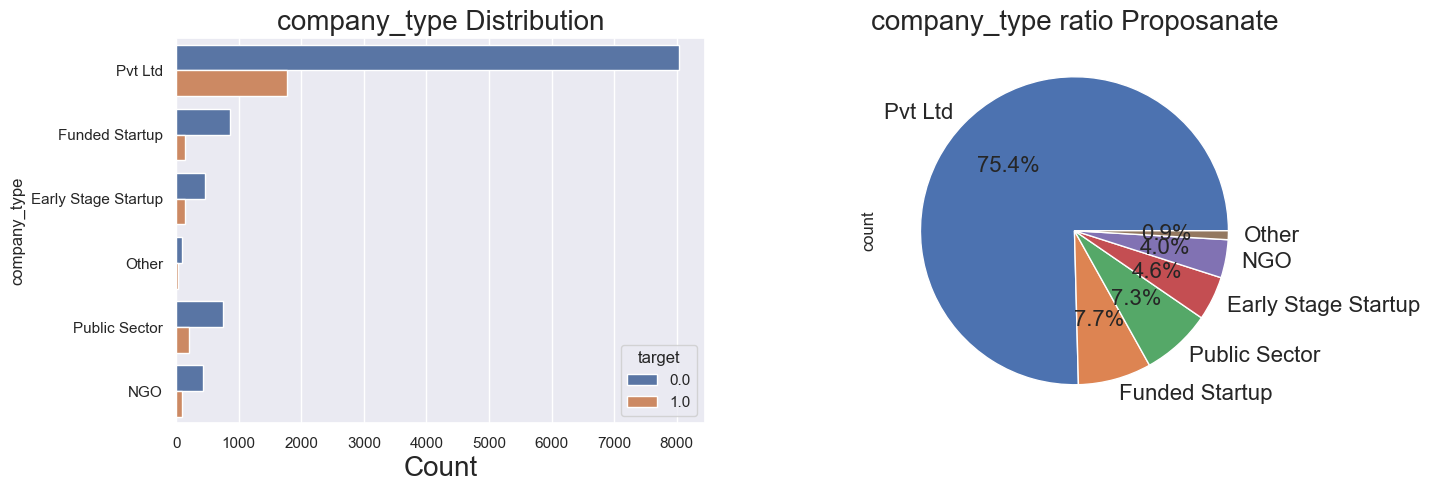

In [185]:
#  Distribution of "company_type"
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
sns.countplot(y="company_type", hue="target", data=data1)
plt.xlabel('Count', fontsize=20)
plt.ylabel('company_type')
plt.title('company_type Distribution', fontsize=20)
ax2=plt.subplot(1,2,2)
val_counts = data1['company_type'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('company_type ratio Proposanate', fontsize=20)

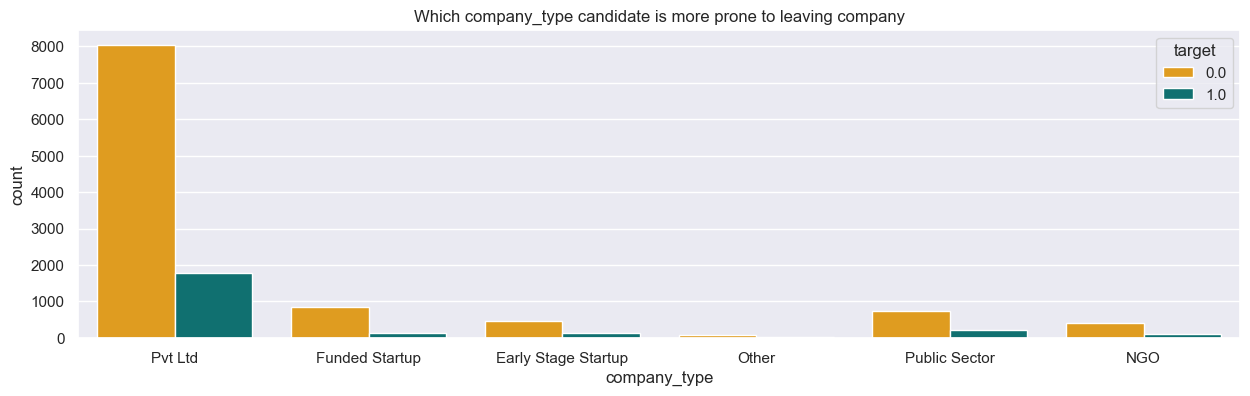

In [186]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (15,4))
sns.countplot(x = data1['company_type'], hue = data1['target'], palette = my_palette)
plt.title("Which company_type candidate is more prone to leaving company")
# plt.legend(['No Risk','At Risk'])
plt.show()

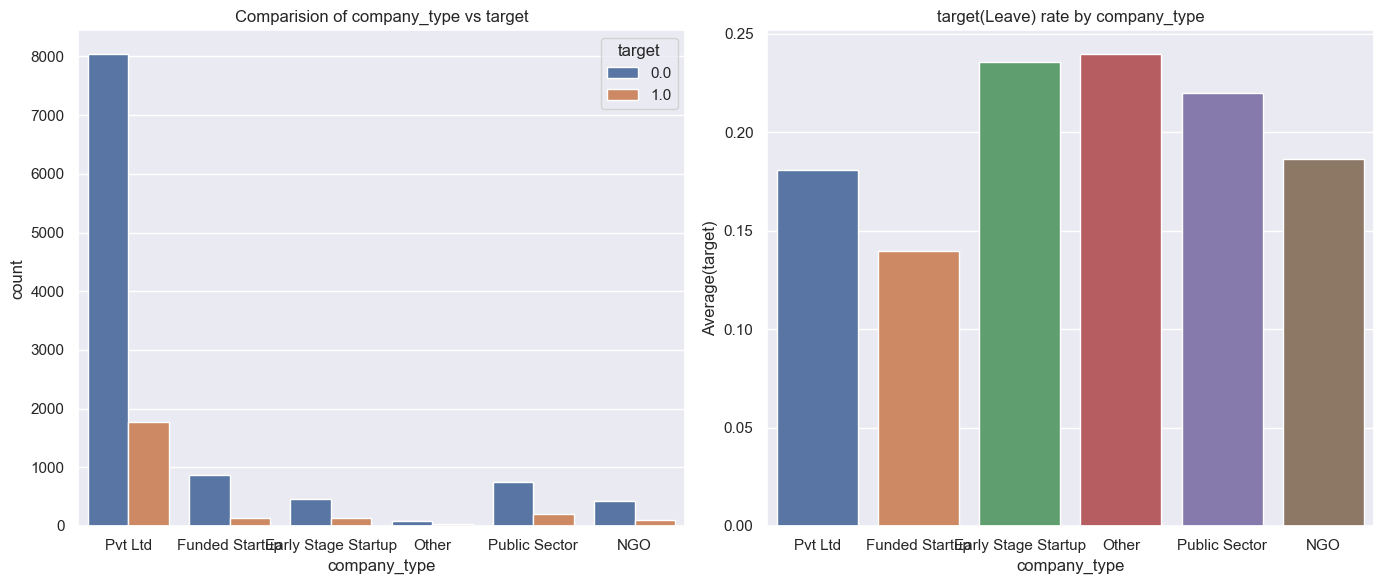

In [187]:
CategoricalVariables_targetPlots(data1,"company_type")


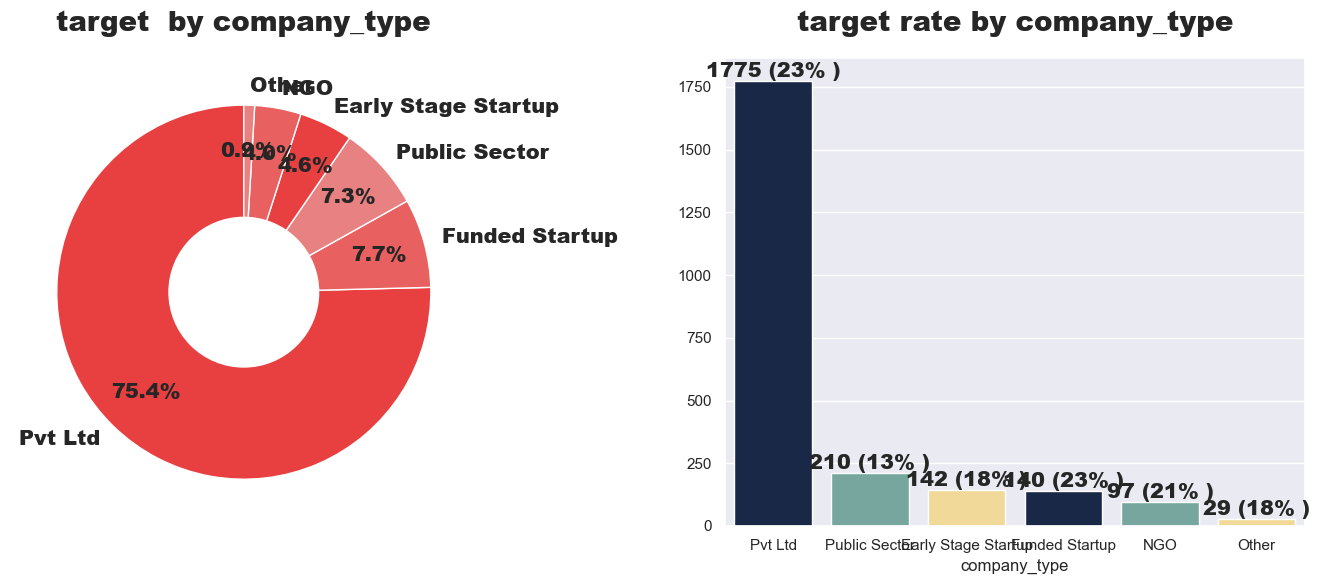

In [188]:
#Visualization to show target by company_type.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["company_type"].value_counts()
plt.title("target  by company_type", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show target Rate by company_type.
plt.subplot(1,2,2)
new_df = data1[data1["target"]==1]
value_2 = new_df["company_type"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("target rate by company_type",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


In [189]:
# Univariate_Analysis1("company_type")


target         company_type  count  count_norm
0      0.0  Early Stage Startup    461    0.764511
1      0.0       Funded Startup    861    0.860140
2      0.0                  NGO    424    0.813820
3      0.0                Other     92    0.760331
4      0.0        Public Sector    745    0.780105
5      0.0              Pvt Ltd   8042    0.819191
6      1.0  Early Stage Startup    142    0.235489
7      1.0       Funded Startup    140    0.139860
8      1.0                  NGO     97    0.186180
9      1.0                Other     29    0.239669
10     1.0        Public Sector    210    0.219895
11     1.0              Pvt Ltd   1775    0.180809

<Axes: xlabel='company_type'>

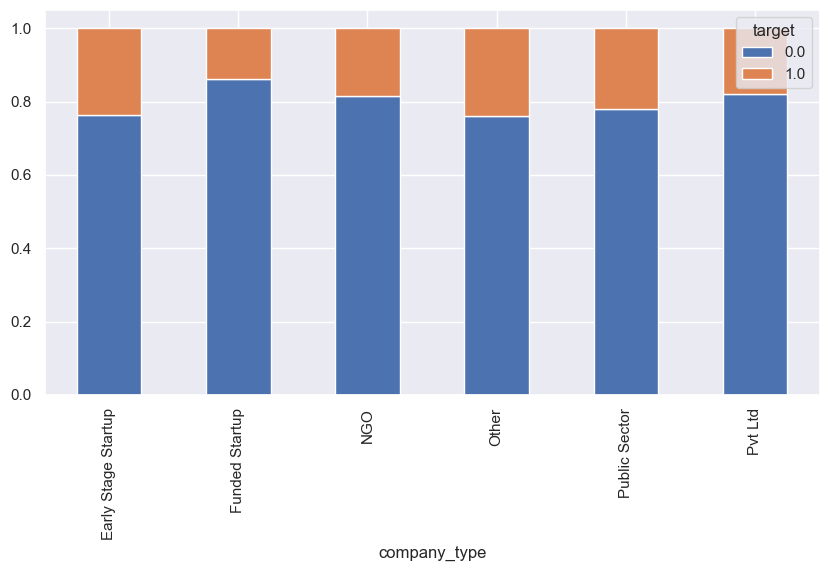

In [190]:
tmp = data1[["target", "company_type"]]
tmp["count"] = 1
tmp = tmp.groupby(["target", "company_type"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "company_type==\""+row["company_type"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="target", index="company_type", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))


In [191]:
# Hypothesis testing on "education_level" column
stat, p_val, dof = chi_sqred_ind_test(data1, "company_type", "target", 0.05)

Contigency table: 
 target                0.0   1.0
company_type                   
Early Stage Startup   461   142
Funded Startup        861   140
NGO                   424    97
Other                  92    29
Public Sector         745   210
Pvt Ltd              8042  1775
Statistic: 35.03547546070745
P-value: 1.480320299477758e-06
DOF: 5
probability=0.950, critical=11.070, stat=35.035
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


## Visualizing  last_new_job


In [192]:
data1["last_new_job"].value_counts()

last_new_job
1        8463
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: count, dtype: int64

In [193]:
data1["last_new_job"].unique()

array(['1', '>4', 'never', '4', '3', '2'], dtype=object)

In [194]:
data1["last_new_job"].nunique()

6

last_new_job
1        8463
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: count, dtype: int64
Axes(0.59553,0.11;0.256667x0.77)


Text(0.5, 1.0, 'last_new_job ratio Proposanate')

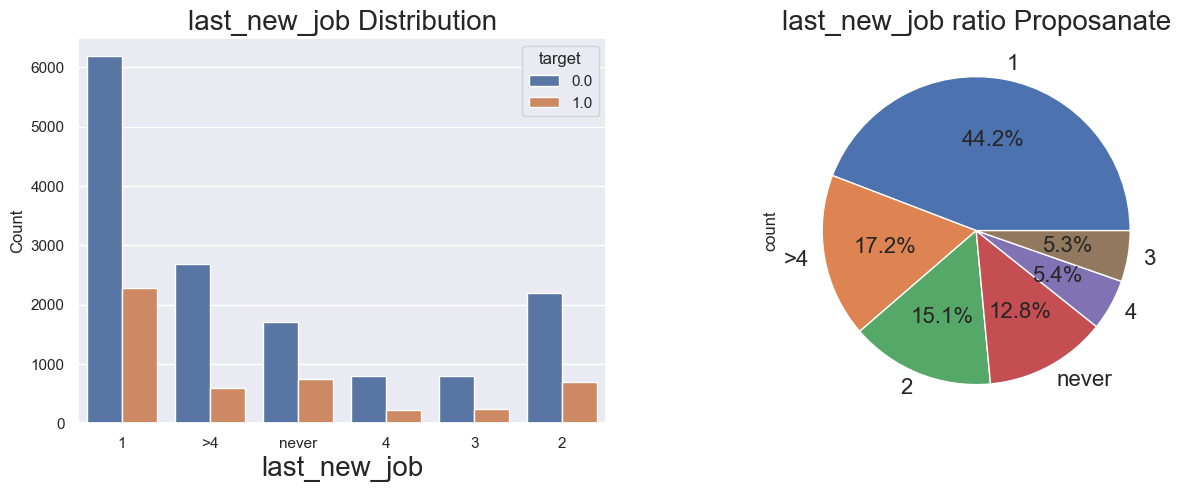

In [195]:
#  Distribution of "last_new_job"
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
sns.countplot(x="last_new_job", hue="target", data=data1)
plt.xlabel('last_new_job', fontsize=20)
plt.ylabel('Count')
plt.title('last_new_job Distribution', fontsize=20)
ax2=plt.subplot(1,2,2)
val_counts = data1['last_new_job'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('last_new_job ratio Proposanate', fontsize=20)

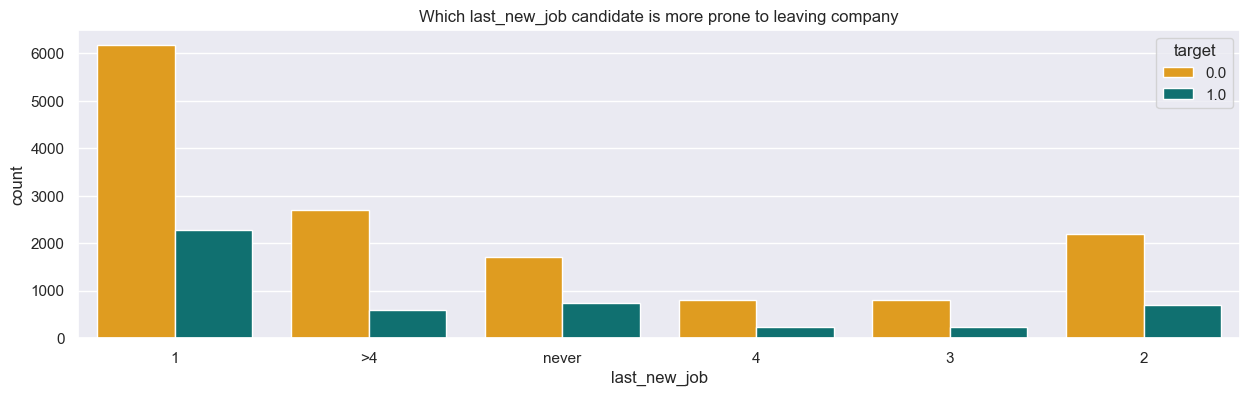

In [196]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (15,4))
sns.countplot(x = data1['last_new_job'], hue = data1['target'], palette = my_palette)
plt.title("Which last_new_job candidate is more prone to leaving company")
# plt.legend(['No Risk','At Risk'])
plt.show()


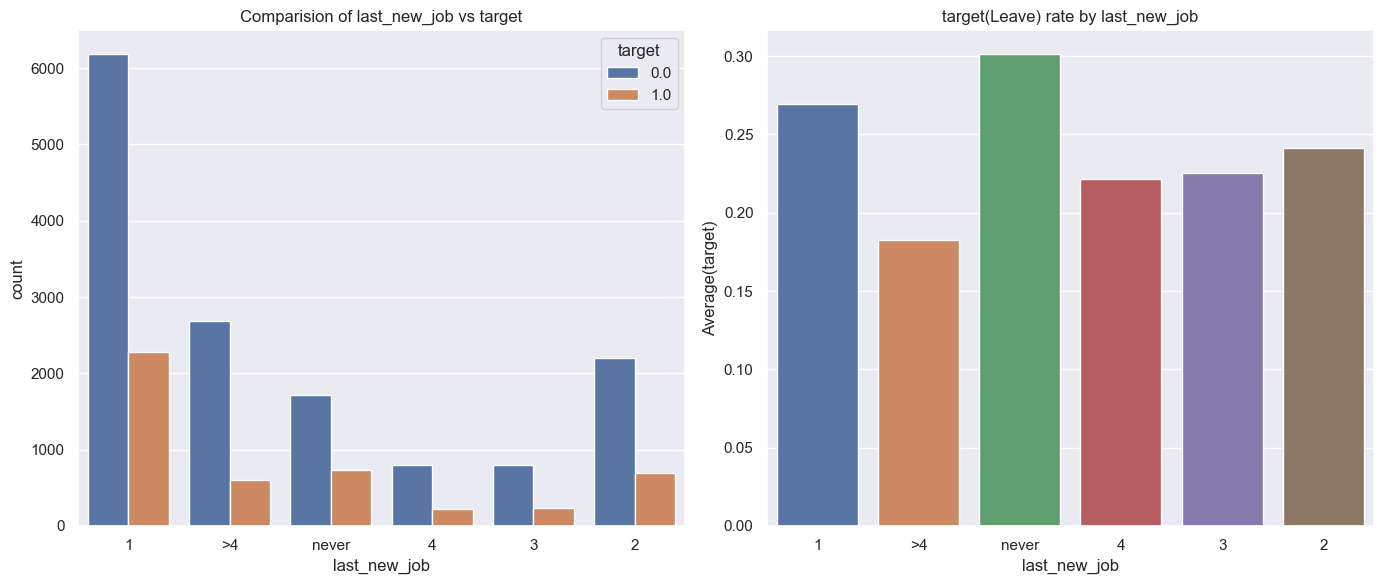

In [197]:
CategoricalVariables_targetPlots(data1,"last_new_job")


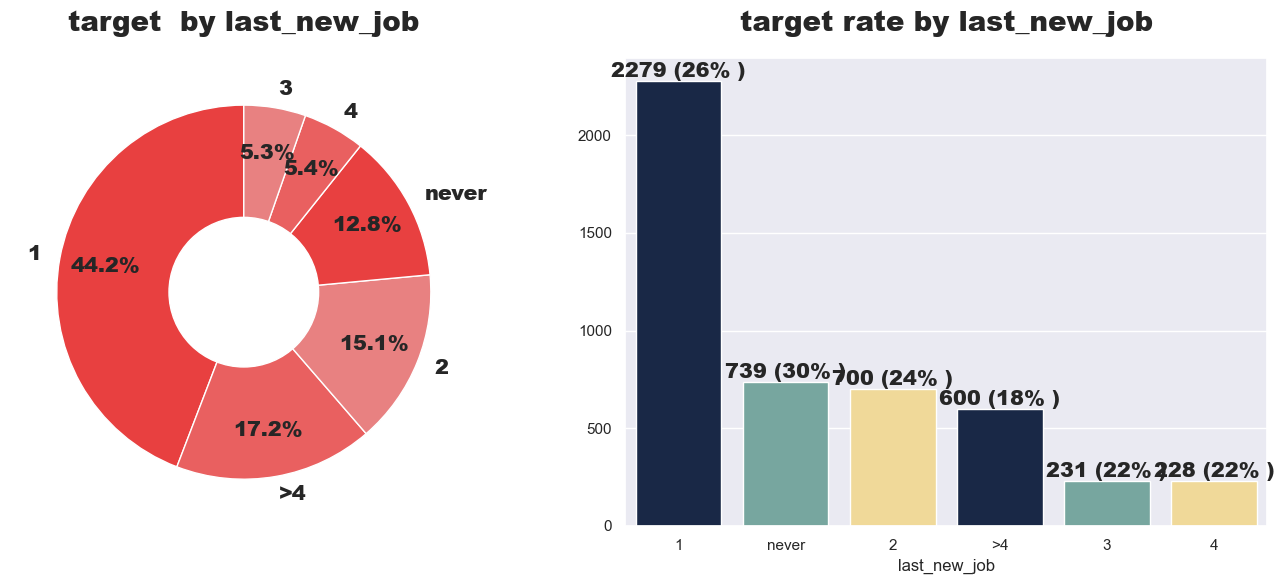

In [198]:
#Visualization to show target by education_level.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["last_new_job"].value_counts()
plt.title("target  by last_new_job", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show target Rate by last_new_job.
plt.subplot(1,2,2)
new_df = data1[data1["target"]==1]
value_2 = new_df["last_new_job"].value_counts()
# acceptance_rate = np.floor((value_2/value_1)*100).values
acceptance_rate = [26.92, 30, 24, 18, 22, 22]
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("target rate by last_new_job",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


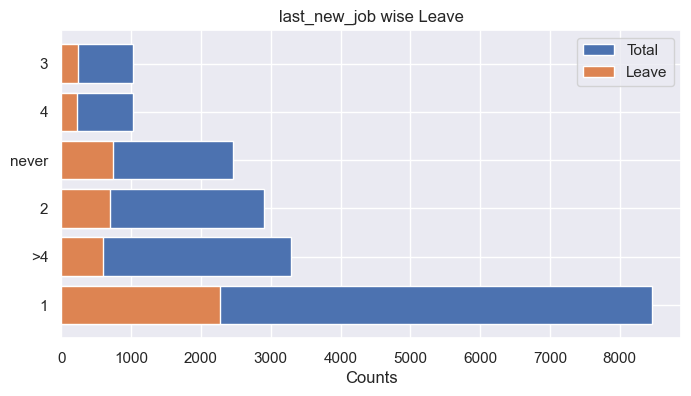

last_new_job  Total_Count  % of Total  Leave  Stay  %Leave   %Stay
0            1         8463   44.174757   2279  6184  26.929  73.071
4           >4         3290    5.371124    600  2690  18.237  81.763
1            2         2900   17.172983    700  2200  24.138  75.862
5        never         2452    5.345026    739  1713  30.139  69.861
3            4         1029   12.798831    228   801  22.157  77.843
2            3         1024   15.137279    231   793  22.559  77.441

In [199]:
Univariate_Analysis1("last_new_job")


target last_new_job  count  count_norm
0      0.0            1   6184    0.730710
1      0.0            2   2200    0.758621
2      0.0            3    793    0.774414
3      0.0            4    801    0.778426
4      0.0           >4   2690    0.817629
5      0.0        never   1713    0.698613
6      1.0            1   2279    0.269290
7      1.0            2    700    0.241379
8      1.0            3    231    0.225586
9      1.0            4    228    0.221574
10     1.0           >4    600    0.182371
11     1.0        never    739    0.301387

<Axes: xlabel='last_new_job'>

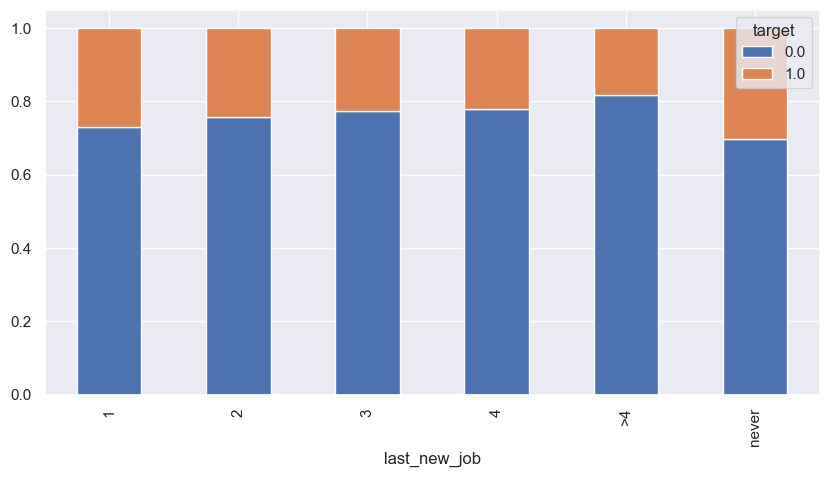

In [200]:
tmp = data1[["target", "last_new_job"]]
tmp["count"] = 1
tmp = tmp.groupby(["target", "last_new_job"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "last_new_job==\""+row["last_new_job"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="target", index="last_new_job", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))



In [201]:
# Hypothesis testing on "last_new_job" column
stat, p_val, dof = chi_sqred_ind_test(data1, "last_new_job", "target", 0.05)

Contigency table: 
 target         0.0   1.0
last_new_job            
1             6184  2279
2             2200   700
3              793   231
4              801   228
>4            2690   600
never         1713   739
Statistic: 140.62065851671588
P-value: 1.3204936717164466e-28
DOF: 5
probability=0.950, critical=11.070, stat=140.621
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


## Visualizing  last_new_job


In [202]:
data1["training_hours"].value_counts()

training_hours
28     329
12     292
18     291
22     282
50     279
20     278
24     273
17     273
6      261
34     261
23     258
21     256
26     254
56     250
42     242
10     241
48     237
11     237
9      234
14     231
15     230
8      227
4      224
46     223
13     213
36     211
7      209
32     207
44     205
43     199
25     199
52     196
40     192
16     192
30     187
31     184
29     179
39     178
51     176
45     175
55     171
78     165
19     163
37     163
35     162
54     161
47     157
72     153
33     150
41     145
80     144
57     142
102    137
53     136
70     132
64     132
74     131
58     131
62     128
94     124
96     123
3      119
90     118
27     116
38     115
68     113
100    113
84     111
66     107
5      107
61      98
82      98
92      97
60      97
112     96
2       96
108     95
86      94
106     94
88      92
67      90
77      88
83      86
76      83
65      79
98      79
69      78
110     77
63      75
166   

In [203]:
data1["training_hours"].unique()

array([ 36,  47,  83,  52,   8,  24,  18,  46, 123,  32, 108,  23,  26,
       106,   7, 132,  68,  50,  48,  65,  13,  22, 148,  72,  40, 141,
        82, 145, 206, 152,  42,  14, 112,  87,  20,  21,  92, 102,  43,
        45,  19,  90,  25,  15,  98, 142,  28, 228,  29,  12,  17,  35,
         4, 136,  27,  74,  86,  75, 332, 140, 182, 172,  33,  34, 150,
       160,   3,   2, 210, 101,  59, 260, 131, 109,  70,  51,  60, 164,
       290, 133,  76, 156, 120, 100,  39,  55,  49,   6, 125, 326, 198,
        11,  41, 114, 246,  81,  31,  84, 105,  38, 178, 104, 202,  88,
       218,  62,  10,  80,  77,  37, 162, 190,  30,  16,   5,  54,  44,
       110, 262, 107, 134, 103,  96,  57, 240,  94, 113,  56,  64, 320,
         9, 129,  58, 126, 166,  95,  97, 204, 116, 161, 146, 302,  53,
       143, 124, 214, 288, 306, 322,  67,  61, 130, 220,  78, 314, 226,
       280,  91, 234, 163, 151,  85, 256, 168, 144,  66, 128,  73, 122,
       154,  63, 292, 188,  71, 135, 138, 184,  89, 157, 118, 11

In [204]:
data1["training_hours"].nunique()

241

In [205]:
data1["training_hours"].describe().to_frame()

training_hours
count    19158.000000
mean        65.366896
std         60.058462
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000

##### Which training_hours group is more vulnerable to Leaving Company ?

Text(0.5, 1.0, 'training_hours Distrubution')

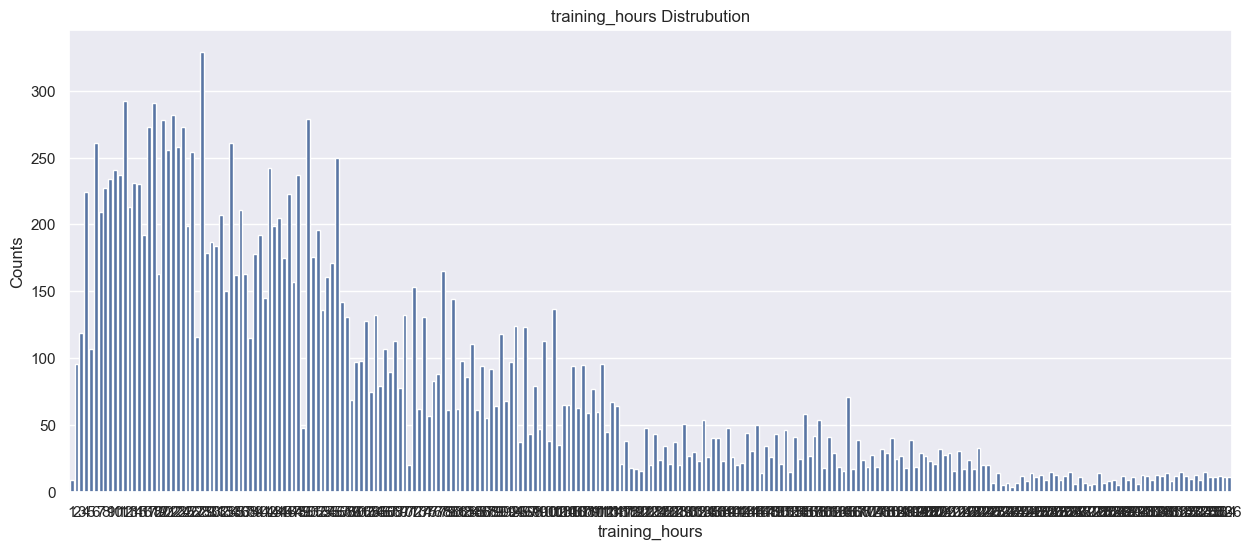

In [206]:
fig, ax = plt.subplots(figsize=(15,6))
age_dis=pd.DataFrame(data1.groupby(['training_hours'])['id'].count())
sns.barplot(x=age_dis.index,y=age_dis['id'])
plt.ylabel('Counts')
plt.title('training_hours Distrubution')

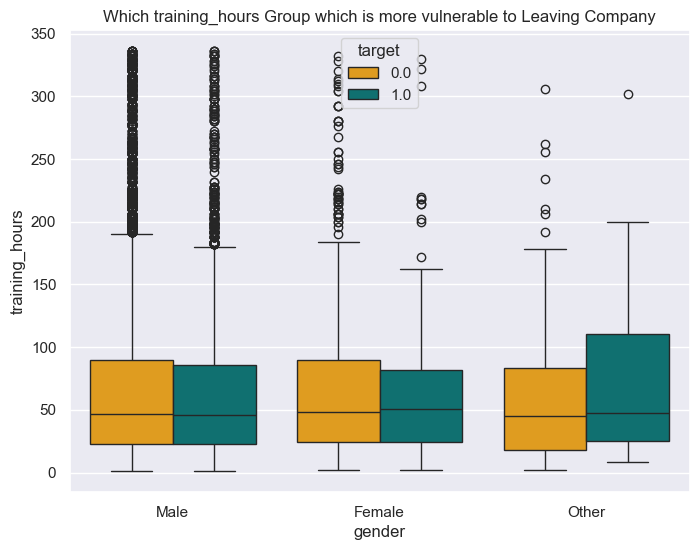

In [207]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (8,6))
ax = sns.boxplot(x = data1['gender'], y = data1['training_hours'], hue = data1['target'], palette = my_palette)
plt.title("Which training_hours Group which is more vulnerable to Leaving Company")
handles, _ = ax.get_legend_handles_labels()          
# ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

<Axes: title={'center': 'Distribution of training_hours'}, xlabel='training_hours', ylabel='Frequency'>

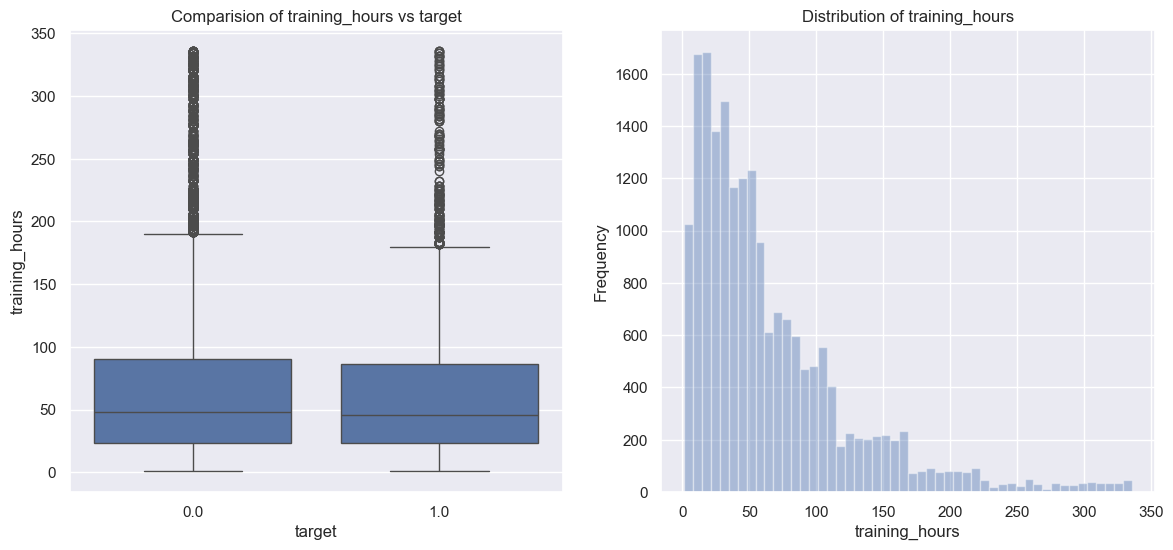

In [208]:
fig, ax = plt.subplots(ncols= 2, figsize = (14,6))
sns.boxplot(x = "target", y = "training_hours", data=data1, ax=ax[0])
ax[0].set_title("Comparision of " + "training_hours" + " vs " + "target")

ax[1].set_title("Distribution of "+"training_hours")
ax[1].set_ylabel("Frequency")
sns.distplot(a = data1["training_hours"], ax=ax[1], kde=False)


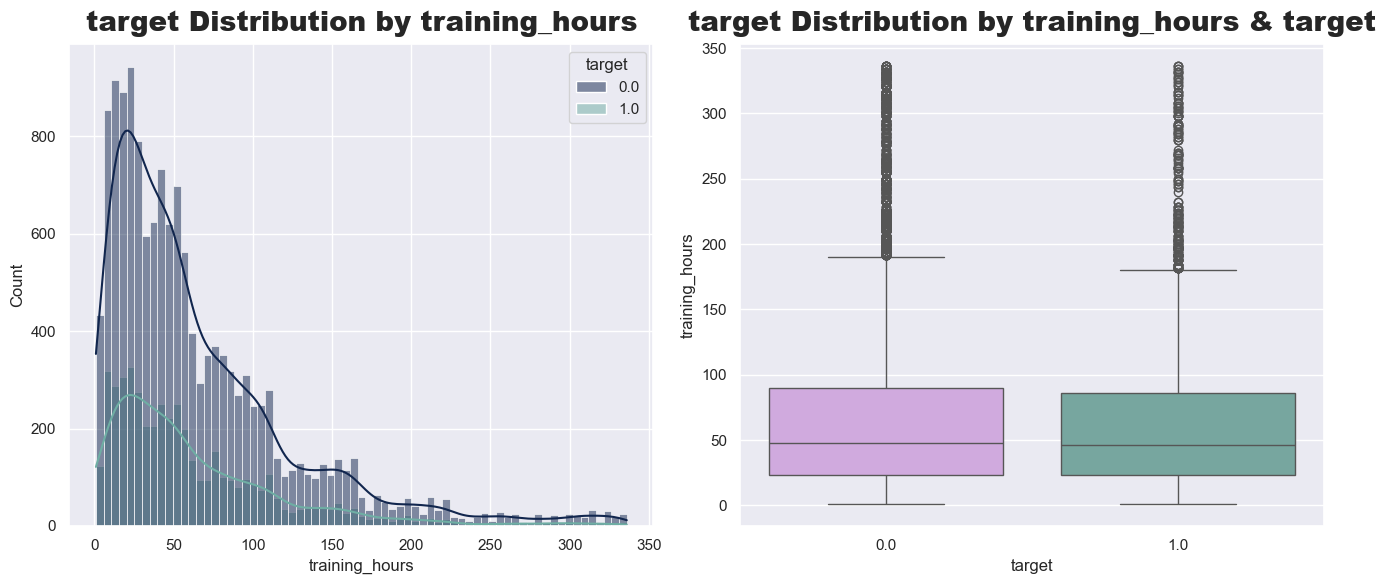

In [209]:
#Visualization to show target Distribution by training_hours.
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x="training_hours",hue="target",data=data1,kde=True,palette=["#11264e","#6faea4"])
plt.title("target Distribution by training_hours",fontweight="black",size=20,pad=10)

#Visualization to show CHD Distribution by Age & TenYearCHD.
plt.subplot(1,2,2)
sns.boxplot(x="target",y="training_hours",data=data1,palette=["#D4A1E7","#6faea4"])
plt.title("target Distribution by training_hours & target",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

In [212]:
Hypothesisztest(data1["training_hours"][data1["target"]==1], data1["training_hours"][data1["target"]==0])

Yes_mean : 63.11848440443793
**************************************************
No_mean : 66.11376121271121
**************************************************
Yes_std : 57.27366227741433
**************************************************
No_std : 60.93893742951763
**************************************************
stats : -2.9870990541592386
**************************************************
p_val : 0.0028163845327294082
We Reject Null Hypothesis i.e means of two groups not equal


In [213]:
Hypothesisttest(data1["training_hours"][data1["target"]==1], data1["training_hours"][data1["target"]==0])

Yes_mean : 63.11848440443793
**************************************************
No_mean : 66.11376121271121
**************************************************
Yes_std : 57.27366227741433
**************************************************
No_std : 60.93893742951763
**************************************************
statics : -2.9870990541592386
**************************************************
p_val : 0.002819949452636266
We Reject Null Hypothesis i.e means of two groups not equal


In [214]:
data1.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624   Male   
3        33241  city_115                   0.789   Male   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience       no_enrollment        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline  experience company_size    company_type last_new_job  \
0             STEM        21.0          NaN             NaN            1   
1             STEM        15.0        50-99         Pvt Ltd           >4   
2             STEM         5.0          NaN             NaN        never   
3  Business Degree         0.0          NaN         Pvt Ltd        never   
4             STEM        21.0        50-99  Funded Startup            4   

   training_hours  target  id  
0              36     1.0   0  
1              47     0.0   1  
2              83     0.0   2  
3              52     1.0   3  
4               8     0.0   4

# Hypothesis Test

# Hypothesis Test

## Perform t-test on Numerical Features

In [215]:
numerical_columns = ["enrollee_id", "city_development_index", "training_hours", "experience"]



t_score = {}
p_value = {}
Yes_mean = {}
Yes_std = {}
No_mean = {}
No_std = {}


for column in data[numerical_columns]:
    statistics, p_val = stats.ttest_ind(data1[column][data1["target"]==1], 
                                     data1[column][data1["target"]==0], equal_var=True)
    print(f"t_score for {column} : {statistics}")
    print(f"p_value for {column} : {p_val}")
    
    Yes_mean[column] = data1[column][data1["target"]==1].mean()
    Yes_std[column] = data1[column][data1["target"]==1].std()
    No_mean[column] = data1[column][data1["target"]==0].mean()
    No_std[column] = data1[column][data1["target"]==0].std()
    t_score[column] = statistics
    p_value[column] = p_val


t_score for enrollee_id : 6.855960508742263
p_value for enrollee_id : 7.29922912969043e-12
t_score for city_development_index : -50.31616259328961
p_value for city_development_index : 0.0
t_score for training_hours : -2.9870990541592386
p_value for training_hours : 0.002819949452636266
t_score for experience : -24.794864985126154
p_value for experience : 1.2949813340475807e-133


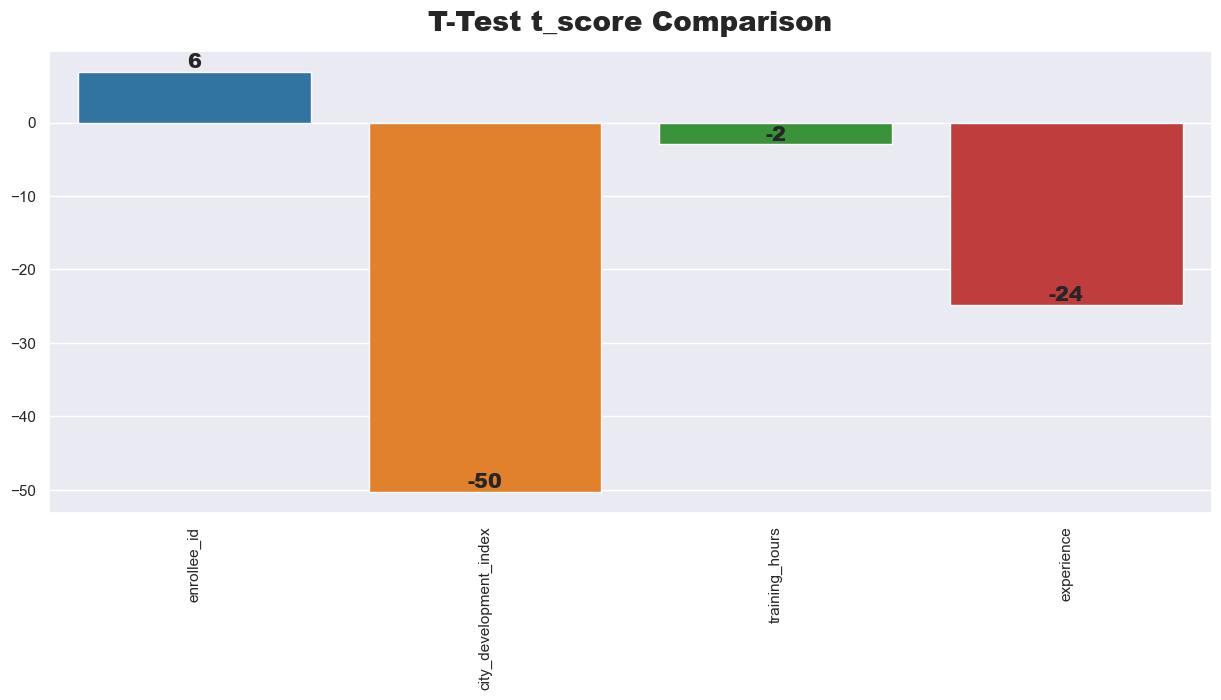

In [216]:
plt.figure(figsize=(15,6))
keys = list(t_score.keys())
values = list(t_score.values())

sns.barplot(x=keys, y=values, palette=sns.color_palette("tab10"))
plt.title("T-Test t_score Comparison",fontweight="black",size=20,pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom",fontweight="black",size=15)
plt.show()

In [217]:
test_df = pd.DataFrame({"Features":keys,"T_Score":values})
test_df["P_value"] = [format(p, '.20f') for p in list(p_value.values())]
test_df["Yes_mean"] = [format(i, '.4f') for i in list(Yes_mean.values())]
test_df["No_mean"] = [format(i, '.4f') for i in list(No_mean.values())]
test_df["Yes_std"] = [format(i, '.4f') for i in list(Yes_std.values())]
test_df["No_std"] = [format(i, '.4f') for i in list(No_std.values())]


test_df

Features    T_Score                 P_value    Yes_mean  \
0             enrollee_id   6.855961  0.00000000000729922913  17700.8200   
1  city_development_index -50.316163  0.00000000000000000000      0.7557   
2          training_hours  -2.987099  0.00281994945263626612     63.1185   
3              experience -24.794865  0.00000000000000000000      8.0302   

      No_mean    Yes_std     No_std  
0  16601.1609  9440.1711  9658.8133  
1      0.8531     0.1432     0.1054  
2     66.1138    57.2737    60.9389  
3     10.7877     6.3027     6.7741

## PERFORM CHI-SQUARE TEST ON CATEGORICAL FEATURES

In [218]:
cat_cols = data1.select_dtypes(include="object").columns.tolist()
# cat_cols.remove("Accept(Y/N?)")
cat_cols

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'company_size',
 'company_type',
 'last_new_job']

In [219]:
chi2_statistic = {}
p_values = {}
# dof = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(data1[col], data1['target'])
    chi2, p_value, dof, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value
#     dof[col] = dofchi2_statistic = {}
p_values = {}
# dof = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(data1[col], data1['target'])
    chi2, p_value, dof, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value
#     dof[col] = dof

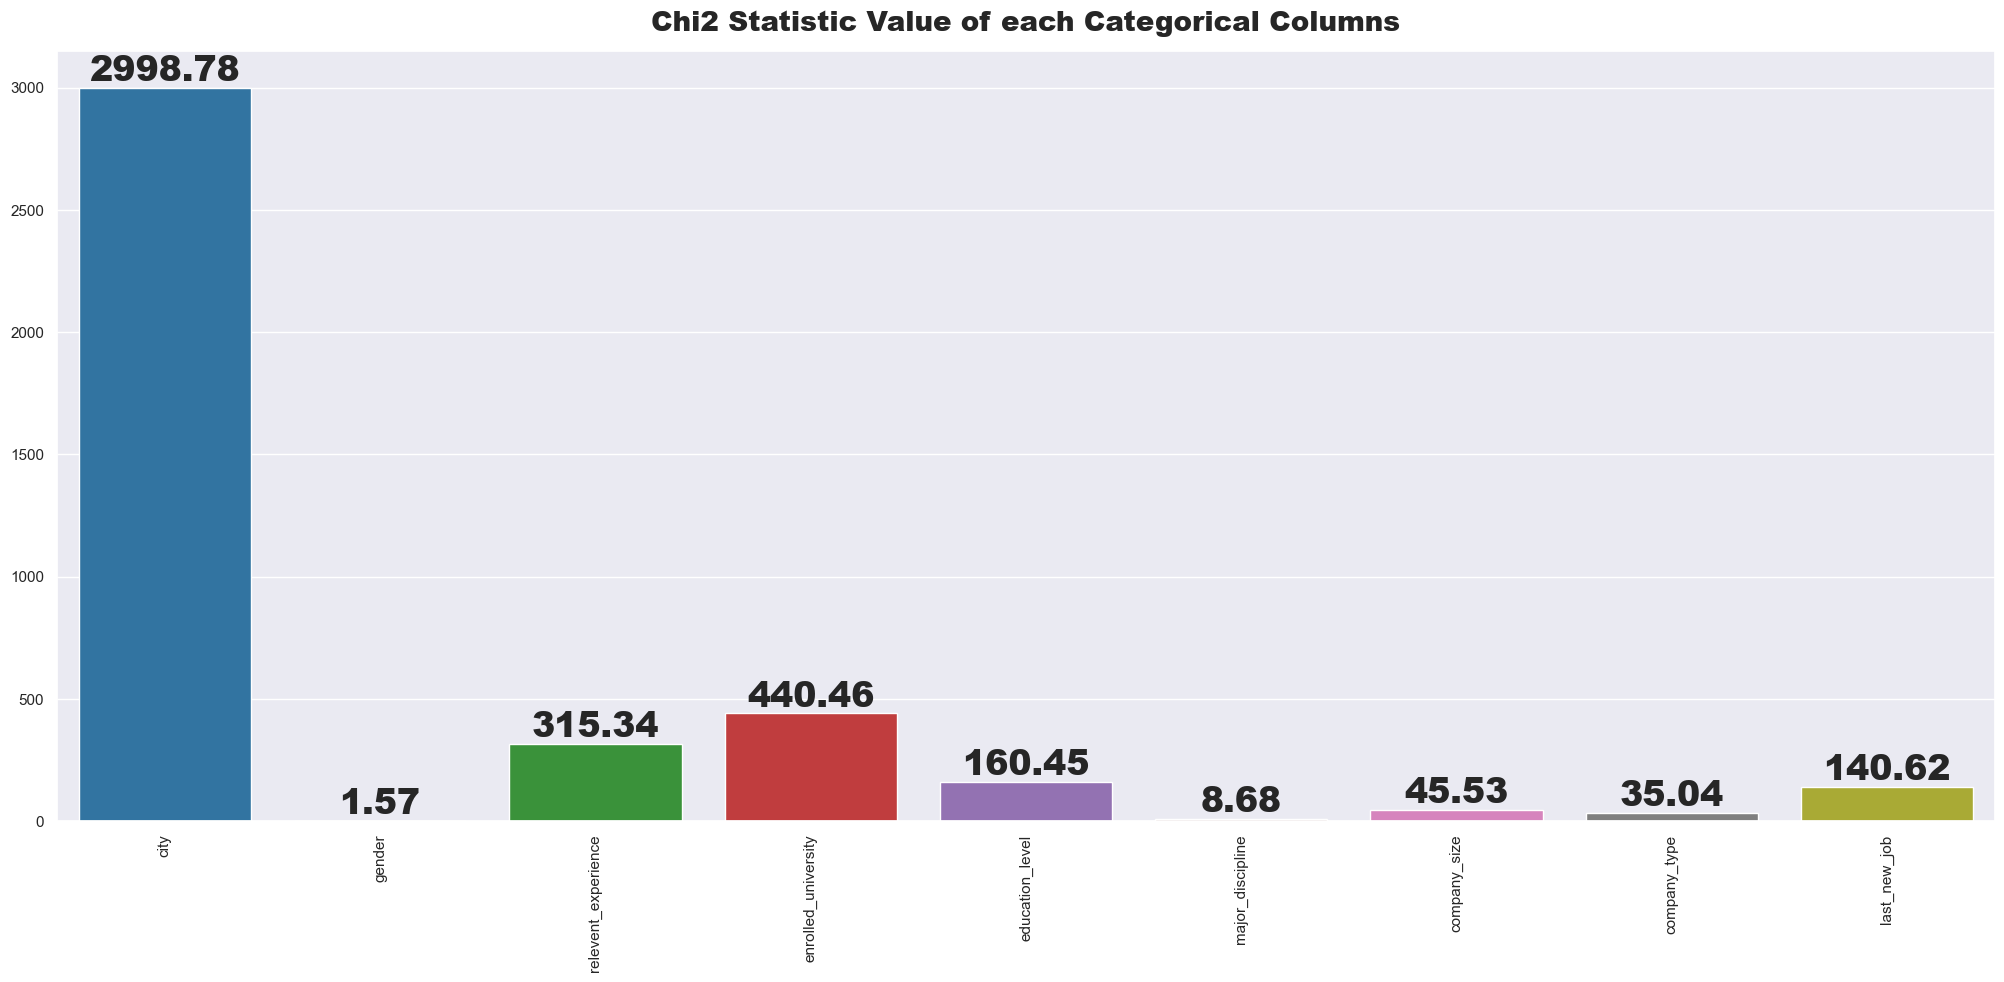

In [220]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(25, 10))
sns.barplot(x=columns, y=values, palette=sns.color_palette("tab10"))
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=20,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",fontweight="black",size=25)

plt.show()


In [221]:
test_df = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
test_df["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]
test_df

Features  Chi_2 Statistic                 P_value
0                 city      2998.777229  0.00000000000000000000
1               gender         1.567228  0.45675232710915714129
2  relevent_experience       315.338577  0.00000000000000000000
3  enrolled_university       440.458589  0.00000000000000000000
4      education_level       160.454092  0.00000000000000000000
5     major_discipline         8.683774  0.12236179432062115058
6         company_size        45.531755  0.00000010781332047561
7         company_type        35.035475  0.00000148032029947776
8         last_new_job       140.620659  0.00000000000000000000

## Checking Feature Importance

In [222]:
data1.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624   Male   
3        33241  city_115                   0.789   Male   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience       no_enrollment        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline  experience company_size    company_type last_new_job  \
0             STEM        21.0          NaN             NaN            1   
1             STEM        15.0        50-99         Pvt Ltd           >4   
2             STEM         5.0          NaN             NaN        never   
3  Business Degree         0.0          NaN         Pvt Ltd        never   
4             STEM        21.0        50-99  Funded Startup            4   

   training_hours  target  id  
0              36     1.0   0  
1              47     0.0   1  
2              83     0.0   2  
3              52     1.0   3  
4               8     0.0   4

In [223]:
data1.drop(["id", "company_size", "company_type", "enrollee_id"], axis=1, inplace=True)
data1.head()

city  city_development_index gender      relevent_experience  \
0  city_103                   0.920   Male  Has relevent experience   
1   city_40                   0.776   Male   No relevent experience   
2   city_21                   0.624   Male   No relevent experience   
3  city_115                   0.789   Male   No relevent experience   
4  city_162                   0.767   Male  Has relevent experience   

  enrolled_university education_level major_discipline  experience  \
0       no_enrollment        Graduate             STEM        21.0   
1       no_enrollment        Graduate             STEM        15.0   
2    Full time course        Graduate             STEM         5.0   
3       no_enrollment        Graduate  Business Degree         0.0   
4       no_enrollment         Masters             STEM        21.0   

  last_new_job  training_hours  target  
0            1              36     1.0  
1           >4              47     0.0  
2        never              83     0.0  
3        never              52     1.0  
4            4               8     0.0

In [224]:
# Data Splitting
x = data1.drop(["target"], axis=1)
y = data1["target"]

In [225]:
from feature_engine.encoding import OrdinalEncoder

encoder = OrdinalEncoder(variables=['city', 'gender','relevent_experience','enrolled_university', 'education_level', 'major_discipline', 'last_new_job'],ignore_format=True)
x = encoder.fit_transform(x, y)
x.head()

city  city_development_index  gender  relevent_experience  \
0    57                   0.920       0                    0   
1    41                   0.776       0                    1   
2   114                   0.624       0                    1   
3   102                   0.789       0                    1   
4    81                   0.767       0                    0   

   enrolled_university  education_level  major_discipline  experience  \
0                    0                4                 3        21.0   
1                    0                4                 3        15.0   
2                    2                4                 3         5.0   
3                    0                4                 4         0.0   
4                    0                3                 3        21.0   

   last_new_job  training_hours  
0             4              36  
1             0              47  
2             5              83  
3             5              52  
4             1               8

In [226]:
# Importing StandardScaler for Data Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
x[["city_development_index", "city", "experience", "training_hours"]] = scaler.fit_transform(x[["city_development_index", "city", "experience", "training_hours"]])


In [227]:
x.head()


city  city_development_index  gender  relevent_experience  \
0  0.010111                0.738919       0                    0   
1 -0.465911               -0.428410       0                    1   
2  1.705941               -1.660590       0                    1   
3  1.348924               -0.323026       0                    1   
4  0.724145               -0.501368       0                    0   

   enrolled_university  education_level  major_discipline  experience  \
0                    0                4                 3    1.611132   
1                    0                4                 3    0.724259   
2                    2                4                 3   -0.753863   
3                    0                4                 4   -1.492924   
4                    0                3                 3    1.611132   

   last_new_job  training_hours  
0             4       -0.488985  
1             0       -0.305825  
2             5        0.293607  
3             5       -0.222571  
4             1       -0.955209

### Feature_importance in LogisticRegression

<Axes: ylabel='Feature'>

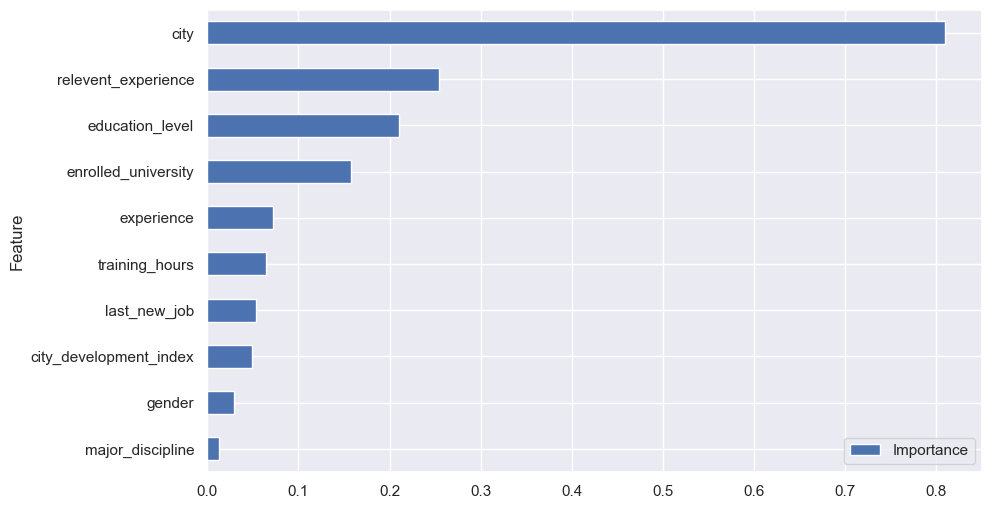

In [228]:
# applying LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
x = scaler.fit_transform(x)

logit = LogisticRegression()
logit.fit(x, y)



coefficients = logit.coef_[0]

feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

Text(0.5, 1.0, 'Permutation Importance with Standard Deviation')

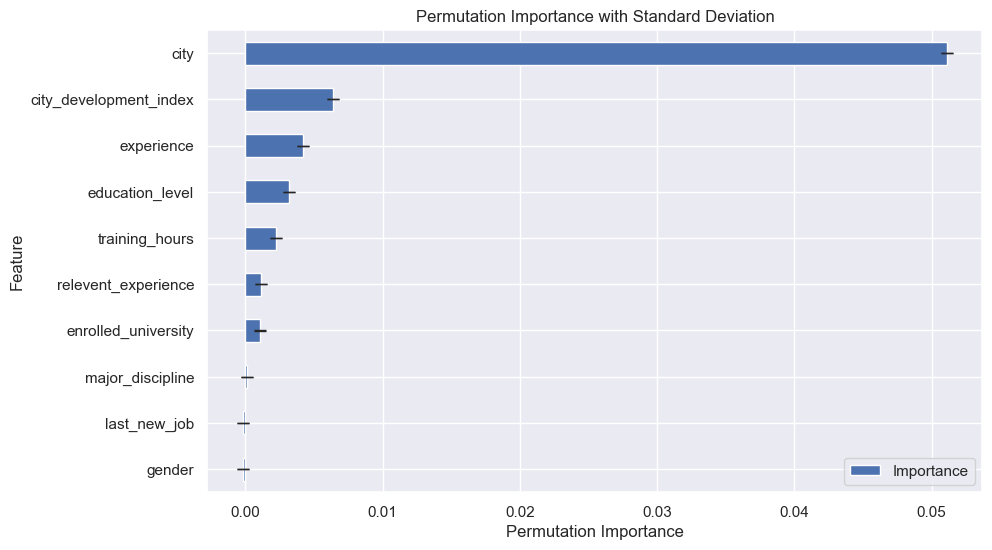

In [229]:
result = permutation_importance(logit, x, y, n_repeats=10, random_state=42)


feature_importance = pd.DataFrame({'Feature': x.columns,
                                   'Importance': result.importances_mean,
                                   'Standard Deviation': result.importances_std})
feature_importance = feature_importance.sort_values('Importance', ascending=True)


ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), yerr='Standard Deviation', capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance with Standard Deviation')

### Feature_importance in DecisionTree

<Axes: ylabel='None'>

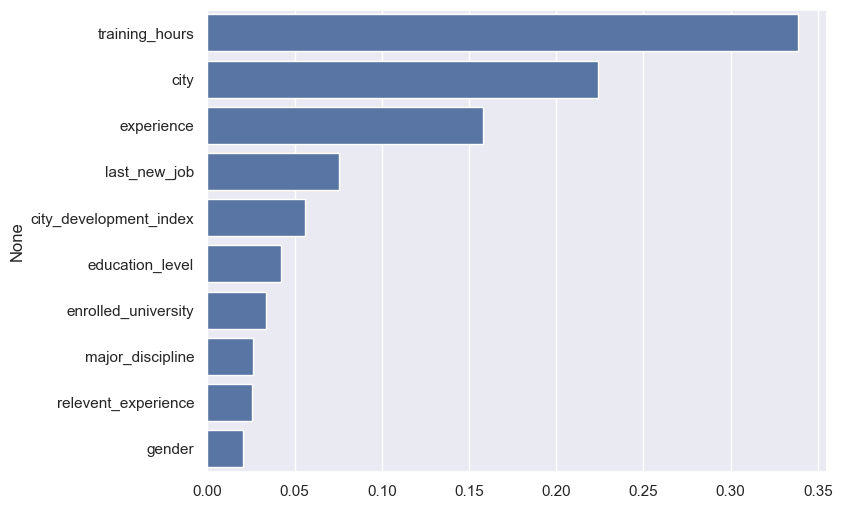

In [230]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini')
# Fit the decision tree classifier
clf = clf.fit(x, y)

# Print the feature importances
feature_importances = clf.feature_importances_



# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = x.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(x=sorted_importances, y=sorted_feature_names)



Text(0.5, 1.0, 'Permutation Importance with Standard Deviation')

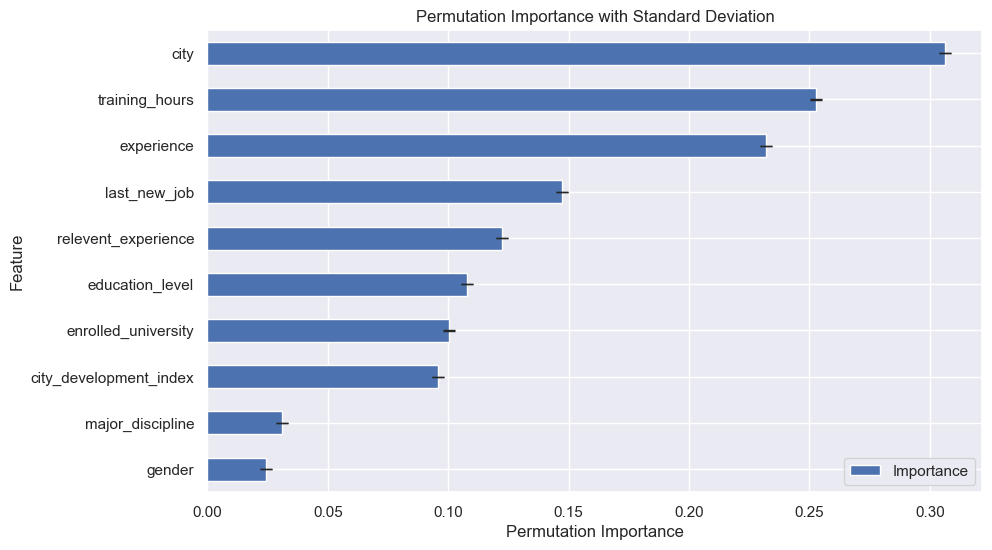

In [231]:
result = permutation_importance(clf, x, y, n_repeats=10, random_state=42)


feature_importance = pd.DataFrame({'Feature': x.columns,
                                   'Importance': result.importances_mean,
                                   'Standard Deviation': result.importances_std})
feature_importance = feature_importance.sort_values('Importance', ascending=True)


ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), yerr='Standard Deviation', capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance with Standard Deviation')

### Feature_importance in RandomForest

<Axes: ylabel='None'>

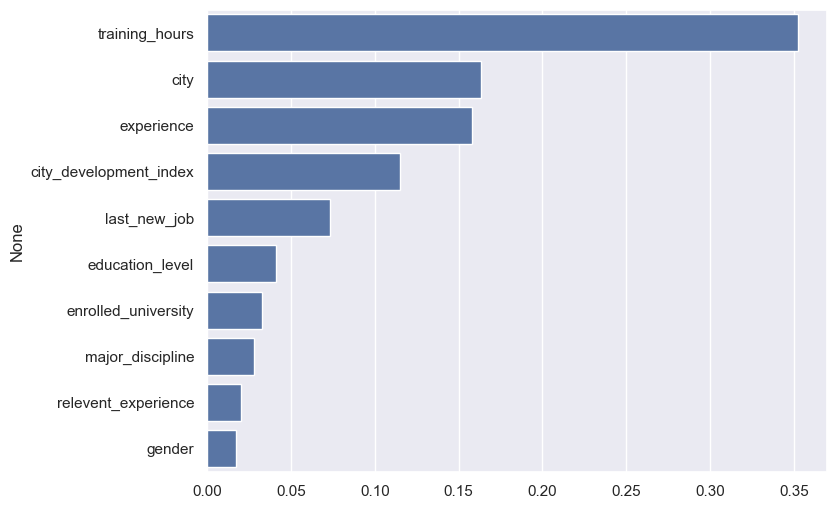

In [232]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x, y)

# Print the feature importances
feature_importances = rf.feature_importances_



# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = x.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(x=sorted_importances, y=sorted_feature_names)


Text(0.5, 1.0, 'Permutation Importance with Standard Deviation')

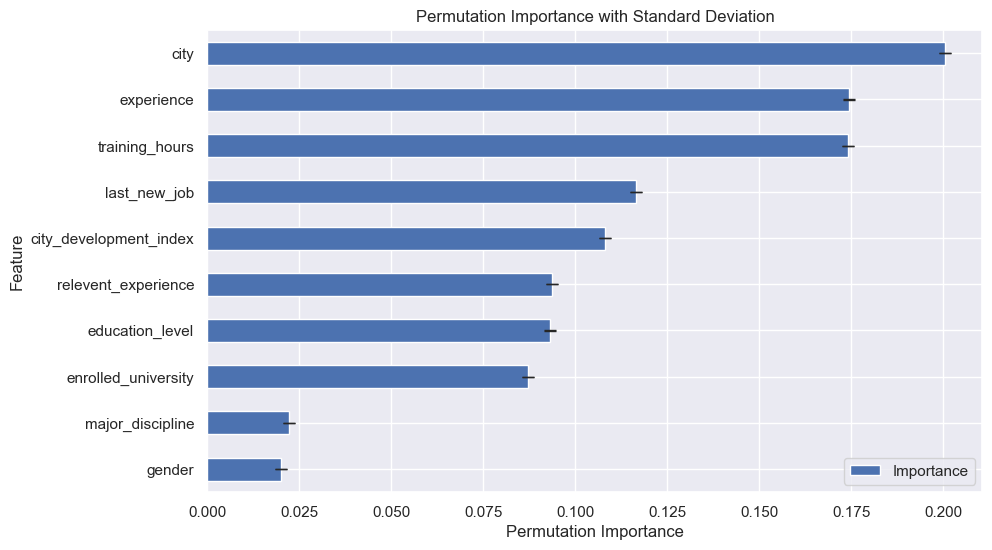

In [233]:
result = permutation_importance(rf, x, y, n_repeats=10, random_state=42)


feature_importance = pd.DataFrame({'Feature': x.columns,
                                   'Importance': result.importances_mean,
                                   'Standard Deviation': result.importances_std})
feature_importance = feature_importance.sort_values('Importance', ascending=True)


ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), yerr='Standard Deviation', capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance with Standard Deviation')

### Feature_importance in AdaBoostClassifier

<Axes: ylabel='None'>

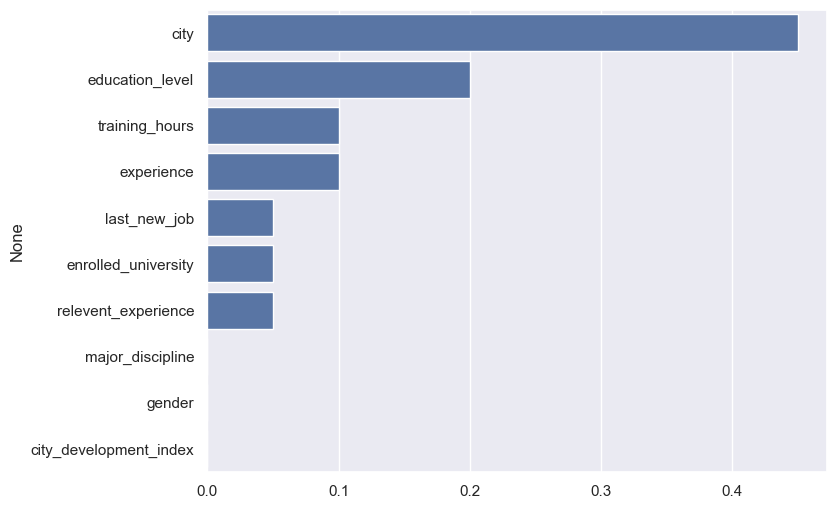

In [234]:
from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier(n_estimators=20,random_state=0)
ab_model.fit(x, y)

# Print the feature importances
feature_importances = ab_model.feature_importances_



# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = x.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(x=sorted_importances, y=sorted_feature_names)


Text(0.5, 1.0, 'Permutation Importance with Standard Deviation')

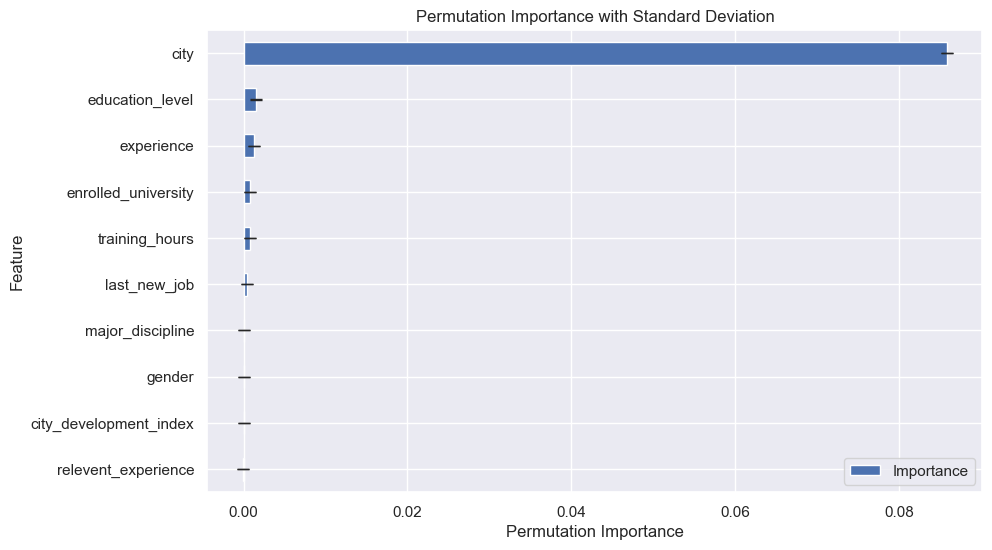

In [235]:
result = permutation_importance(ab_model, x, y, n_repeats=10, random_state=42)


feature_importance = pd.DataFrame({'Feature': x.columns,
                                   'Importance': result.importances_mean,
                                   'Standard Deviation': result.importances_std})
feature_importance = feature_importance.sort_values('Importance', ascending=True)


ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), yerr='Standard Deviation', capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance with Standard Deviation')

### Feature_importance in GradientBoostingClassifier

<Axes: ylabel='None'>

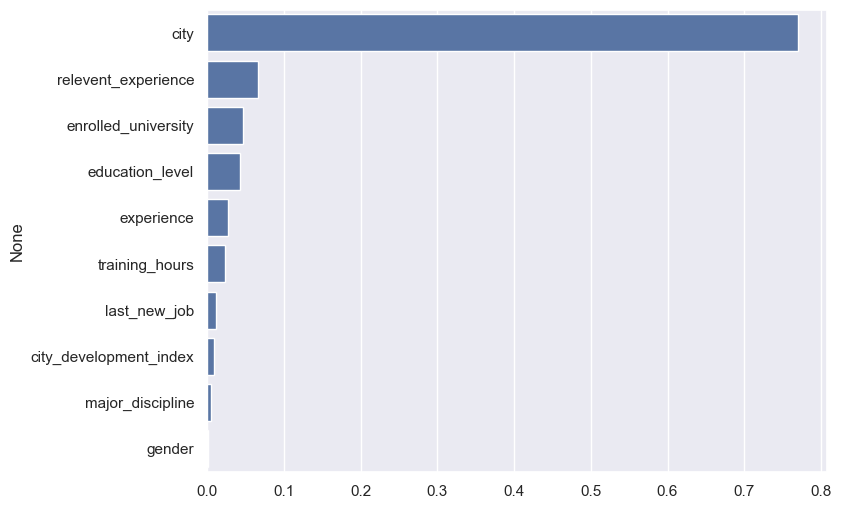

In [236]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(x, y)

# Print the feature importances
feature_importances = model.feature_importances_



# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = x.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(x=sorted_importances, y=sorted_feature_names)


Text(0.5, 1.0, 'Permutation Importance with Standard Deviation')

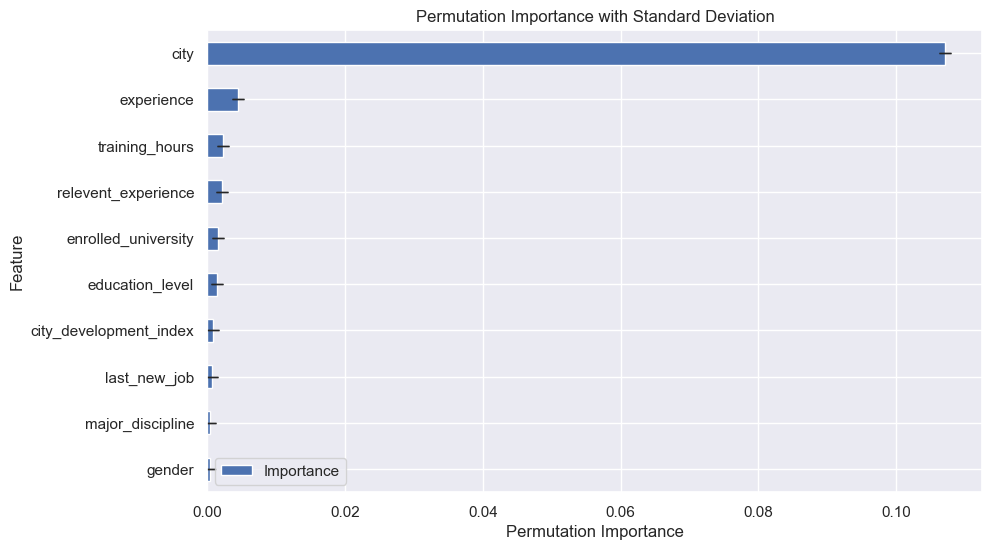

In [237]:
result = permutation_importance(model, x, y, n_repeats=10, random_state=42)


feature_importance = pd.DataFrame({'Feature': x.columns,
                                   'Importance': result.importances_mean,
                                   'Standard Deviation': result.importances_std})
feature_importance = feature_importance.sort_values('Importance', ascending=True)


ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), yerr='Standard Deviation', capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance with Standard Deviation')

### Feature_importance in XGBClassifier

<Axes: ylabel='None'>

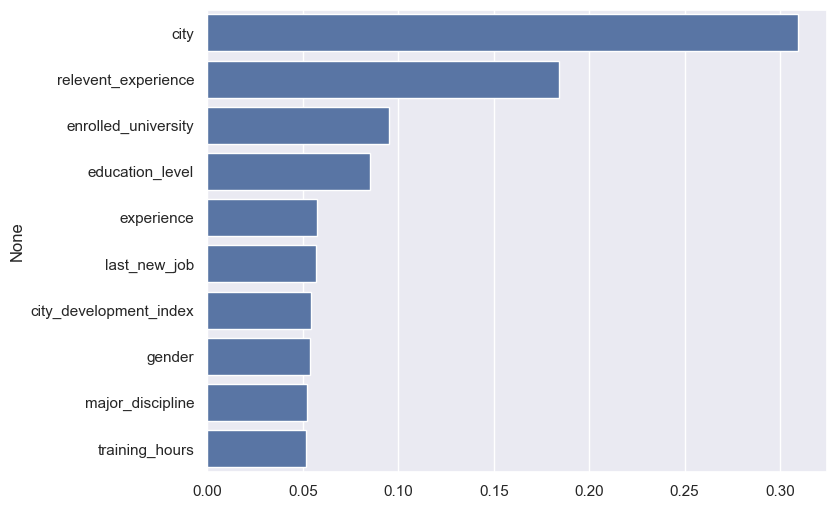

In [238]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x, y)

# Print the feature importances
feature_importances = model.feature_importances_



# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = x.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(x=sorted_importances, y=sorted_feature_names)


Text(0.5, 1.0, 'Permutation Importance with Standard Deviation')

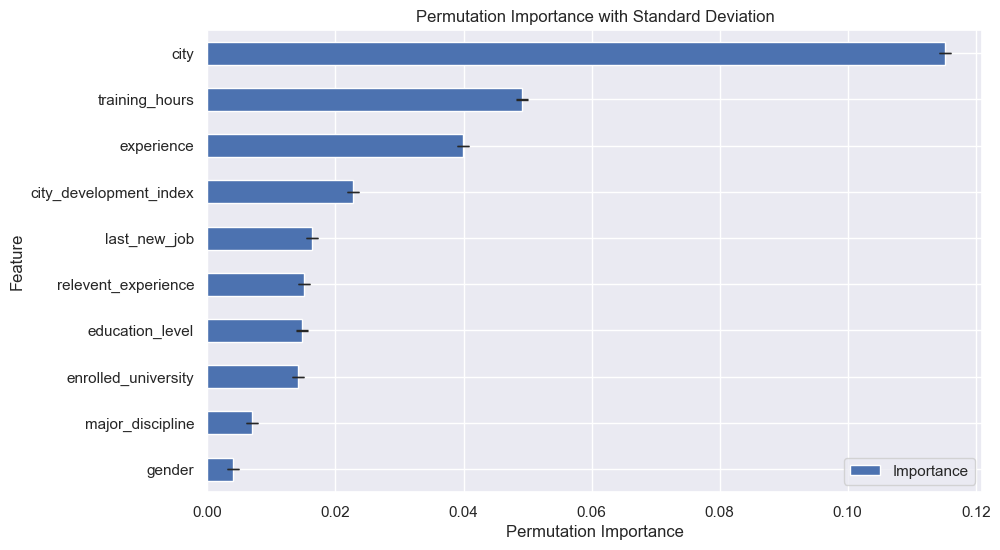

In [239]:
result = permutation_importance(model, x, y, n_repeats=10, random_state=42)


feature_importance = pd.DataFrame({'Feature': x.columns,
                                   'Importance': result.importances_mean,
                                   'Standard Deviation': result.importances_std})
feature_importance = feature_importance.sort_values('Importance', ascending=True)


ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), yerr='Standard Deviation', capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance with Standard Deviation')

# Pre-Processing

In [222]:
data["target"].value_counts()

target
0.0    14381
1.0     4777
Name: count, dtype: int64

In [223]:
Y_value_counts = data.groupby('target')['target'].count()
print('The number of candidates that are prone to leaving company after training ',Y_value_counts[1],',',round(Y_value_counts[1]/data.shape[0]*100,3),'%')
print('The number of candidates that are not prone leaving company after training ',Y_value_counts[0],',',round(Y_value_counts[0]/data.shape[0]*100,3),'%')

The number of candidates that are prone to leaving company after training  4777 , 24.935 %
The number of candidates that are not prone leaving company after training  14381 , 75.065 %


* Dataset is Imbalanced, so need to balance it.

## b) Duplicate Values Treatment

In [224]:
# Dataset Duplicate Value Count
print(f"The total number of duplicated observations in the data : {data.duplicated().sum()}")
print("*"*100)
dups = data.duplicated()
print("No of duplicate rows = %d" %(dups.sum()))
data[dups]

The total number of duplicated observations in the data : 0
****************************************************************************************************
No of duplicate rows = 0


Empty DataFrame
Columns: [enrollee_id, city, city_development_index, gender, relevent_experience, enrolled_university, education_level, major_discipline, experience, company_size, company_type, last_new_job, training_hours, target]
Index: []

In [225]:
# Dataset Duplicate Value Count
print(f"The total number of duplicated observations in the dataset: {data.duplicated().sum()}")

The total number of duplicated observations in the dataset: 0


## c) Dropping Columns

In [226]:
# Missing values
print("Is there any missing value present or not ?", data.isnull().values.any())
print("**************************************************************************")
print("Number of missing values")
print("-------------------------------------")
missing_values = data.isnull().sum()
print(missing_values)
print("**************************************************************************")
print("Missing Percentage of Null Values")
print("-------------------------------------")
missing_percentage = data.isnull().sum()/len(data)*100
print(missing_percentage.sort_values(ascending=False))

Is there any missing value present or not ? True
**************************************************************************
Number of missing values
-------------------------------------
enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64
**************************************************************************
Missing Percentage of Null Values
-------------------------------------
company_type              32.049274
company_size              30.994885
gender                    23.530640
major_discipline          14.683161
education_level            2.401086
last_new_job               2.207955
enr

In [227]:
missing_value_df = pd.DataFrame({'missing_count': data.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

missing_count  missing_percentage
gender                        4508           23.530640
enrolled_university            386            2.014824
education_level                460            2.401086
major_discipline              2813           14.683161
experience                      65            0.339284
company_size                  5938           30.994885
company_type                  6140           32.049274
last_new_job                   423            2.207955

In [228]:
# Dropping unwanted columns
data = data.drop(["enrollee_id","gender", "major_discipline", "company_size", "company_type"], axis=1)
print('data:',data.shape)
print('-'*50)
print(data.columns.values)

data: (19158, 9)
--------------------------------------------------
['city' 'city_development_index' 'relevent_experience'
 'enrolled_university' 'education_level' 'experience' 'last_new_job'
 'training_hours' 'target']


## d ) Splitting The dataset into Independent and Dependent variables

In [229]:
x = data.drop(["target"], axis=1)
y = data["target"]

In [230]:
print(x.shape)
print(y.shape)

(19158, 8)
(19158,)


In [231]:
x.head()

city  city_development_index      relevent_experience  \
0  city_103                   0.920  Has relevent experience   
1   city_40                   0.776   No relevent experience   
2   city_21                   0.624   No relevent experience   
3  city_115                   0.789   No relevent experience   
4  city_162                   0.767  Has relevent experience   

  enrolled_university education_level experience last_new_job  training_hours  
0       no_enrollment        Graduate        >20            1              36  
1       no_enrollment        Graduate         15           >4              47  
2    Full time course        Graduate          5        never              83  
3                 NaN        Graduate         <1        never              52  
4       no_enrollment         Masters        >20            4               8

## e) Splitting The Dataset into Train and Test

In [232]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=101)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(14368, 8) (14368,)
(4790, 8) (4790,)


In [233]:
print("Class Distribution on data :")
print(data["target"].value_counts()/data.shape[0]*100)
print("*******************************************")
print(f"Class Distribution on y_train : \n{y_train.value_counts()/y_train.shape[0]*100}")
print("*******************************************")
print(f"Class Distribution on y_test : \n{y_test.value_counts()/y_test.shape[0]*100}")

Class Distribution on data :
target
0.0    75.065247
1.0    24.934753
Name: count, dtype: float64
*******************************************
Class Distribution on y_train : 
target
0.0    75.062639
1.0    24.937361
Name: count, dtype: float64
*******************************************
Class Distribution on y_test : 
target
0.0    75.073069
1.0    24.926931
Name: count, dtype: float64


## f) Data Cleaning

In [234]:
# # Labelling Categories in Numerical Features
x_train.loc[x_train['experience'] == '>20', 'experience'] = '21'
x_train.loc[x_train['experience'] == '<1', 'experience'] = '0'
x_train['experience'] = x_train['experience'].astype(float)
x_train['experience'].unique()

array([ 2.,  7.,  8.,  9., 10.,  6., 16.,  3., 12.,  0., 11., nan, 21.,
       13.,  4.,  5., 14., 17., 15.,  1., 20., 18., 19.])

In [235]:
# # Labelling Categories in Numerical Features
x_test.loc[x_test['experience'] == '>20', 'experience'] = '21'
x_test.loc[x_test['experience'] == '<1', 'experience'] = '0'
x_test['experience'] = x_test['experience'].astype(float)
x_test['experience'].unique()

array([14.,  9.,  3., 21.,  6.,  8., 11.,  7., 15., 19.,  4.,  2.,  5.,
       13., 12., 17., 16.,  0., 10., 18.,  1., 20., nan])

## g) Missing Value Impution

In [236]:
# Checking missing values in data
# Missing values
print("Is there any missing value present or not ?", x_train.isnull().values.any())
print("**************************************************************************")
print("Number of missing values")
print("-------------------------------------")
missing_values = x_train.isnull().sum()
print(missing_values)
print("**************************************************************************")
print("Missing Percentage of Null Values")
print("-------------------------------------")
missing_percentage = x_train.isnull().sum()/len(x_train)*100
print(missing_percentage.sort_values(ascending=False))

print("==========================================================================")
missing_value_df = pd.DataFrame({'missing_count': x_train.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

print("==========================================================================")
categorical_features = ["city", "relevent_experience", "enrolled_university", "education_level", "last_new_job"]
for i in categorical_features:
    print(f"{i} : {x_train[i].unique()}")
    print(x_train[i].value_counts())
    print("===================================================================================")
    
numerical_features = ["city_development_index", "experience", "training_hours"]
for i in numerical_features:
    print(f"{i} : {x_train[i].unique()}")
    print(f"Mean : {x_train[i].mean()}")
    print(f"Median : {x_train[i].median()}")
    print(f"Standard Deviation : {x_train[i].std()}")
    Q1 = x_train[i].quantile(0.25)
    Q3 = x_train[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3+1.5*IQR
    lower_bound = Q1-1.5*IQR
    outliers = x_train[i][((x_train[i]<(Q1-1.5*IQR)) | (x_train[i]>(Q3+1.5*IQR)))]
    print(f"Quintile1(Q1) : {x_train[i].quantile(0.25)}")
    print(f"Quintile1(Q3) : {x_train[i].quantile(0.75)}")
    print(f"IQR : {IQR}")
    print(f"upper_bound : {upper_bound}")
    print(f"lower_bound : {lower_bound}")
    print(f"No. of Outliers : {outliers.count()}")
    print("===================================================================================")

Is there any missing value present or not ? True
**************************************************************************
Number of missing values
-------------------------------------
city                        0
city_development_index      0
relevent_experience         0
enrolled_university       298
education_level           344
experience                 45
last_new_job              333
training_hours              0
dtype: int64
**************************************************************************
Missing Percentage of Null Values
-------------------------------------
education_level           2.394209
last_new_job              2.317650
enrolled_university       2.074053
experience                0.313196
city                      0.000000
city_development_index    0.000000
relevent_experience       0.000000
training_hours            0.000000
dtype: float64
city : ['city_103' 'city_16' 'city_21' 'city_61' 'city_160' 'city_70' 'city_134'
 'city_28' 'city_90' 'city_138' 'city

In [237]:
# Checking missing values in data
# Missing values
print("Is there any missing value present or not ?", x_test.isnull().values.any())
print("**************************************************************************")
print("Number of missing values")
print("-------------------------------------")
missing_values = x_test.isnull().sum()
print(missing_values)
print("**************************************************************************")
print("Missing Percentage of Null Values")
print("-------------------------------------")
missing_percentage = x_test.isnull().sum()/len(x_test)*100
print(missing_percentage.sort_values(ascending=False))

print("==========================================================================")
missing_value_df = pd.DataFrame({'missing_count': x_test.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

print("==========================================================================")
categorical_features = ["city", "relevent_experience", "enrolled_university", "education_level", "last_new_job"]
for i in categorical_features:
    print(f"{i} : {x_train[i].unique()}")
    print(x_train[i].value_counts())
    print("===================================================================================")
    
numerical_features = ["city_development_index", "experience", "training_hours"]
for i in numerical_features:
    print(f"{i} : {x_test[i].unique()}")
    print(f"Mean : {x_test[i].mean()}")
    print(f"Median : {x_test[i].median()}")
    print(f"Standard Deviation : {x_test[i].std()}")
    Q1 = x_train[i].quantile(0.25)
    Q3 = x_train[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3+1.5*IQR
    lower_bound = Q1-1.5*IQR
    outliers = x_test[i][((x_test[i]<(Q1-1.5*IQR)) | (x_test[i]>(Q3+1.5*IQR)))]
    print(f"Quintile1(Q1) : {x_test[i].quantile(0.25)}")
    print(f"Quintile1(Q3) : {x_test[i].quantile(0.75)}")
    print(f"IQR : {IQR}")
    print(f"upper_bound : {upper_bound}")
    print(f"lower_bound : {lower_bound}")
    print(f"No. of Outliers : {outliers.count()}")
    print("===================================================================================")

Is there any missing value present or not ? True
**************************************************************************
Number of missing values
-------------------------------------
city                        0
city_development_index      0
relevent_experience         0
enrolled_university        88
education_level           116
experience                 20
last_new_job               90
training_hours              0
dtype: int64
**************************************************************************
Missing Percentage of Null Values
-------------------------------------
education_level           2.421712
last_new_job              1.878914
enrolled_university       1.837161
experience                0.417537
city                      0.000000
city_development_index    0.000000
relevent_experience       0.000000
training_hours            0.000000
dtype: float64
city : ['city_103' 'city_16' 'city_21' 'city_61' 'city_160' 'city_70' 'city_134'
 'city_28' 'city_90' 'city_138' 'city

In [238]:
# importing SiumpleImputer
from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(missing_values=np.nan, strategy="most_frequent").set_output(transform="pandas")
x_train[["education_level", "last_new_job", "enrolled_university"]] = imputer1.fit_transform(x_train[["education_level", "last_new_job", "enrolled_university"]])
x_test[["education_level", "last_new_job", "enrolled_university"]] = imputer1.transform(x_test[["education_level", "last_new_job", "enrolled_university"]])

imputer2 = SimpleImputer(missing_values=np.nan, strategy="mean").set_output(transform="pandas")
x_train[["experience"]] = imputer2.fit_transform(x_train[["experience"]])
x_test[["experience"]] = imputer2.transform(x_test[["experience"]])

In [239]:
x_train.head()

city  city_development_index      relevent_experience  \
873    city_103                   0.920   No relevent experience   
13656   city_16                   0.910  Has relevent experience   
14693   city_21                   0.624  Has relevent experience   
680     city_61                   0.913  Has relevent experience   
18333  city_160                   0.920  Has relevent experience   

      enrolled_university education_level  experience last_new_job  \
873         no_enrollment        Graduate         2.0            1   
13656       no_enrollment        Graduate         7.0            1   
14693    Full time course         Masters         2.0            1   
680         no_enrollment     High School         8.0            1   
18333       no_enrollment        Graduate         9.0            3   

       training_hours  
873                10  
13656              30  
14693               7  
680                20  
18333              43

In [240]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14368 entries, 873 to 14128
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    14368 non-null  object 
 1   city_development_index  14368 non-null  float64
 2   relevent_experience     14368 non-null  object 
 3   enrolled_university     14368 non-null  object 
 4   education_level         14368 non-null  object 
 5   experience              14368 non-null  float64
 6   last_new_job            14368 non-null  object 
 7   training_hours          14368 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 1010.2+ KB


In [241]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4790 entries, 16898 to 4224
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    4790 non-null   object 
 1   city_development_index  4790 non-null   float64
 2   relevent_experience     4790 non-null   object 
 3   enrolled_university     4790 non-null   object 
 4   education_level         4790 non-null   object 
 5   experience              4790 non-null   float64
 6   last_new_job            4790 non-null   object 
 7   training_hours          4790 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 336.8+ KB


In [242]:
# Checking missing values in data
# Missing values
print("Is there any missing value present or not ?", x_train.isnull().values.any())
print("**************************************************************************")
print("Number of missing values")
print("-------------------------------------")
missing_values = x_train.isnull().sum()
print(missing_values)
print("**************************************************************************")
print("Missing Percentage of Null Values")
print("-------------------------------------")
missing_percentage = x_train.isnull().sum()/len(x_train)*100
print(missing_percentage.sort_values(ascending=False))

print("==========================================================================")
missing_value_df = pd.DataFrame({'missing_count': x_train.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

print("==========================================================================")
categorical_features = ["city", "relevent_experience", "enrolled_university", "education_level", "last_new_job"]
for i in categorical_features:
    print(f"{i} : {x_train[i].unique()}")
    print(x_train[i].value_counts())
    print("===================================================================================")
    
numerical_features = ["city_development_index", "experience", "training_hours"]
for i in numerical_features:
    print(f"{i} : {x_train[i].unique()}")
    print(f"Mean : {x_train[i].mean()}")
    print(f"Median : {x_train[i].median()}")
    print(f"Standard Deviation : {x_train[i].std()}")
    Q1 = x_train[i].quantile(0.25)
    Q3 = x_train[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3+1.5*IQR
    lower_bound = Q1-1.5*IQR
    outliers = x_train[i][((x_train[i]<(Q1-1.5*IQR)) | (x_train[i]>(Q3+1.5*IQR)))]
    print(f"Quintile1(Q1) : {x_train[i].quantile(0.25)}")
    print(f"Quintile1(Q3) : {x_train[i].quantile(0.75)}")
    print(f"IQR : {IQR}")
    print(f"upper_bound : {upper_bound}")
    print(f"lower_bound : {lower_bound}")
    print(f"No. of Outliers : {outliers.count()}")
    print("===================================================================================")

Is there any missing value present or not ? False
**************************************************************************
Number of missing values
-------------------------------------
city                      0
city_development_index    0
relevent_experience       0
enrolled_university       0
education_level           0
experience                0
last_new_job              0
training_hours            0
dtype: int64
**************************************************************************
Missing Percentage of Null Values
-------------------------------------
city                      0.0
city_development_index    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
experience                0.0
last_new_job              0.0
training_hours            0.0
dtype: float64
city : ['city_103' 'city_16' 'city_21' 'city_61' 'city_160' 'city_70' 'city_134'
 'city_28' 'city_90' 'city_138' 'city_67' 'city_114' 'city_36' 'city_116'
 'city_73' 'city_6

In [243]:
# Checking missing values in data
# Missing values
print("Is there any missing value present or not ?", x_test.isnull().values.any())
print("**************************************************************************")
print("Number of missing values")
print("-------------------------------------")
missing_values = x_test.isnull().sum()
print(missing_values)
print("**************************************************************************")
print("Missing Percentage of Null Values")
print("-------------------------------------")
missing_percentage = x_test.isnull().sum()/len(x_test)*100
print(missing_percentage.sort_values(ascending=False))

print("==========================================================================")
missing_value_df = pd.DataFrame({'missing_count': x_test.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

print("==========================================================================")
categorical_features = ["city", "relevent_experience", "enrolled_university", "education_level", "last_new_job"]
for i in categorical_features:
    print(f"{i} : {x_train[i].unique()}")
    print(x_train[i].value_counts())
    print("===================================================================================")
    
numerical_features = ["city_development_index", "experience", "training_hours"]
for i in numerical_features:
    print(f"{i} : {x_test[i].unique()}")
    print(f"Mean : {x_test[i].mean()}")
    print(f"Median : {x_test[i].median()}")
    print(f"Standard Deviation : {x_test[i].std()}")
    Q1 = x_train[i].quantile(0.25)
    Q3 = x_train[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3+1.5*IQR
    lower_bound = Q1-1.5*IQR
    outliers = x_test[i][((x_test[i]<(Q1-1.5*IQR)) | (x_test[i]>(Q3+1.5*IQR)))]
    print(f"Quintile1(Q1) : {x_test[i].quantile(0.25)}")
    print(f"Quintile1(Q3) : {x_test[i].quantile(0.75)}")
    print(f"IQR : {IQR}")
    print(f"upper_bound : {upper_bound}")
    print(f"lower_bound : {lower_bound}")
    print(f"No. of Outliers : {outliers.count()}")
    print("===================================================================================")

Is there any missing value present or not ? False
**************************************************************************
Number of missing values
-------------------------------------
city                      0
city_development_index    0
relevent_experience       0
enrolled_university       0
education_level           0
experience                0
last_new_job              0
training_hours            0
dtype: int64
**************************************************************************
Missing Percentage of Null Values
-------------------------------------
city                      0.0
city_development_index    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
experience                0.0
last_new_job              0.0
training_hours            0.0
dtype: float64
city : ['city_103' 'city_16' 'city_21' 'city_61' 'city_160' 'city_70' 'city_134'
 'city_28' 'city_90' 'city_138' 'city_67' 'city_114' 'city_36' 'city_116'
 'city_73' 'city_6

In [244]:
for i in x_train.columns:
    print("******************************", i, "******************************************")
    print()
    print(set(x_train[i].tolist()))
    print()

****************************** city ******************************************

{'city_11', 'city_149', 'city_158', 'city_105', 'city_72', 'city_139', 'city_157', 'city_100', 'city_150', 'city_67', 'city_99', 'city_59', 'city_45', 'city_165', 'city_74', 'city_54', 'city_102', 'city_134', 'city_90', 'city_143', 'city_103', 'city_71', 'city_65', 'city_133', 'city_115', 'city_9', 'city_50', 'city_55', 'city_129', 'city_75', 'city_24', 'city_126', 'city_109', 'city_13', 'city_40', 'city_91', 'city_121', 'city_57', 'city_131', 'city_80', 'city_10', 'city_82', 'city_160', 'city_1', 'city_44', 'city_84', 'city_118', 'city_141', 'city_30', 'city_89', 'city_26', 'city_180', 'city_179', 'city_138', 'city_53', 'city_76', 'city_145', 'city_83', 'city_81', 'city_167', 'city_127', 'city_176', 'city_64', 'city_120', 'city_173', 'city_23', 'city_20', 'city_116', 'city_152', 'city_101', 'city_46', 'city_78', 'city_175', 'city_128', 'city_159', 'city_25', 'city_43', 'city_144', 'city_136', 'city_107', '

In [245]:
for i in x_test.columns:
    print("******************************", i, "******************************************")
    print()
    print(set(x_train[i].tolist()))
    print()

****************************** city ******************************************

{'city_11', 'city_149', 'city_158', 'city_105', 'city_72', 'city_139', 'city_157', 'city_100', 'city_150', 'city_67', 'city_99', 'city_59', 'city_45', 'city_165', 'city_74', 'city_54', 'city_102', 'city_134', 'city_90', 'city_143', 'city_103', 'city_71', 'city_65', 'city_133', 'city_115', 'city_9', 'city_50', 'city_55', 'city_129', 'city_75', 'city_24', 'city_126', 'city_109', 'city_13', 'city_40', 'city_91', 'city_121', 'city_57', 'city_131', 'city_80', 'city_10', 'city_82', 'city_160', 'city_1', 'city_44', 'city_84', 'city_118', 'city_141', 'city_30', 'city_89', 'city_26', 'city_180', 'city_179', 'city_138', 'city_53', 'city_76', 'city_145', 'city_83', 'city_81', 'city_167', 'city_127', 'city_176', 'city_64', 'city_120', 'city_173', 'city_23', 'city_20', 'city_116', 'city_152', 'city_101', 'city_46', 'city_78', 'city_175', 'city_128', 'city_159', 'city_25', 'city_43', 'city_144', 'city_136', 'city_107', '

## h) Data Encoding

In [246]:
# from feature_engine.encoding import OrdinalEncoder

# ord_encoder = OrdinalEncoder(variables=['city'],ignore_format=True)
# x_train = ord_encoder.fit_transform(x_train, y_train)
# x_test = ord_encoder.transform(x_test)

In [247]:
x_test.isnull().sum()

city                      0
city_development_index    0
relevent_experience       0
enrolled_university       0
education_level           0
experience                0
last_new_job              0
training_hours            0
dtype: int64

In [248]:
from feature_engine.encoding import OneHotEncoder

ohe_enc = OneHotEncoder(drop_last=True)
x_train = ohe_enc.fit_transform(x_train)
x_test = ohe_enc.transform(x_test)
# x_train_enc.head()

In [249]:
x_train.head()


city_development_index  experience  training_hours  city_city_103  \
873                     0.920         2.0              10              1   
13656                   0.910         7.0              30              0   
14693                   0.624         2.0               7              0   
680                     0.913         8.0              20              0   
18333                   0.920         9.0              43              0   

       city_city_16  city_city_21  city_city_61  city_city_160  city_city_70  \
873               0             0             0              0             0   
13656             1             0             0              0             0   
14693             0             1             0              0             0   
680               0             0             1              0             0   
18333             0             0             0              1             0   

       city_city_134  city_city_28  city_city_90  city_city_138  city_city_67  \
873                0             0             0              0             0   
13656              0             0             0              0             0   
14693              0             0             0              0             0   
680                0             0             0              0             0   
18333              0             0             0              0             0   

       city_city_114  city_city_36  city_city_116  city_city_73  city_city_65  \
873                0             0              0             0             0   
13656              0             0              0             0             0   
14693              0             0              0             0             0   
680                0             0              0             0             0   
18333              0             0              0             0             0   

       city_city_152  city_city_99  city_city_76  city_city_104  \
873                0             0             0              0   
13656              0             0             0              0   
14693              0             0             0              0   
680                0             0             0              0   
18333              0             0             0              0   

       city_city_102  city_city_136  city_city_175  city_city_128  \
873                0              0              0              0   
13656              0              0              0              0   
14693              0              0              0              0   
680                0              0              0              0   
18333              0              0              0              0   

       city_city_19  city_city_94  city_city_75  city_city_23  city_city_74  \
873               0             0             0             0             0   
13656             0             0             0             0             0   
14693             0             0             0             0             0   
680               0             0             0             0             0   
18333             0             0             0             0             0   

       city_city_159  city_city_71  city_city_9  city_city_162  city_city_100  \
873                0             0            0              0              0   
13656              0             0            0              0              0   
14693              0             0            0              0              0   
680                0             0            0              0              0   
18333              0             0            0              0              0   

       city_city_41  city_city_133  city_city_98  city_city_11  city_city_45  \
873               0              0             0             0             0   
13656             0              0             0             0             0   
14693             0              0             0             0             

In [250]:
x_test.head()

city_development_index  experience  training_hours  city_city_103  \
16898                   0.910        14.0             156              0   
7209                    0.910         9.0              97              0   
13701                   0.920         3.0             172              1   
4553                    0.926        21.0              16              0   
15476                   0.910         6.0               6              0   

       city_city_16  city_city_21  city_city_61  city_city_160  city_city_70  \
16898             1             0             0              0             0   
7209              1             0             0              0             0   
13701             0             0             0              0             0   
4553              0             0             0              0             0   
15476             1             0             0              0             0   

       city_city_134  city_city_28  city_city_90  city_city_138  city_city_67  \
16898              0             0             0              0             0   
7209               0             0             0              0             0   
13701              0             0             0              0             0   
4553               0             0             0              0             0   
15476              0             0             0              0             0   

       city_city_114  city_city_36  city_city_116  city_city_73  city_city_65  \
16898              0             0              0             0             0   
7209               0             0              0             0             0   
13701              0             0              0             0             0   
4553               1             0              0             0             0   
15476              0             0              0             0             0   

       city_city_152  city_city_99  city_city_76  city_city_104  \
16898              0             0             0              0   
7209               0             0             0              0   
13701              0             0             0              0   
4553               0             0             0              0   
15476              0             0             0              0   

       city_city_102  city_city_136  city_city_175  city_city_128  \
16898              0              0              0              0   
7209               0              0              0              0   
13701              0              0              0              0   
4553               0              0              0              0   
15476              0              0              0              0   

       city_city_19  city_city_94  city_city_75  city_city_23  city_city_74  \
16898             0             0             0             0             0   
7209              0             0             0             0             0   
13701             0             0             0             0             0   
4553              0             0             0             0             0   
15476             0             0             0             0             0   

       city_city_159  city_city_71  city_city_9  city_city_162  city_city_100  \
16898              0             0            0              0              0   
7209               0             0            0              0              0   
13701              0             0            0              0              0   
4553               0             0            0              0              0   
15476              0             0            0              0              0   

       city_city_41  city_city_133  city_city_98  city_city_11  city_city_45  \
16898             0              0             0             0             0   
7209              0              0             0             0             0   
13701             0              0             0             0             

## i) Data Scaling

In [251]:
# Importing StandardScaler for Data Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
x_train[["city_development_index", "experience", "training_hours"]] = scaler.fit_transform(x_train[["city_development_index", "experience", "training_hours"]])
x_test[["city_development_index",  "experience", "training_hours"]] = scaler.transform(x_test[["city_development_index", "experience", "training_hours"]])

In [252]:
x_train.head()

city_development_index  experience  training_hours  city_city_103  \
873                  0.742330   -1.192644       -0.926817              1   
13656                0.661290   -0.451896       -0.593088              0   
14693               -1.656477   -1.192644       -0.976876              0   
680                  0.685602   -0.303746       -0.759952              0   
18333                0.742330   -0.155597       -0.376165              0   

       city_city_16  city_city_21  city_city_61  city_city_160  city_city_70  \
873               0             0             0              0             0   
13656             1             0             0              0             0   
14693             0             1             0              0             0   
680               0             0             1              0             0   
18333             0             0             0              1             0   

       city_city_134  city_city_28  city_city_90  city_city_138  city_city_67  \
873                0             0             0              0             0   
13656              0             0             0              0             0   
14693              0             0             0              0             0   
680                0             0             0              0             0   
18333              0             0             0              0             0   

       city_city_114  city_city_36  city_city_116  city_city_73  city_city_65  \
873                0             0              0             0             0   
13656              0             0              0             0             0   
14693              0             0              0             0             0   
680                0             0              0             0             0   
18333              0             0              0             0             0   

       city_city_152  city_city_99  city_city_76  city_city_104  \
873                0             0             0              0   
13656              0             0             0              0   
14693              0             0             0              0   
680                0             0             0              0   
18333              0             0             0              0   

       city_city_102  city_city_136  city_city_175  city_city_128  \
873                0              0              0              0   
13656              0              0              0              0   
14693              0              0              0              0   
680                0              0              0              0   
18333              0              0              0              0   

       city_city_19  city_city_94  city_city_75  city_city_23  city_city_74  \
873               0             0             0             0             0   
13656             0             0             0             0             0   
14693             0             0             0             0             0   
680               0             0             0             0             0   
18333             0             0             0             0             0   

       city_city_159  city_city_71  city_city_9  city_city_162  city_city_100  \
873                0             0            0              0              0   
13656              0             0            0              0              0   
14693              0             0            0              0              0   
680                0             0            0              0              0   
18333              0             0            0              0              0   

       city_city_41  city_city_133  city_city_98  city_city_11  city_city_45  \
873               0              0             0             0             0   
13656             0              0             0             0             0   
14693             0              0             0             0             

In [253]:
x_test.head()

city_development_index  experience  training_hours  city_city_103  \
16898                0.661290    0.585151        1.509401              0   
7209                 0.661290   -0.155597        0.524902              0   
13701                0.742330   -1.044494        1.776384              1   
4553                 0.790955    1.622198       -0.826698              0   
15476                0.661290   -0.600045       -0.993562              0   

       city_city_16  city_city_21  city_city_61  city_city_160  city_city_70  \
16898             1             0             0              0             0   
7209              1             0             0              0             0   
13701             0             0             0              0             0   
4553              0             0             0              0             0   
15476             1             0             0              0             0   

       city_city_134  city_city_28  city_city_90  city_city_138  city_city_67  \
16898              0             0             0              0             0   
7209               0             0             0              0             0   
13701              0             0             0              0             0   
4553               0             0             0              0             0   
15476              0             0             0              0             0   

       city_city_114  city_city_36  city_city_116  city_city_73  city_city_65  \
16898              0             0              0             0             0   
7209               0             0              0             0             0   
13701              0             0              0             0             0   
4553               1             0              0             0             0   
15476              0             0              0             0             0   

       city_city_152  city_city_99  city_city_76  city_city_104  \
16898              0             0             0              0   
7209               0             0             0              0   
13701              0             0             0              0   
4553               0             0             0              0   
15476              0             0             0              0   

       city_city_102  city_city_136  city_city_175  city_city_128  \
16898              0              0              0              0   
7209               0              0              0              0   
13701              0              0              0              0   
4553               0              0              0              0   
15476              0              0              0              0   

       city_city_19  city_city_94  city_city_75  city_city_23  city_city_74  \
16898             0             0             0             0             0   
7209              0             0             0             0             0   
13701             0             0             0             0             0   
4553              0             0             0             0             0   
15476             0             0             0             0             0   

       city_city_159  city_city_71  city_city_9  city_city_162  city_city_100  \
16898              0             0            0              0              0   
7209               0             0            0              0              0   
13701              0             0            0              0              0   
4553               0             0            0              0              0   
15476              0             0            0              0              0   

       city_city_41  city_city_133  city_city_98  city_city_11  city_city_45  \
16898             0              0             0             0             0   
7209              0              0             0             0             0   
13701             0              0             0             0             

## j) Handling Imbalanced Dataset

In [254]:
# Checking the distribution of classes in training and testing sets
print("Distribution of classes of dependent variable in train :")
print(y_train.value_counts())

print("Distribution of classes of dependent variable in test :")
print(y_test.value_counts())
     

Distribution of classes of dependent variable in train :
target
0.0    10785
1.0     3583
Name: count, dtype: int64
Distribution of classes of dependent variable in test :
target
0.0    3596
1.0    1194
Name: count, dtype: int64


##### Balancing by RandomOverSampler

In [255]:
# Importing RandomOverSampler for balancing the dataset
from imblearn.over_sampling import RandomOverSampler


# Fitting the training data 
over_train = RandomOverSampler(sampling_strategy='minority', random_state=0)
x_train_over, y_train_over = over_train.fit_resample(x_train, y_train)



# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y,"Before"],[y_train_over,'After'], [y_test, 'After']]:
    print(label+' Handling Class Imbalace:')
    print(col.value_counts(), "\n")

Before Handling Class Imbalace:
target
0.0    14381
1.0     4777
Name: count, dtype: int64 

After Handling Class Imbalace:
target
0.0    10785
1.0    10785
Name: count, dtype: int64 

After Handling Class Imbalace:
target
0.0    3596
1.0    1194
Name: count, dtype: int64 



##### Balancing by SMOTE

In [256]:
# Importing SMOTE for balancing the dataset
from imblearn.over_sampling import SMOTE

# Fitting the training data 
smote_train = SMOTE(sampling_strategy='minority', random_state=0)
x_train_smote, y_train_smote = smote_train.fit_resample(x_train, y_train)



# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y,"Before"],[y_train_smote,'After'], [y_test, 'After']]:
    print(label+' Handling Class Imbalace:')
    print(col.value_counts(), "\n")

Before Handling Class Imbalace:
target
0.0    14381
1.0     4777
Name: count, dtype: int64 

After Handling Class Imbalace:
target
0.0    10785
1.0    10785
Name: count, dtype: int64 

After Handling Class Imbalace:
target
0.0    3596
1.0    1194
Name: count, dtype: int64 



##### Balancing by ADASYN


In [257]:
from imblearn.over_sampling import ADASYN

# Fitting the training data 
ad_train = ADASYN(sampling_strategy='minority', random_state=0)
x_train_ad, y_train_ad = ad_train.fit_resample(x_train, y_train)



# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y,"Before"],[y_train_ad,'After'], [y_test, 'After']]:
    print(label+' Handling Class Imbalace:')
    print(col.value_counts(), "\n")

Before Handling Class Imbalace:
target
0.0    14381
1.0     4777
Name: count, dtype: int64 

After Handling Class Imbalace:
target
1.0    10879
0.0    10785
Name: count, dtype: int64 

After Handling Class Imbalace:
target
0.0    3596
1.0    1194
Name: count, dtype: int64 



# ML Model Implementation

In [258]:
# Defining a function to train the input model and print evaluation matrics such as classification report, confusion matrix and AUC-ROC curve in visualize format
def analyse_model(model, x_train, x_test, y_train, y_test):
    
    '''Takes classifier model, train-set and test-set as input and prints the evaluation matrices in visualize format and returns the model'''

    # Fitting the model
    model.fit(x_train,y_train)

    # Finding best parameters
    try:
        print(f"The best parameters are: {model.best_params_}")
    except:
        pass

    # Plotting Evaluation Metrics for train and test dataset
    for x, act, label in ((x_train, y_train, 'Train-Set'),(x_test, y_test, "Test-Set")):
        
        # Getting required metrics
        pred = model.predict(x)
        pred_proba = model.predict_proba(x)[:,1]
        report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
        fpr, tpr, thresholds = roc_curve(act, pred_proba)

        # Classification report
        plt.figure(figsize=(18,3))
        plt.subplot(1,3,1)
        sns.heatmap(report.iloc[:-1, :-2].T, annot=True, cmap=sns.color_palette("crest", as_cmap=True),fmt=".2f",annot_kws={"fontsize":14, "fontweight":"bold"},linewidths=1.0)
        plt.title(f'{label} Classification Report')

        # Confusion Matrix
        plt.subplot(1,3,2)
        matrix= confusion_matrix(y_true=act, y_pred=pred)
        sns.heatmap(matrix, annot=True, cmap=sns.color_palette("flare", as_cmap=True),fmt=".2f", annot_kws={"fontsize":14, "fontweight":"bold"},linewidths=1.0)
        plt.title(f'{label} Confusion Matrix')
        plt.xlabel('Predicted labels')
        plt.ylabel('Actual labels')
    
        # AUC_ROC Curve
        plt.subplot(1,3,3)
        plt.plot([0,1],[0,1],'k--')
        plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
        plt.legend(loc=4)
        plt.title(f'{label} AUC_ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.tight_layout()
        

    plt.show()

    return model

### Applying Machine Learning on RandomOverSampled data

## 1) ML Model - 1 Logistic Regression

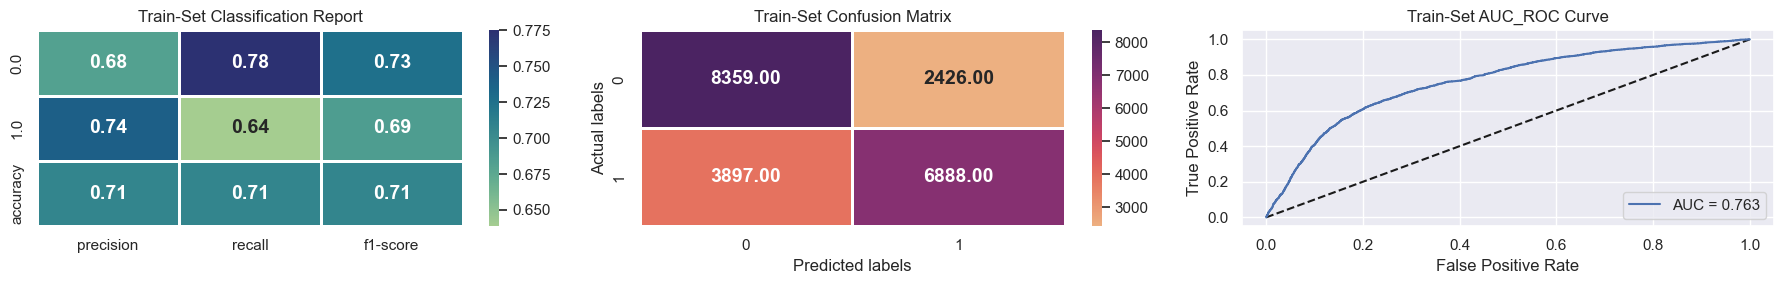

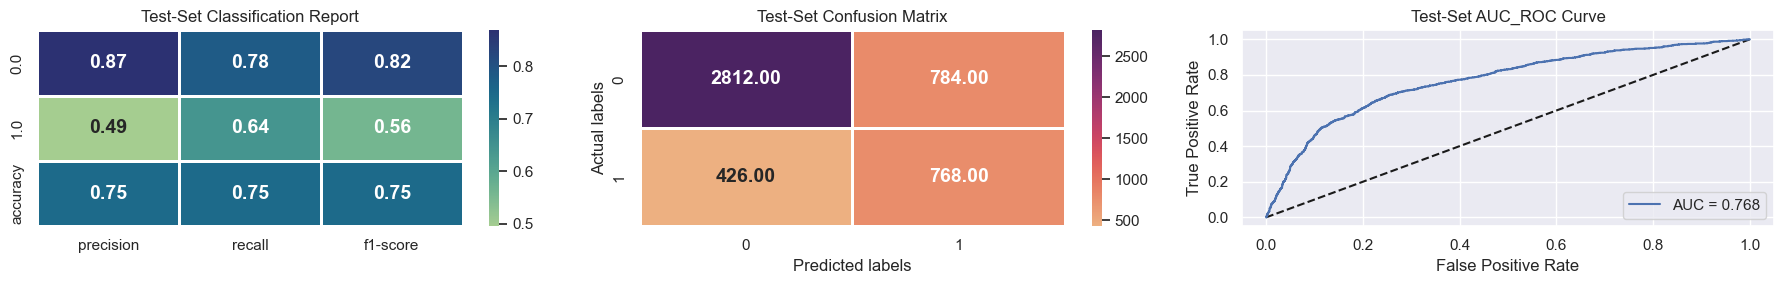

LogisticRegression(random_state=0)

In [42]:
# Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression Model and Visualizing evaluation Metric Score chart
logistic_classifier_over = LogisticRegression(fit_intercept=True, penalty='l2',random_state=0)
analyse_model(logistic_classifier_over, x_train_over, x_test, y_train_over, y_test)

Confusion matrix (train)
[[8359 2426]
 [3897 6888]]
********************************************************************
Confusion matrix (test)
[[2812  784]
 [ 426  768]]
**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

         0.0       0.68      0.78      0.73     10785
         1.0       0.74      0.64      0.69     10785

    accuracy                           0.71     21570
   macro avg       0.71      0.71      0.71     21570
weighted avg       0.71      0.71      0.71     21570

**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

         0.0       0.87      0.78      0.82      3596
         1.0       0.49      0.64      0.56      1194

    accuracy                           0.75      4790
   macro avg       0.68      0.71      0.69      4790
weighted avg       0.78      0

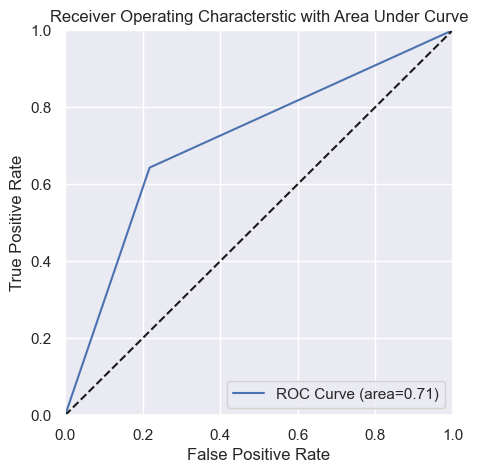

In [43]:
# Evalution after hyperparameter tuning

# Predict Result
y_predict_train = logistic_classifier_over.predict(x_train_over)
y_predict_test = logistic_classifier_over.predict(x_test)

print('Confusion matrix (train)')
print(confusion_matrix(y_train_over, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train_over, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train_over, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
accuracy = cross_val_score(logistic_classifier_over, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
print(f"roc_auc_score : {logistic_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# # RandomOverSampling
# # Storing different regression metrics in order to make dataframe and compare them
# models = ["Logistic_regression","Decision_tree","Random_forest","AdaBoost","GradientBoosting","XGboost","SVM"]
# Precision = [0.78] 
# Recall = [0.75]
# F1_Score= [0.76]
# Accuracy = [0.75]
# AUC = [0.768]

# # Create dataframe from the lists
# data = {'Models': models, 
#         'Precision': Precision,
#         'Recall': Recall,
#         'F1_Score': F1_Score,
#         'Accuracy': Accuracy,
#         'AUC': AUC
#        }
# metric_df = pd.DataFrame(data)

# # Printing dataframe
# metric_df

## ML Model - 2 Decision Treee

### 1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

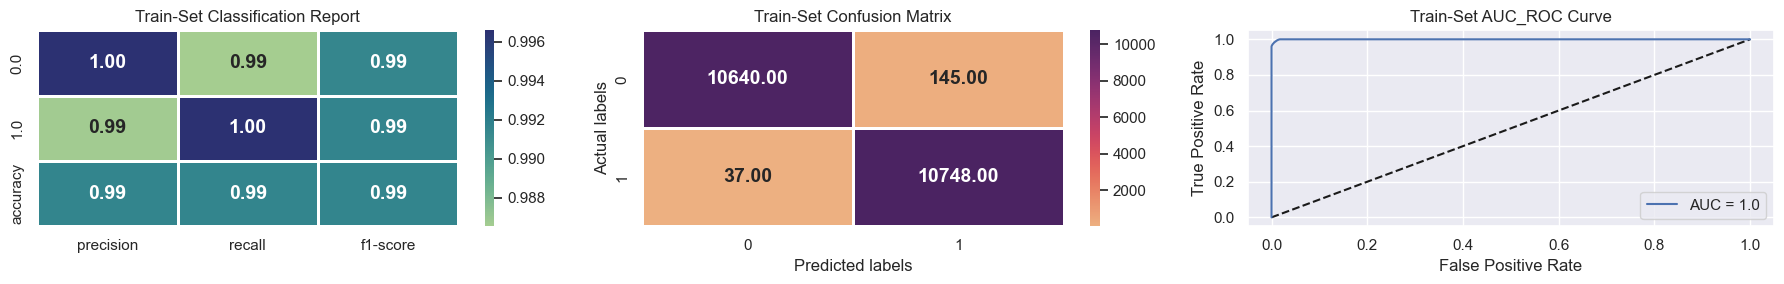

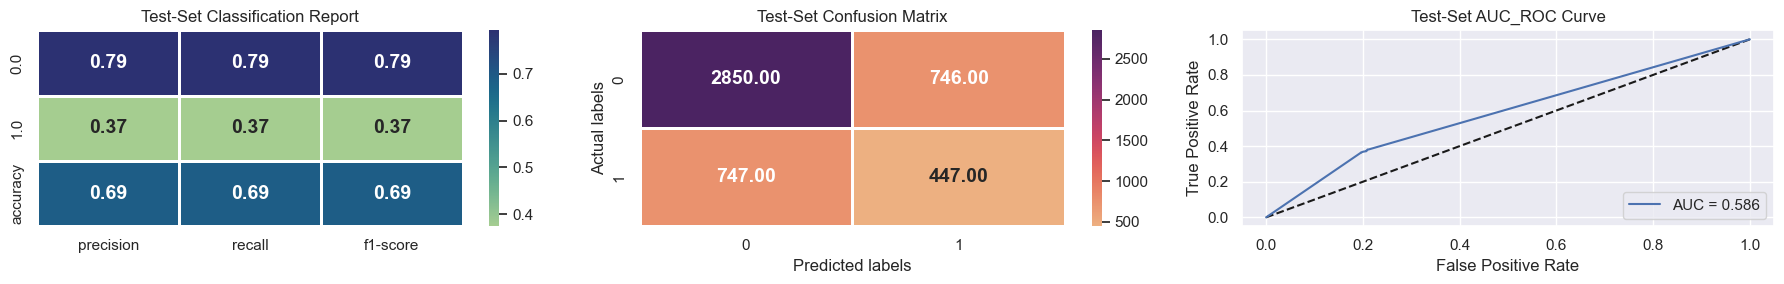

DecisionTreeClassifier(random_state=0)

In [44]:
# Importing RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Fitting RandomForestClassifier Model
DT_classifier_over = DecisionTreeClassifier(random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(DT_classifier_over, x_train_over, x_test, y_train_over, y_test)

The best parameters are: {'splitter': 'random', 'random_state': 101, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 12, 'criterion': 'gini'}


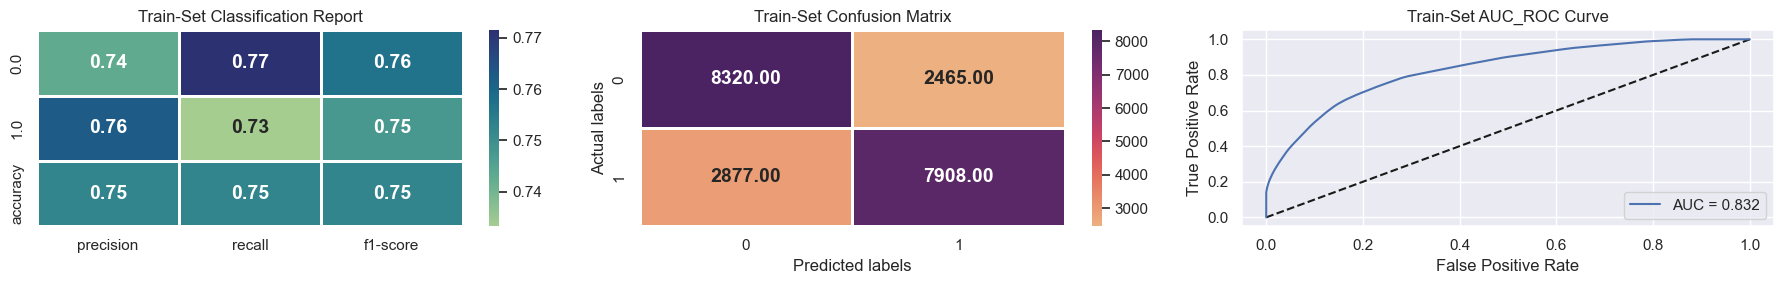

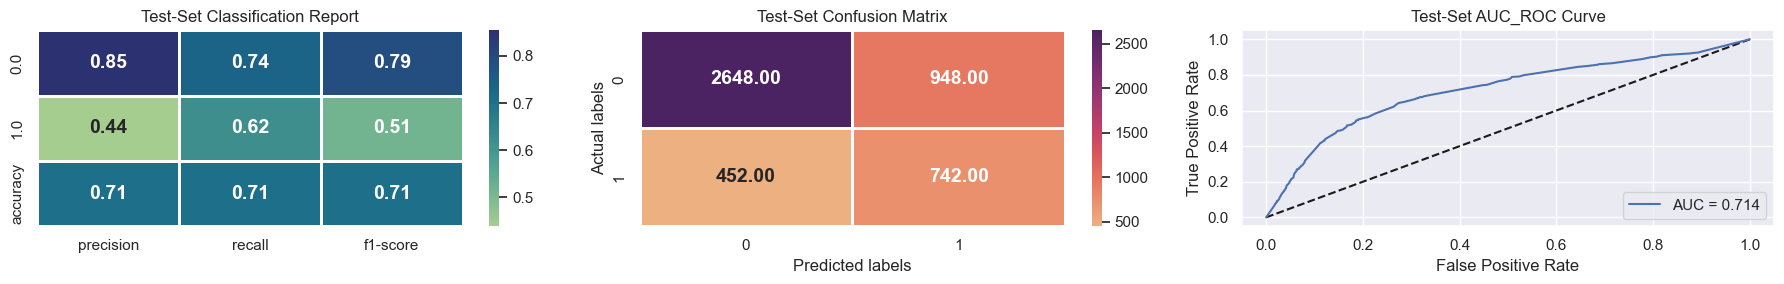

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9],
                                        'random_state': [101],
                                        'splitter': ['best', 'random']},
                   random_state=101, refit='precision',
                   scoring=['recall', 'precision'])

In [45]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV



# Defining parameters
parameters = {"criterion":["gini", "entropy", "log_loss"],
             "splitter":["best", "random"],
             "max_depth":[i for i in range(1,15,1)],
             "min_samples_split":[i for i in range(1,10,1)],
             "min_samples_leaf":[i for i in range(1,10)],
#              "min_weight_fraction_leaf":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
              "random_state":[101],
             "max_features":["sqrt", "log2", None]}
#              "max_leaf_nodes":[i for i in range(1,500)]
#              "min_impurity_decrease":[],
#              "class_weight":[],
#              "ccp_alpha":[],
#              "monotonic_cst":[]}

# Fitting LogisticRegression Model with GridSearchCV
DT_grid_classifier_over = RandomizedSearchCV(DT_classifier_over, parameters,refit="precision", scoring = ['recall','precision'], cv=5, random_state=101)

# Analysing the model
analyse_model(DT_grid_classifier_over, x_train_over, x_test, y_train_over, y_test)


In [47]:
from sklearn import tree
plt.figure(figsize=(20,20))
features = x_train.columns
classes = ['N','Y']
tree.plot_tree(DT_classifier_over,feature_names=features,class_names=classes,filled=True)
plt.show()

KeyboardInterrupt: 

Confusion matrix (train)
[[8320 2465]
 [2877 7908]]
********************************************************************
Confusion matrix (test)
[[2648  948]
 [ 452  742]]
**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

         0.0       0.74      0.77      0.76     10785
         1.0       0.76      0.73      0.75     10785

    accuracy                           0.75     21570
   macro avg       0.75      0.75      0.75     21570
weighted avg       0.75      0.75      0.75     21570

**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

         0.0       0.85      0.74      0.79      3596
         1.0       0.44      0.62      0.51      1194

    accuracy                           0.71      4790
   macro avg       0.65      0.68      0.65      4790
weighted avg       0.75      0

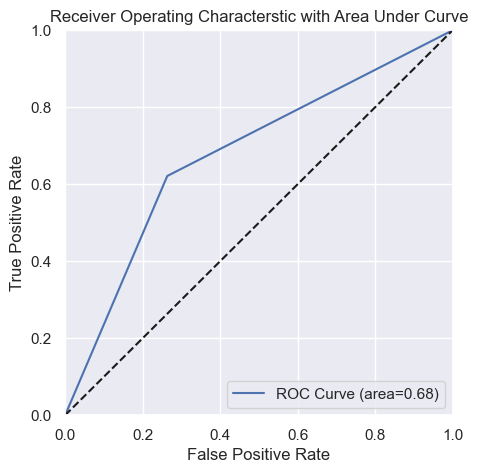

In [48]:
# Evalution after hyperparameter tuning

# Predict Result
y_predict_train = DT_grid_classifier_over.predict(x_train_over)
y_predict_test = DT_grid_classifier_over.predict(x_test)

print('Confusion matrix (train)')
print(confusion_matrix(y_train_over, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train_over, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train_over, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
accuracy = cross_val_score(DT_grid_classifier_over, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
print(f"roc_auc_score : {logistic_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# # RandomOverSampling
# # Storing different regression metrics in order to make dataframe and compare them
# models = ["Logistic_regression","Decision_tree","Random_forest","AdaBoost","GradientBoosting","XGboost","SVM"]
# Precision = [0.78, 0.75] 
# Recall = [0.75, 0.71]
# F1_Score= [0.76, 0.72]
# Accuracy = [0.75, 0.71]
# AUC = [0.768, 0.714]

# # Create dataframe from the lists
# data = {'Models': models, 
#         'Precision': Precision,
#         'Recall': Recall,
#         'F1_Score': F1_Score,
#         'Accuracy': Accuracy,
#         'AUC': AUC
#        }
# metric_df = pd.DataFrame(data)

# # Printing dataframe
# metric_df

## ML Model - 3 BaggingClassifier

### 1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

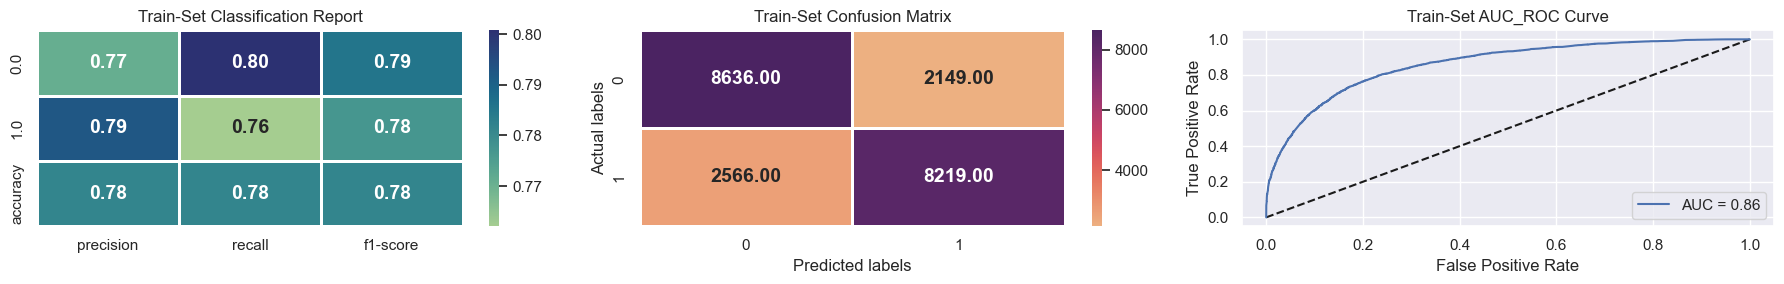

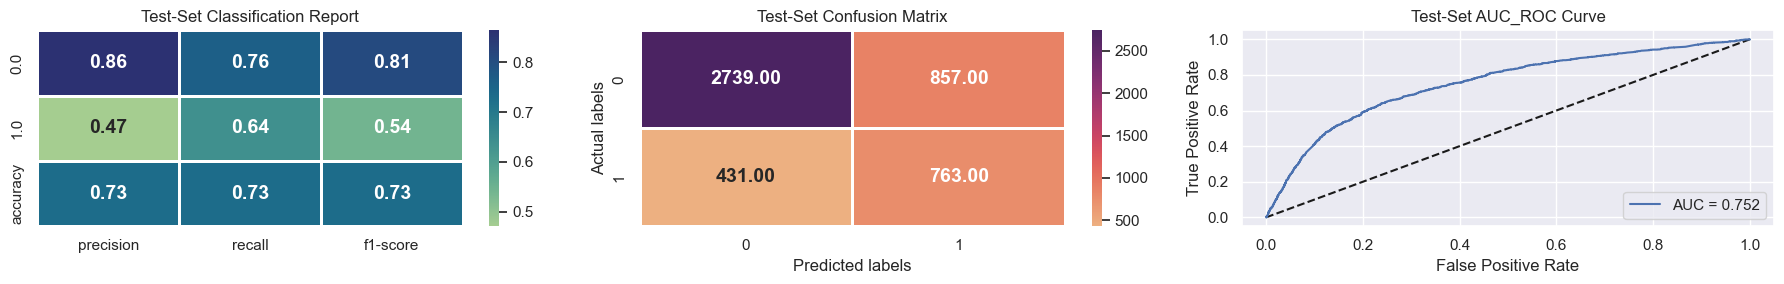

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=12,
                                                   min_samples_leaf=2,
                                                   min_samples_split=4,
                                                   random_state=101,
                                                   splitter='random'),
                  n_jobs=-1, oob_score=True, random_state=0)

In [49]:
# Importing RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# Fitting RandomForestClassifier Model
BG_classifier_over = BaggingClassifier(DecisionTreeClassifier(splitter='random', random_state=101, min_samples_split=4, min_samples_leaf=2, max_features=None, max_depth=12, criterion='gini'), n_jobs=-1,oob_score=True, random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(BG_classifier_over, x_train_over, x_test, y_train_over, y_test)

The best parameters are: {'warm_start': False, 'oob_score': True, 'n_jobs': -1, 'n_estimators': 900, 'bootstrap': True}


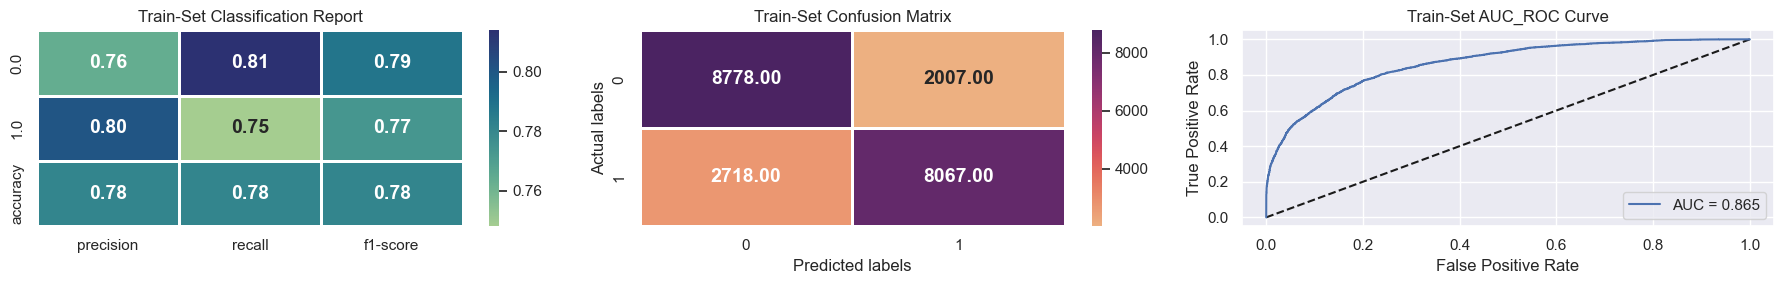

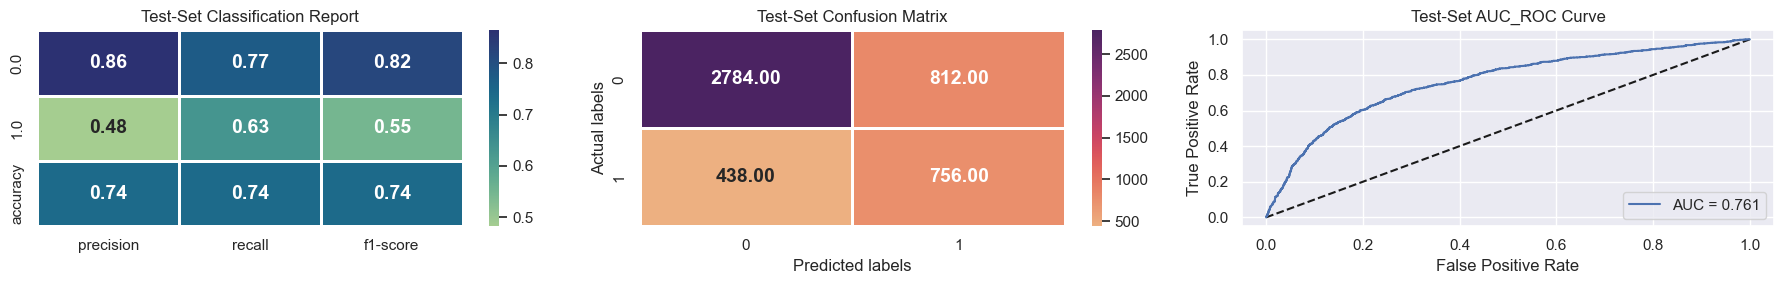

RandomizedSearchCV(cv=5,
                   estimator=BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=12,
                                                                                min_samples_leaf=2,
                                                                                min_samples_split=4,
                                                                                random_state=101,
                                                                                splitter='random'),
                                               n_jobs=-1, oob_score=True,
                                               random_state=0),
                   param_distributions={'bootstrap': [True],
                                        'n_estimators': [20, 50, 100, 200, 300,
                                                         400, 500, 600, 700,
                                                         800, 900, 1000],
                                        'n_jobs': [-1], 'oob_score': [True],
                                        'warm_start': [True, False]},
                   random_state=101, refit='precision',
                   scoring=['recall', 'precision'])

In [50]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV



# Defining parameters
parameters = {"n_estimators":[20, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
              "bootstrap":[True], "oob_score":[True], "warm_start":[True, False], "n_jobs":[-1]}

# Fitting LogisticRegression Model with GridSearchCV
BGH_grid_classifier_over = RandomizedSearchCV(BG_classifier_over, parameters, refit="precision", scoring = ['recall', 'precision'], cv=5, random_state=101)

# Analysing the model
analyse_model(BGH_grid_classifier_over, x_train_over, x_test, y_train_over, y_test)


In [ ]:
# Evalution after hyperparameter tuning

# Predict Result
y_predict_train = BGH_grid_classifier_over.predict(x_train_over)
y_predict_test = BGH_grid_classifier_over.predict(x_test)

print('Confusion matrix (train)')
print(confusion_matrix(y_train_over, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train_over, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train_over, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
accuracy = cross_val_score(BGH_grid_classifier_over, x_test, y_test, cv=10)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
print(f"roc_auc_score : {logistic_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

Confusion matrix (train)
[[8778 2007]
 [2718 8067]]
********************************************************************
Confusion matrix (test)
[[2784  812]
 [ 438  756]]
**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

         0.0       0.76      0.81      0.79     10785
         1.0       0.80      0.75      0.77     10785

    accuracy                           0.78     21570
   macro avg       0.78      0.78      0.78     21570
weighted avg       0.78      0.78      0.78     21570

**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

         0.0       0.86      0.77      0.82      3596
         1.0       0.48      0.63      0.55      1194

    accuracy                           0.74      4790
   macro avg       0.67      0.70      0.68      4790
weighted avg       0.77      0

In [ ]:
# # RandomOverSampling
# # Storing different regression metrics in order to make dataframe and compare them
# models = ["Logistic_regression","Decision_tree","Random_forest","AdaBoost","GradientBoosting","XGboost","SVM"]
# Precision = [0.78, 0.75, 0.77] 
# Recall = [0.75, 0.71, 0.74]
# F1_Score= [0.76, 0.72, 0.75]
# Accuracy = [0.75, 0.71, 0.74]
# AUC = [0.768, 0.714, 0.761]

# # Create dataframe from the lists
# data = {'Models': models, 
#         'Precision': Precision,
#         'Recall': Recall,
#         'F1_Score': F1_Score,
#         'Accuracy': Accuracy,
#         'AUC': AUC
#        }
# metric_df_over = pd.DataFrame(data)

# # Printing dataframe
# metric_df_over

## ML Model - 5 Random Forest

### 1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

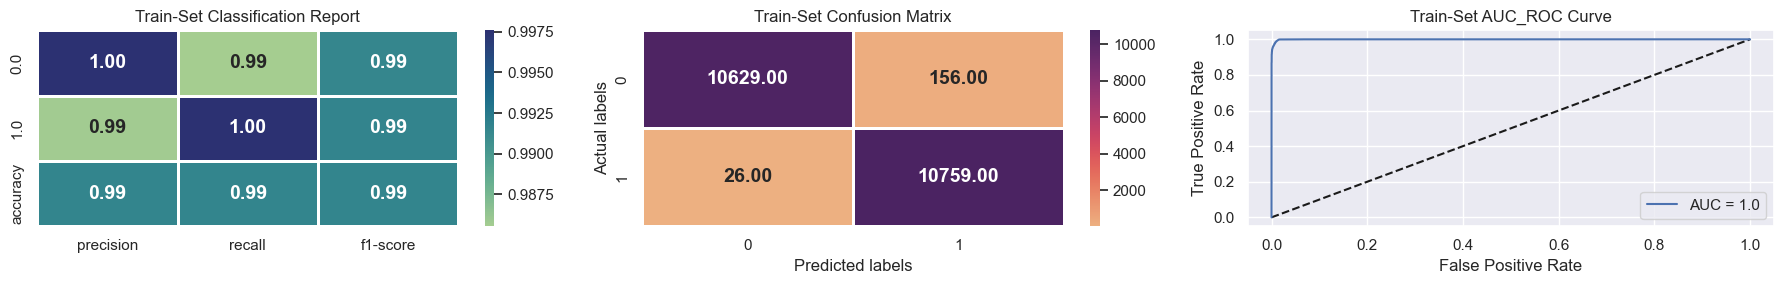

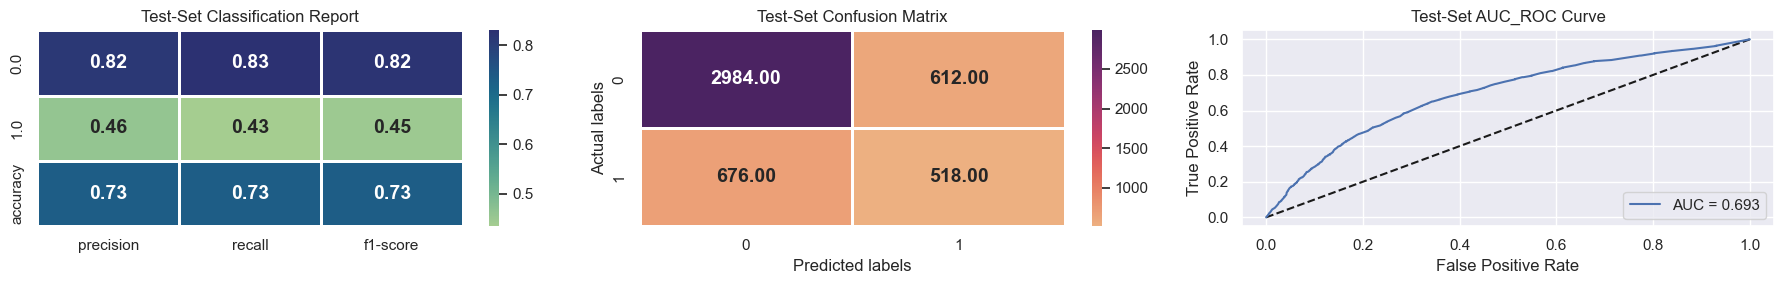

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=0)

In [259]:
# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Fitting RandomForestClassifier Model
RF_classifier_over = RandomForestClassifier(oob_score=True,n_jobs=-1,random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(RF_classifier_over, x_train_over, x_test, y_train_over, y_test)

The best parameters are: {'oob_score': True, 'n_jobs': -1, 'n_estimators': 280, 'min_samples_split': 51, 'min_samples_leaf': 471, 'max_features': None, 'max_depth': 11, 'criterion': 'gini'}


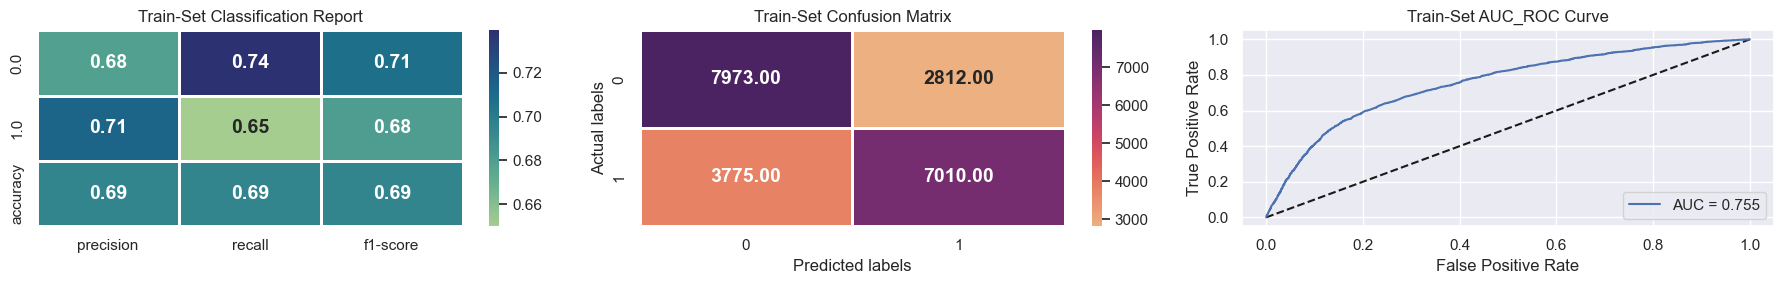

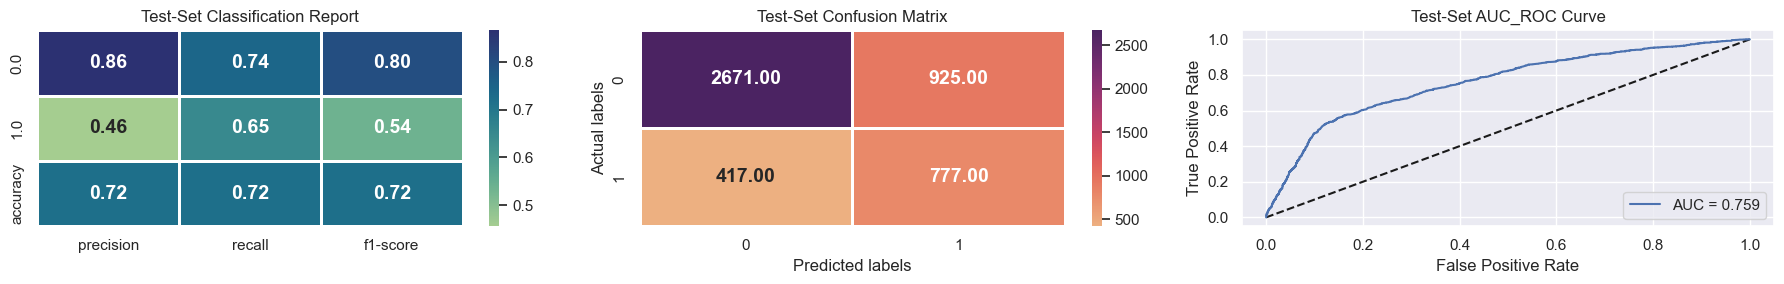

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                                    random_state=0),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 11, 21, 31, 41],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 11, 21, 31, 41,
                                                             51, 61, 71, 81, 91,
                                                             101, 111, 121, 131,
                                                             141, 151, 161, 171,
                                                             181, 191, 201, 211,
                                                             221, 231, 241, 251,
                                                             261, 271, 281, 291, ...],
                                        'min_samples_split': [1, 11, 21, 31, 41,
                                                              51, 61, 71, 81,
                                                              91, 101, 111, 121,
                                                              131, 141, 151,
                                                              161, 171, 181,
                                                              191, 201, 211,
                                                              221, 231, 241,
                                                              251, 261, 271,
                                                              281, 291, ...],
                                        'n_estimators': [100, 110, 120, 130,
                                                         140, 150, 160, 170,
                                                         180, 190, 200, 210,
                                                         220, 230, 240, 250,
                                                         260, 270, 280, 290,
                                                         300, 310, 320, 330,
                                                         340, 350, 360, 370,
                                                         380, 390, ...],
                                        'n_jobs': [-1], 'oob_score': [True]},
                   scoring='precision')

In [260]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV


# Defining parameters
parameters = {'n_estimators':[i for i in range(100,500,10)],
             'criterion':["gini", "entropy"],
              'max_depth':[i for i in range(1,50,10)],
              'min_samples_split':[i for i in range(1,500,10)],
              'min_samples_leaf':[i for i in range(1,500,10)],
             'max_features':["sqrt", "log2", None],
             'oob_score':[True],
             'n_jobs':[-1]}

# Fitting LogisticRegression Model with GridSearchCV
RF_grid_classifier_over = RandomizedSearchCV(RF_classifier_over, parameters,  scoring='precision', cv=5)

# Analysing the model
analyse_model(RF_grid_classifier_over, x_train_over, x_test, y_train_over, y_test)


In [264]:
# Evalution after hyperparameter tuning

# Predict Result
y_predict_train = RF_grid_classifier_over.predict(x_train_over)
y_predict_test = RF_grid_classifier_over.predict(x_test)

print('Confusion matrix (train)')
print(confusion_matrix(y_train_over, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train_over, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train_over, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
# accuracy = cross_val_score(RF_grid_classifier_over, x_test, y_test, cv=20)
# print(f"Accuracy : {accuracy}")
# print("***********************************************************************")
# print("Average accuracy after 20 splits", accuracy.mean())
# print('***********************************************************************')
# print('Highest accuracy', accuracy.max())
# print("***********************************************************************")
# logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
# print(f"roc_auc_score : {logistic_roc_auc}")
# print("***********************************************************************")
# # ROC-AUC 
# fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

# plt.figure(figsize=(5,5))
# plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
# plt.plot([0,1], [0,1], 'k--')
# plt.xlim(0.0,1.0)
# plt.ylim(0.0,1.0)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characterstic with Area Under Curve')
# plt.legend(loc='lower right')
# plt.show()

Confusion matrix (train)
[[7973 2812]
 [3775 7010]]
********************************************************************
Confusion matrix (test)
[[2671  925]
 [ 417  777]]
**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

         0.0       0.68      0.74      0.71     10785
         1.0       0.71      0.65      0.68     10785

    accuracy                           0.69     21570
   macro avg       0.70      0.69      0.69     21570
weighted avg       0.70      0.69      0.69     21570

**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

         0.0       0.86      0.74      0.80      3596
         1.0       0.46      0.65      0.54      1194

    accuracy                           0.72      4790
   macro avg       0.66      0.70      0.67      4790
weighted avg       0.76      0

In [ ]:
# # RandomOverSampling
# # Storing different regression metrics in order to make dataframe and compare them
# models = ["Logistic_regression","Decision_tree","Random_forest","AdaBoost","GradientBoosting","XGboost","SVM"]
# Precision = [0.78, 0.75, 0.77] 
# Recall = [0.75, 0.71, 0.74]
# F1_Score= [0.76, 0.72, 0.75]
# Accuracy = [0.75, 0.71, 0.74]
# AUC = [0.768, 0.714, 0.761]

# # Create dataframe from the lists
# data = {'Models': models, 
#         'Precision': Precision,
#         'Recall': Recall,
#         'F1_Score': F1_Score,
#         'Accuracy': Accuracy,
#         'AUC': AUC
#        }
# metric_df_over = pd.DataFrame(data)

# # Printing dataframe
# metric_df_over

## ML Model - 5 AdaBoost

### 1.  Explain the ML Model and it's performance using Evaluation metric Score Chart.

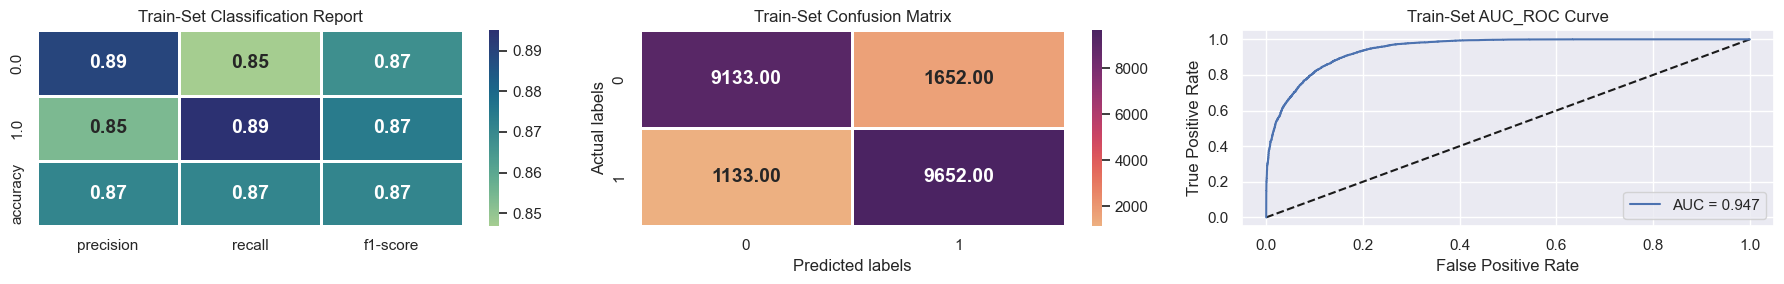

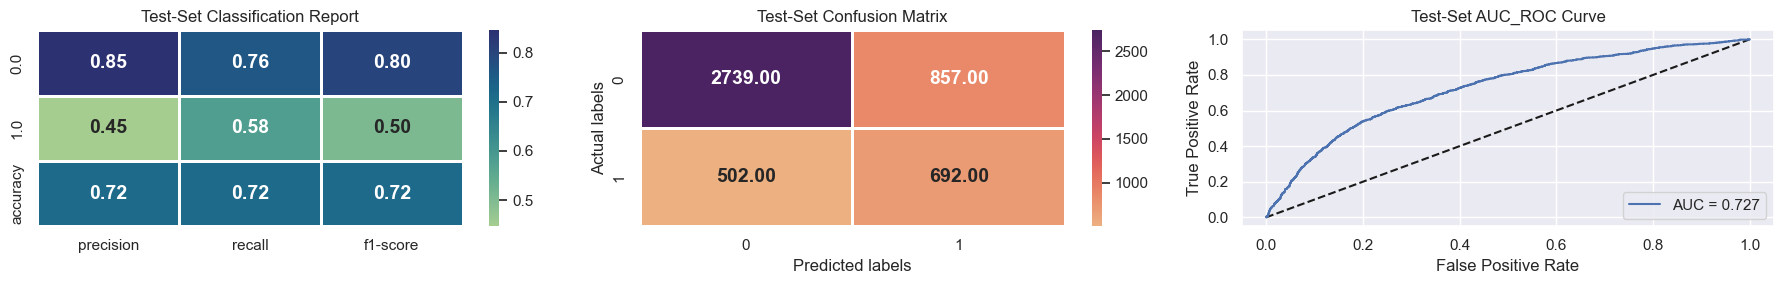

AdaBoostClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                    max_depth=41,
                                                    min_samples_leaf=11,
                                                    min_samples_split=291,
                                                    n_estimators=330, n_jobs=-1,
                                                    oob_score=True),
                   learning_rate=1, random_state=101)

In [265]:
# Importing AdaBoostClassifier (recall)
from sklearn.ensemble import AdaBoostClassifier

# Fitting AdaBoostClassifier Model
adboost_classifier_over = AdaBoostClassifier(RandomForestClassifier(oob_score=True, n_jobs=-1, n_estimators=330, min_samples_split=291, min_samples_leaf=11, max_features='sqrt', max_depth=41, criterion='entropy'),  learning_rate=1,algorithm="SAMME.R", random_state =101)

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model(adboost_classifier_over, x_train_over, x_test, y_train_over, y_test)

In [268]:
# Evalution after hyperparameter tuning

# Predict Result
y_predict_train = adboost_classifier_over.predict(x_train_over)
y_predict_test = adboost_classifier_over.predict(x_test)

print('Confusion matrix (train)')
print(confusion_matrix(y_train_over, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train_over, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train_over, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
# accuracy = cross_val_score(adboost_classifier_over, x_test, y_test, cv=10)
# print(f"Accuracy : {accuracy}")
# print("***********************************************************************")
# print("Average accuracy after 20 splits", accuracy.mean())
# print('***********************************************************************')
# print('Highest accuracy', accuracy.max())
# print("***********************************************************************")
# logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
# print(f"roc_auc_score : {logistic_roc_auc}")
# print("***********************************************************************")
# # ROC-AUC 
# fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

# plt.figure(figsize=(5,5))
# plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
# plt.plot([0,1], [0,1], 'k--')
# plt.xlim(0.0,1.0)
# plt.ylim(0.0,1.0)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characterstic with Area Under Curve')
# plt.legend(loc='lower right')
# plt.show()

Confusion matrix (train)
[[9133 1652]
 [1133 9652]]
********************************************************************
Confusion matrix (test)
[[2739  857]
 [ 502  692]]
**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87     10785
         1.0       0.85      0.89      0.87     10785

    accuracy                           0.87     21570
   macro avg       0.87      0.87      0.87     21570
weighted avg       0.87      0.87      0.87     21570

**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

         0.0       0.85      0.76      0.80      3596
         1.0       0.45      0.58      0.50      1194

    accuracy                           0.72      4790
   macro avg       0.65      0.67      0.65      4790
weighted avg       0.75      0

## ML Model - 6  Gradient Boosting Decision Tree (GBDT)

### 1.  Explain the ML Model and it's performance using Evaluation metric Score Chart.

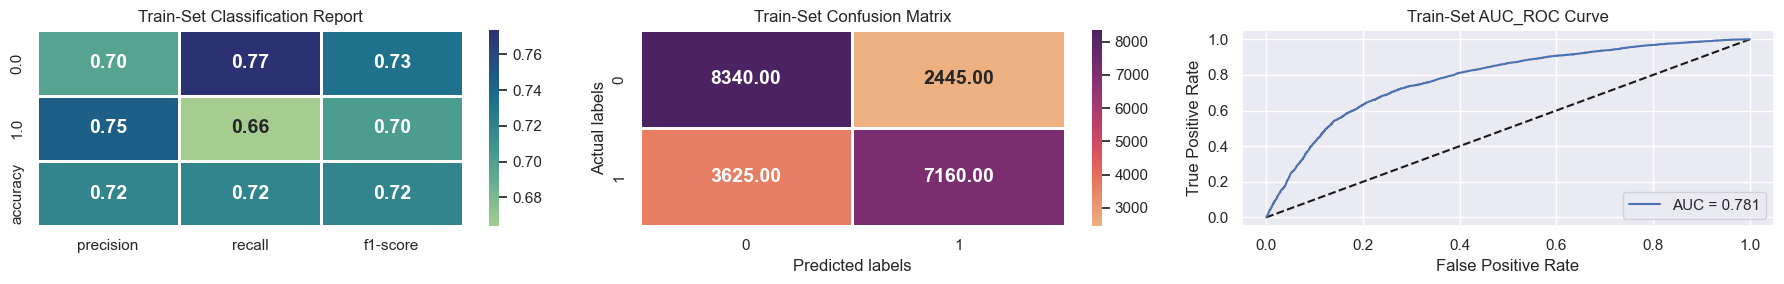

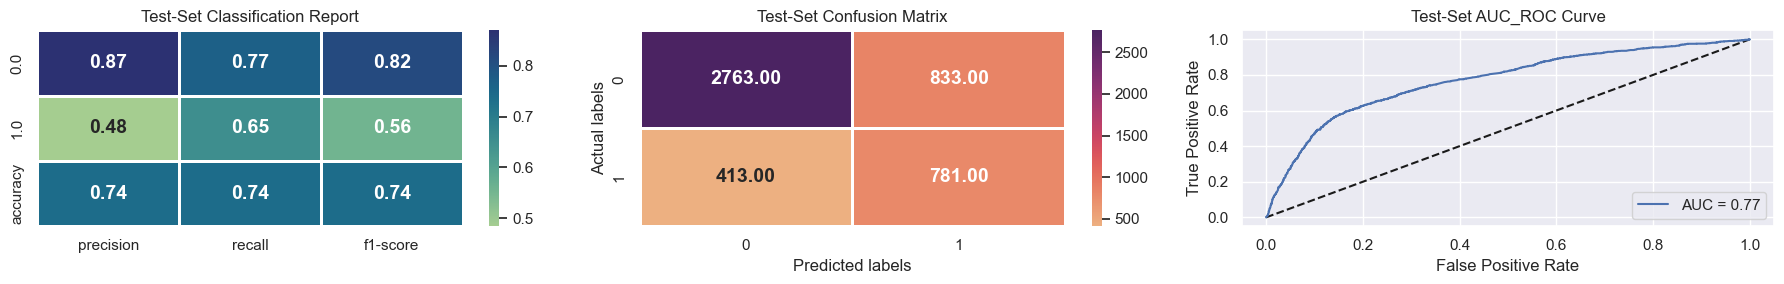

GradientBoostingClassifier(random_state=101)

In [269]:
# Importing GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Fitting AdaBoostClassifier Model
gbdt_classifier_over = GradientBoostingClassifier(random_state =101)

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model(gbdt_classifier_over, x_train_over, x_test, y_train_over, y_test)

The best parameters are: {'subsample': 0.95, 'n_estimators': 10, 'min_samples_split': 0.24545454545454548, 'min_samples_leaf': 0.31818181818181823, 'max_features': 'sqrt', 'max_depth': 3, 'loss': 'exponential', 'learning_rate': 0.1, 'criterion': 'friedman_mse'}


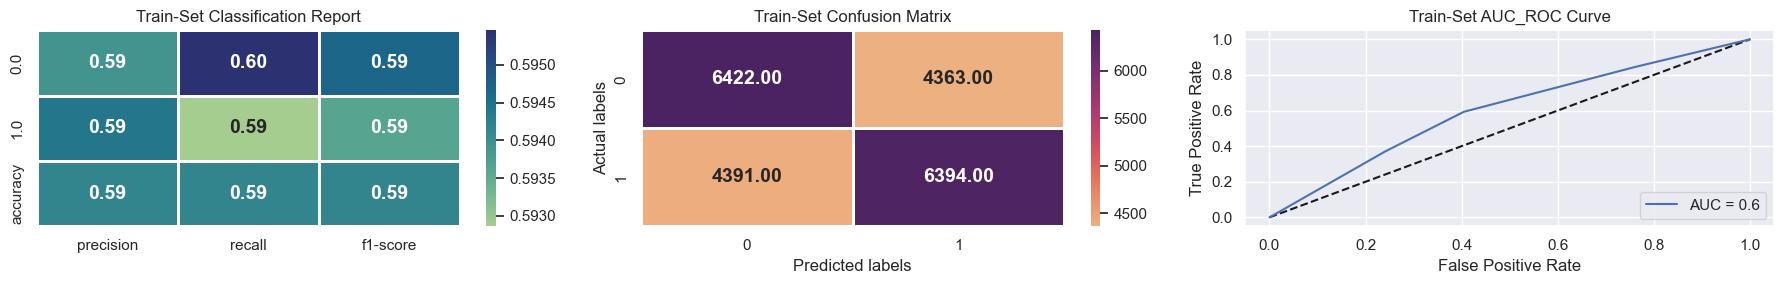

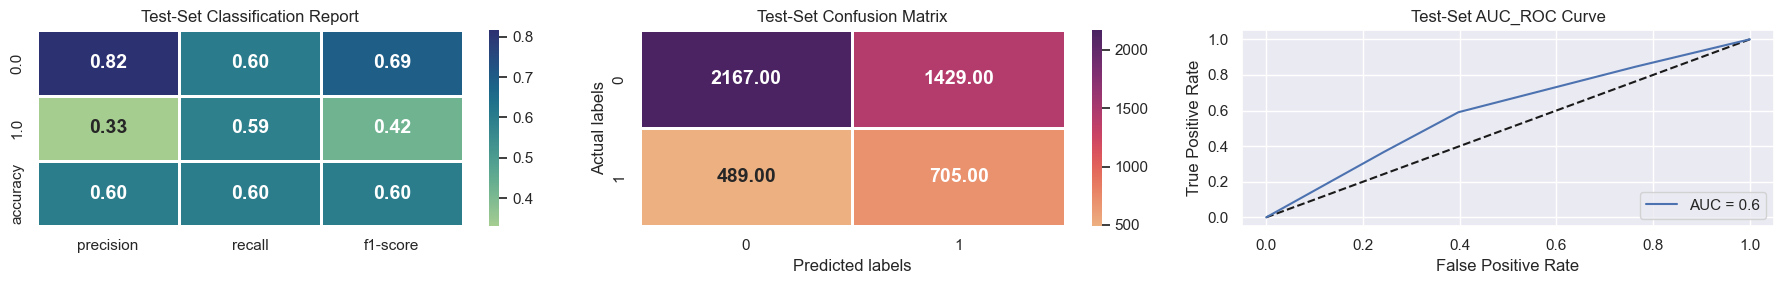

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=101),
                   param_distributions={'criterion': ['friedman_mse', 'mae'],
                                        'learning_rate': [0.075, 0.1, 0.15, 0.2,
                                                          0.3, 0.4, 0.5, 0.6,
                                                          0.7, 0.8, 0.9],
                                        'loss': ['log_loss', 'exponential'],
                                        'max_depth': [3, 5, 8],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                                        'min_samples_split': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                                        'n_estimators': [10],
                                        'subsample': [0.5, 0.618, 0.8, 0.85,
                                                      0.9, 0.95, 1.0]},
                   scoring='precision')

In [270]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV


# Defining parameters
parameters = { "loss":["log_loss", "exponential"],"learning_rate": [0.075, 0.1, 0.15, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
              "min_samples_split": np.linspace(0.1, 0.5, 12),
              "min_samples_leaf": np.linspace(0.1, 0.5, 12),
              "max_depth":[3,5,8],"max_features":["log2","sqrt"],
              "criterion": ["friedman_mse",  "mae"],
              "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
              "n_estimators":[i for i in range(10,50,50)]}

# Fitting LogisticRegression Model with GridSearchCV
gbdt_grid_classifier_over = RandomizedSearchCV(gbdt_classifier_over, parameters,  scoring='precision', cv=5)

# Analysing the model
analyse_model(gbdt_grid_classifier_over, x_train_over, x_test, y_train_over, y_test)


In [271]:
# Evalution after hyperparameter tuning

# Predict Result
y_predict_train = gbdt_classifier_over.predict(x_train_over)
y_predict_test = gbdt_classifier_over.predict(x_test)

print('Confusion matrix (train)')
print(confusion_matrix(y_train_over, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train_over, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train_over, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
accuracy = cross_val_score(gbdt_classifier_over, x_test, y_test, cv=10)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
print(f"roc_auc_score : {logistic_roc_auc}")
print("***********************************************************************")
# # ROC-AUC 
# fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

# plt.figure(figsize=(5,5))
# plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
# plt.plot([0,1], [0,1], 'k--')
# plt.xlim(0.0,1.0)
# plt.ylim(0.0,1.0)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characterstic with Area Under Curve')
# plt.legend(loc='lower right')
# plt.show()

Confusion matrix (train)
[[8340 2445]
 [3625 7160]]
********************************************************************
Confusion matrix (test)
[[2763  833]
 [ 413  781]]
**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

         0.0       0.70      0.77      0.73     10785
         1.0       0.75      0.66      0.70     10785

    accuracy                           0.72     21570
   macro avg       0.72      0.72      0.72     21570
weighted avg       0.72      0.72      0.72     21570

**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

         0.0       0.87      0.77      0.82      3596
         1.0       0.48      0.65      0.56      1194

    accuracy                           0.74      4790
   macro avg       0.68      0.71      0.69      4790
weighted avg       0.77      0

## ML Model - 7 XGboost

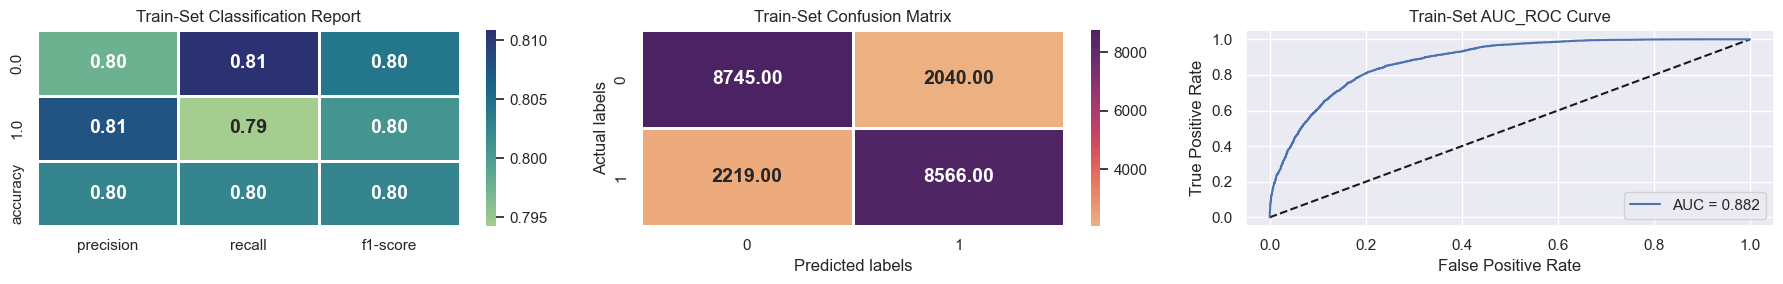

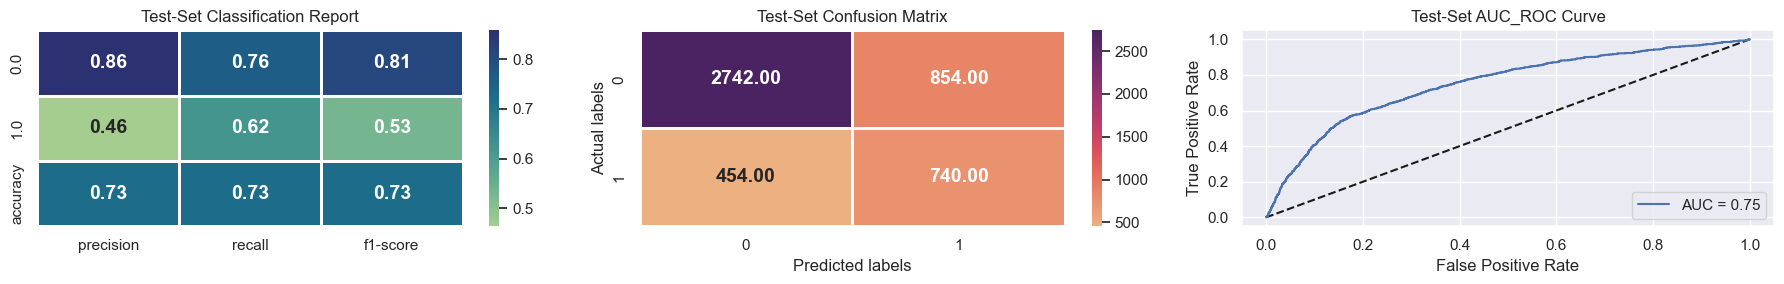

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [272]:
# Importing RandomForestClassifier
from xgboost import XGBClassifier

# Fitting XGBClassifier Model
XGB_classifier = XGBClassifier()

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(XGB_classifier, x_train_over, x_test, y_train_over, y_test)
     


In [273]:
# Evalution after hyperparameter tuning

# Predict Result
y_predict_train = XGB_classifier.predict(x_train_over)
y_predict_test = XGB_classifier.predict(x_test)

print('Confusion matrix (train)')
print(confusion_matrix(y_train_over, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train_over, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train_over, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
accuracy = cross_val_score(XGB_classifier, x_test, y_test, cv=10)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
print(f"roc_auc_score : {logistic_roc_auc}")
print("***********************************************************************")
# # ROC-AUC 
# fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

# plt.figure(figsize=(5,5))
# plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
# plt.plot([0,1], [0,1], 'k--')
# plt.xlim(0.0,1.0)
# plt.ylim(0.0,1.0)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characterstic with Area Under Curve')
# plt.legend(loc='lower right')
# plt.show()

Confusion matrix (train)
[[8745 2040]
 [2219 8566]]
********************************************************************
Confusion matrix (test)
[[2742  854]
 [ 454  740]]
**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.80     10785
         1.0       0.81      0.79      0.80     10785

    accuracy                           0.80     21570
   macro avg       0.80      0.80      0.80     21570
weighted avg       0.80      0.80      0.80     21570

**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

         0.0       0.86      0.76      0.81      3596
         1.0       0.46      0.62      0.53      1194

    accuracy                           0.73      4790
   macro avg       0.66      0.69      0.67      4790
weighted avg       0.76      0

## ML Model - 8 SVC

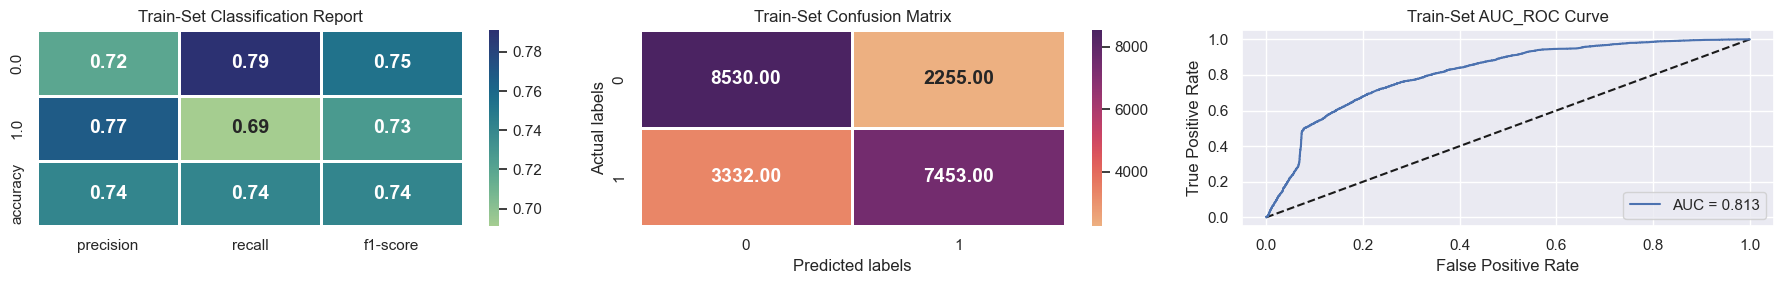

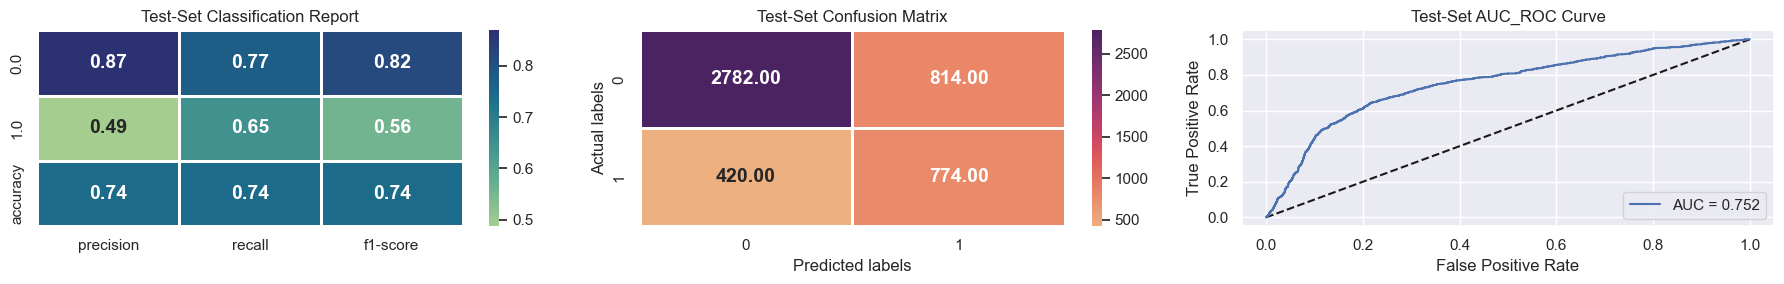

SVC(probability=True, random_state=0)

In [274]:
# Importing SVC
from sklearn.svm import SVC

# Fitting SVC Model
SVC_classifier = SVC(probability= True,random_state=0)

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model(SVC_classifier, x_train_over, x_test, y_train_over, y_test)

In [276]:
# Evalution after hyperparameter tuning

# Predict Result
y_predict_train = SVC_classifier.predict(x_train_over)
y_predict_test = SVC_classifier.predict(x_test)

print('Confusion matrix (train)')
print(confusion_matrix(y_train_over, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train_over, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train_over, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
accuracy = cross_val_score(SVC_classifier, x_test, y_test, cv=10)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
print(f"roc_auc_score : {logistic_roc_auc}")
print("***********************************************************************")
# # ROC-AUC 
# fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

# plt.figure(figsize=(5,5))
# plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
# plt.plot([0,1], [0,1], 'k--')
# plt.xlim(0.0,1.0)
# plt.ylim(0.0,1.0)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characterstic with Area Under Curve')
# plt.legend(loc='lower right')
# plt.show()

Confusion matrix (train)
[[8530 2255]
 [3332 7453]]
********************************************************************
Confusion matrix (test)
[[2782  814]
 [ 420  774]]
**********************************************************************
Classification Report(train)
              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75     10785
         1.0       0.77      0.69      0.73     10785

    accuracy                           0.74     21570
   macro avg       0.74      0.74      0.74     21570
weighted avg       0.74      0.74      0.74     21570

**********************************************************************
Classification Report(test)
              precision    recall  f1-score   support

         0.0       0.87      0.77      0.82      3596
         1.0       0.49      0.65      0.56      1194

    accuracy                           0.74      4790
   macro avg       0.68      0.71      0.69      4790
weighted avg       0.77      0